***
# Analysis of Gaia DR2 as AstrometricReference Catalogue
***

<div class="alert alert-block alert-info"> This Jupyter Notebook serves as additional guideline for Chapter 2 in my Master Thesis. All code used to analyse data and produce plots is presented here 

</div>



<font color="#31688e">   <i>
In this chapter we explore the Gaia DR2 catalogue in its role as astrometric reference catalogue for Euclid's
External Surveys. We want to explore the proper motion distribution in the entire Euclid Wide Survey Area.
A proper motion analysis can reveal the importance of moving objects in the field of astrometry. If objects
move too fast, we either (i) need to take their displacement into account when calibrating detector images
or (ii) neglect fast moving sources. However, for some areas the number of reference objects is limited.
Therefore, this analysis will give us an impression about the importance of proper motions on the sky.
Thereafter, as we know the proper motion distribution in the entire Euclid Wide Survey Area, we will focus on three of the six Euclid External Surveys: the Dark Energy Survey, DES, the Canada-France Imaging Survey, CFIS and the pathfinder Kilo Degree Sky Survey, KiDS. The proper motion distribution is analysed for a subset of the Gaia DR2 stars that are used for the astronomical calibration of the surveys (i.e., right range of magnitudes and other selections applied by these surveys).  </i>   </font>




<b>In particular we are interested in the fraction of Gaia stars as a function of Galactic latitude that have proper motions > 10mas yr$^{-1}$. These allow us to assess impact on superb ground-based astrometric calibration. The acchived rms is in the order of 10mas (e.g., [Bernstein](https://ui.adsabs.harvard.edu/abs/2017PASP..129g4503B/abstract)). The fraction which has > 30mas yr$^{-1}$ allows investigation on the impact on decent ground-based wide-field astrometric calibration. In general these achieve calibration in the order of rms = 30mas (e.g., [de Jong et al](https://ui.adsabs.harvard.edu/abs/2015A%26A...582A..62D/abstract))</b>

<a id = "LOC" LOC></a>


<div class="alert alert-block alert-info">
<b>  List of content of Chapter 2</b> <br>
<i> Figure and Table numbers refer to the numbers in the thesis </i>
    <br> <br>

2.1 <b>Gaia Data Release 2</b> . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . [Figure 2.1](#f2.1)  [Table 2.1](#t2.1) <br>
2.1.1 Limitations of Gaia DR2 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . <br>
2.1.2 Obtaining Gaia DR 2 of the Euclid Wide Survey . . . . . . . . . . . . . . . . . . . .  [Figure 2.2](#f2.2) <br>


2.2 <b>Proper Motion in different Directions</b> . . . . . . . . . . . . . . . . . . . . . . . . . . . . [Figure 2.3](#f2.3)      [Figure 2.4](#f2.4) 
<br>


2.3 <b>Proper Motion distribution over the Galactic Sky</b> . . . . . . . . . . . . . . . . . . [Figure 2.5](#f2.5)    [Figure 2.6](#f2.6)   [Figure 2.7](#f2.7)  [Figure 2.8](#f2.8) <br>

2.4 <b>Coverage of Gaia stars for ranges of Galactic latitude</b>. . . . . . . . . . . . . . [Figure 2.9](#f2.9)      [Table 2.2](#t2.2)<br>


2.5 <b>Coverage of Gaia stars in Euclid's External Surveys</b>. . . . . . . . . . . . . . . . [Table 2.4](#t2.4)    [Table 2.5](#t2.5)  [Table 2.6](#t2.6)<br>


2.6 <b>Coverage of Gaia stars per Stellar Magnitude</b> . . . . . . . . . . . . . . . . . . . . . [Figure 2.10](#f2.10)         [Figure 2.11](#f2.11)       [Figure 2.12](#f2.12)<br>


2.7 <b>Conclusions</b> . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


</div>



In [2]:
from __future__ import print_function

import warnings
warnings.filterwarnings("ignore")
%run py/setup_gaia

try:
    context.set_project('OMEGACAM@VST')
    context.set_privileges(3)
    radec_SA113=[325.375,0.499]
    ra_SA113,dec_SA113,dra_SA113,ddec_SA113=radec_SA113[0],radec_SA113[1],1.,1.
    radec_SA107=[234.825,-0.263] 
    ra_SA107,dec_SA107,dra_SA107,ddec_SA107=radec_SA107[0],radec_SA107[1],1.,1.
except NameError as err:
    print("NameError: Module Context not imported, go to AW environment")
    pass

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
NameError: Module Context not imported, go to AW environment


In [3]:
# from __future__ import print_function

# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:80% !important; }</style>"))
# display(HTML("<style> div.prompt {display:true} </style>"))

# display(HTML("<style>.output_png {display: table-cell; text-align: center; vertical-align: middle;} </style>"))

import astroquery

from astropy.io import fits, ascii
from astropy.table import Table, QTable
import astropy.units as u
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord

import datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.cm as cmx
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D

import sys
import os

import warnings
warnings.filterwarnings("ignore")

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')


from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)


# Importing colours used in plots
def _to_hex(c):
    """Convert arbitray color specification to hex string.
    
    Usage: 
        color = _to_hex((0.267004, 0.004874, 0.329415)) 
    Returns:
        HEX colors in the form of #440154
    
    """
    ctype = type(c)

    # Convert rgb to hex.
    if ctype is tuple or ctype is np.ndarray or ctype is list:
        return colors.rgb2hex(c)
    if ctype is str:
        # If color is already hex, simply return it.
        regex = re.compile('^#[A-Fa-f0-9]{6}$')
        if regex.match(c):
            return c
        # Convert named color to hex.
        return colors.cnames[c]
    raise Exception("Can't handle color of type: {}".format(ctype))

# Obtaining colors for scatter plot
purple = _to_hex((0.267004, 0.004874, 0.329415))
blue_purple = _to_hex((0.267968, 0.223549, 0.512008))
blue = _to_hex((0.190631, 0.407061, 0.556089))
green_blue = _to_hex((0.128729, 0.563265, 0.551229))
green_blue2 = _to_hex((0.288921, 0.758394, 0.428426))
green = _to_hex((0.20803, 0.718701, 0.472873))
yellow_green = _to_hex((0.555484, 0.840254, 0.269281))
yellow = _to_hex((0.993248, 0.906157, 0.143936)) 

# print(purple, blue_purple, blue, green_blue, green_blue2, green, yellow_green, yellow)

# Obtaining colors for exclusion zones
silver = _to_hex((0.93, 0.93, 0.93))
grey_blue = _to_hex((0.36, 0.48, 0.58))  
hist_purple = '#7F7FFF'  # the color used for all histograms, taking into acount its alpha
cum_red = 'FD0306' #the color used for all cumulative histogram plots

#print(silver, grey_blue)


In [21]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script> <i>
The code used to load the data, plot the Figures & Tables and analyse the results is hidden by default.
To show the raw code, click  <a href="javascript:code_toggle()">here</a> </i>.''') 


***

In [4]:
def select_area(tb, areaname=['KIDS', 'KIDS_183.5_-2.5', 'DES', 'PSTARS', 'LMC','SMC'], tile=0.5, printing='on'):
    if printing == 'on':
        print("Start select_area({})".format(areaname))
    else:
        pass

    if areaname == 'KIDS':
        S1_ra = [330.0, 360.0];
        S1_dec = [-35.5, -26.6]  # RA range [330.0, 52.5]
        S2_ra = [0.0, 52.5];
        S2_dec = [-35.5, -26.6]  # RA range [330.0, 52.5]
        N1_ra = [155.5, 225.5];
        N1_dec = [-4.0, 4.0]
        N2_ra = [225.5, 238.5];
        N2_dec = [-2.0, 3.0]
        NW2_ra = [128.5, 141.5];
        NW2_dec = [-2.0, 3.0]
        ND2_ra = [149.5, 150.5];
        ND2_dec = [-1.7, 2.7]

        S1_area = tb[
            (tb['ra'] >= np.float(S1_ra[0])) & (tb['ra'] < np.float(S1_ra[1])) & (tb['dec'] >= np.float(S1_dec[0])) & (
                        tb['dec'] < np.float(S1_dec[1]))]
        S2_area = tb[
            (tb['ra'] >= np.float(S2_ra[0])) & (tb['ra'] < np.float(S2_ra[1])) & (tb['dec'] >= np.float(S2_dec[0])) & (
                        tb['dec'] < np.float(S2_dec[1]))]
        N1_area = tb[
            (tb['ra'] >= np.float(N1_ra[0])) & (tb['ra'] < np.float(N1_ra[1])) & (tb['dec'] >= np.float(N1_dec[0])) & (
                        tb['dec'] < np.float(N1_dec[1]))]
        N2_area = tb[
            (tb['ra'] >= np.float(N2_ra[0])) & (tb['ra'] < np.float(N2_ra[1])) & (tb['dec'] >= np.float(N2_dec[0])) & (
                        tb['dec'] < np.float(N2_dec[1]))]
        NW2_area = tb[(tb['ra'] >= np.float(NW2_ra[0])) & (tb['ra'] < np.float(NW2_ra[1])) & (
                    tb['dec'] >= np.float(NW2_dec[0])) & (tb['dec'] < np.float(NW2_dec[1]))]
        ND2_area = tb[(tb['ra'] >= np.float(ND2_ra[0])) & (tb['ra'] < np.float(ND2_ra[1])) & (
                    tb['dec'] >= np.float(ND2_dec[0])) & (tb['dec'] < np.float(ND2_dec[1]))]

        if printing == 'on':
            print("{} sources in South KiDS area selected".format(len(S1_area) + len(S2_area)))
            print("{} sources in North1 KiDS area selected".format(len(N1_area)))
            print("{} sources in North2 KiDS area selected".format(len(N2_area)))
            print("{} sources in NorthW2 KiDS area selected".format(len(NW2_area)))
            print("{} sources in NorthD2 KiDS area selected".format(len(ND2_area)))
        else:
            pass
        KIDS_area = pd.DataFrame()
        for table in [S1_area, S2_area, N1_area, N2_area, NW2_area, ND2_area]:
            KIDS_area = KIDS_area.append(table, ignore_index=True)
        select = KIDS_area

    elif areaname == 'KIDS_183.5_-2.5':
        central_pointing = 'KIDS_183.5_-2.5'
        central_ra = 183.5;
        central_dec = -2.5
        patch_ra = [central_ra - 0.5, central_ra + 0.5];
        patch_dec = [central_dec - 0.5, central_dec + 0.5]
        patch_area = tb[(tb['ra'] >= np.float(patch_ra[0])) & (tb['ra'] < np.float(patch_ra[1])) & (
                    tb['dec'] >= np.float(patch_dec[0])) & (tb['dec'] < np.float(patch_dec[1]))]
        if printing == 'on':
            print("{} sources in South KiDS area selected".format(len(patch_area)))
        else:
            pass
        select = patch_area

    elif areaname == 'PSTARS':
        pi_ra = [0.0, 360.0];
        pi_dec = [-30.0, 0]
        pi_area = tb[(tb['ra'] >= np.float(pi_ra[0])) & (tb['ra'] < np.float(pi_ra[1])) & (tb['dec'] >= np.float(pi_dec[0])) & (tb['dec'] < np.float(pi_dec[1]))]
        if printing == 'on':
            print("{} sources in PANSTARSS area selected".format(len(pi_area)))
        else:
            pass
        PSTARS_area = pd.DataFrame()
        select = PSTARS_area

    elif areaname == 'LMC':
        # LMC size, 14,000 ly in diameter (~4.3 kpc). Apparent size (V), 10.75° × 9.17°
        # LMC central pointing (ra, dec) = [80.89, -69.7561] (degrees)
        pm_LMC_limits = [-1.9, -2.2]  #pmdec
        LMC_ra = [60.89, 86.89] #[80.89-6.0  , 80.89+6.0]
        LMC_dec = [-78.7561, -62.7561] #[-69.7561-5.0  , -69.7561+5.0]
        #  BASED ON SELECTIION BY EYE, BOUDERIES WERE EXTEDED
        LMC_table = tb[(tb['ra'] >= np.float(LMC_ra[0])) & (tb['ra'] < np.float(LMC_ra[1])) & (tb['dec'] >= np.float(LMC_dec[0])) & (tb['dec'] < np.float(LMC_dec[1]))]
        if printing == 'on':
            print("{} sources in LMC area selected".format(len(LMC_table)))
        else:
            pass
        LMC_area = pd.DataFrame()
        LMC_area = LMC_area.append(LMC_table)#, ignore_index=True)
        select = LMC_area

    elif areaname == 'SMC':
        # SMC size. Apparent size(V), 5° 20′ × 3° 5′.
        # SMC central pointing (ra, dec) = [13.16, -72.8003] (degrees)
        pm_SMC_limits = [-0.6, -0.9]  #pmdec
        SMC_ra = [0.16, 30.16]  # [13.16-3.0  , 13.16+3.0]
        SMC_dec = [-75.80, -69.80]  # [-72.8003-3.0  , -72.8003+3.0]
        #  BASED ON SELECTIION BY EYE, BOUDERIES WERE EXTEDED
        SMC_table = tb[(tb['ra'] >= np.float(SMC_ra[0])) & (tb['ra'] < np.float(SMC_ra[1])) & (tb['dec'] >= np.float(SMC_dec[0])) & (tb['dec'] < np.float(SMC_dec[1]))]
        if printing == 'on':
            print("{} sources in SMC area selected".format(len(SMC_table)))
        else:
            pass
        SMC_area = pd.DataFrame()
        SMC_area = SMC_area.append(SMC_table)#, ignore_index=True)
        select = SMC_area

    else:
        try:
            central_ra, central_dec = areaname
            patch_ra = [central_ra - tile, central_ra + tile];
            patch_dec = [central_dec - tile, central_dec + tile]
            patch_area = tb[(tb['ra'] >= np.float(patch_ra[0])) & (tb['ra'] < np.float(patch_ra[1])) & (
                        tb['dec'] >= np.float(patch_dec[0])) & (tb['dec'] < np.float(patch_dec[1]))]
            select = patch_area

            if printing == 'on':
                print("{} sources in [{}, {}] area selected".format(patch_ra, patch_dec))
            else:
                pass
        except:
            if printing == 'on':
                print(
                    'Enter a value for areaname=[KIDS, KIDS_183.5_-2.5, DES, PSTARS], or [RA, DEC] from central pointing')
            else:
                pass
    if len(select) == 0:
        if printing == 'on':
            print('Nothing found for the selected area ({}) in the input table'.format(areaname))
        else:
            pass
    else:
        return select
    
def check_input(x, correct):
    if x in tuple(correct):
        pass
    else:
        x = correct[0]
    return x
    
def check_column(table, direction = 'mu'):
    if direction not in table.columns:
        propermotion = np.sqrt(table["pmdec"] ** 2 + table["pmra"] ** 2)
        table[direction] = propermotion
    else:
        pass
    return table

In [17]:
# We gladly provide you with code or files to obtain these plots, for now, they are to big to share, orders of GB. 


***

<br>
<br>
<br>

***
<br>

### <b>Intrinsic and observed star motions</b>

> Celestial objects move through space up to several 100 km/s. Due to the large distances between us and these objects, apparent motions across the sky are very small and some stars appear to be fixed in the sky. When observing the motions of astronomical objects we can distinguish sereral main types of motions: 
> * Stellar parallax:  the apparent shift of position of close celestial object compared to distant celestial objects
> * Proper Motion:  the apparent angular motion of celestial objects relative to distant background objects
> * Radial Velocity: physical 1D motion along the line of sight (as objects move towards/away from us)
> * True Motions: physical 3D motion as we combine our knowledge of radial velocity, proper motion, & star distance.

<b>We want to investigate which celestial objects are well suited as astrometric calibration source on the sky. </b>
Astrometric calibration works best for accurate positions of reference objects. However, proper motions make these objects move across the sky. Gaia measured these motions. Using its data we can investigate how significant changes of reference astrometry would change over the timespan of the Euclid mission. Looking at the proper motion gives ud an impresion which objects are suited to be an astrometric calibration object on the sky.
> <u>Definition Proper Motion</u><br>
> <i>Proper motion is the apparent angular motion of celestial objects relative to distant background objects, measured in arcseconds per year. The true motion of a star through space over  time can be determined by combining stars' proper motions with the radial velocities and distances. All these parameters were measured by Gaia. </i>



By convention, the proper motions of astronomical sources are measured using two direction components, either right ascension or declination. Lets take the example for a star moving from coordinates ($\alpha_1$, $\delta_1$) to coordinates ($\alpha_2$, $\delta_2$) over time $\Delta t$. The proper motions are given by:

$$ \mu _{\alpha }={\frac {\alpha _{2}-\alpha _{1}}{\Delta t}} , \;\;\;\;\;\;\;\; \mu _{\delta }={\frac {\delta _{2}-\delta _{1}}{\Delta t}} $$

We will determine the total magnitude of the proper motion $$\mu$$. The Pythagorean theorem allows us to combine the proper motions for both directions as:

$$ \mu ^{2}={\mu _{\delta }}^{2}+{\mu _{\alpha }}^{2}\cdot \cos ^{2}\delta  $$ 
$$ \mu ^{2}={\mu _{\delta }}^{2}+{\mu _{\alpha \ast }}^{2}  $$

where the $\cos \delta$ in $\mu _{\alpha \ast} = \mu _{\alpha }^{2}\cdot \cos ^{2}\delta $ is a correction for an increasing right ascension due to the projection onto the sky. 

For common astronomical catalogs, like Hipparcos or Gaia, the values for $\mu _{\alpha }$ have already been converted to $\mu _{\alpha \ast }$. This should become clear from the documentation from the attributes in their main table. The documentation of the Gaia DR2 states: 
> <b>pmra : Proper motion in right ascension direction (double, Angular Velocity[mas/year])</b> <br>
> $\;\;\;\;\;$ Proper motion in right ascension $\mu _{\alpha \ast} = \mu _{\alpha }^{2}\cdot \cos ^{2}\delta$ of the source in ICRS at the reference epoch ref_epoch. <br>
> $\;\;\;\;\;$ This is the local tangent plane projection of the proper motion vector in the direction of increasing right ascension.

***

<br>

[Go back to list of contents](#LOC)

***
<br>

### The Gaia DR2 catalog

[soource: Gaia Data Release 2 Documentation release 1.2](https://gea.esac.esa.int/archive/documentation/GDR2/Data_processing/chap_cu3ast/sec_cu3ast_intro/ssec_cu3ast_intro_motion.html)

Gaia Data Release 2, DR2, was released on 25 April 2018. It contains solutions for the five-parameter astrometry of over 1.3 billion sources on the sky with a limiting magnitude of G = 21 and a bright limit of G ≈ 3. As a comparison, Gaia DR1 covered 2 million of these sources. In addition, the Gaia DR2 parallaxes and proper motions are based only on Gaia data and are not longer depended on the Tycho-2 Catalogue.  

Values for the parallax and proper motions of sources can be derived solitary from Gaia observations. In practise, the parameters $\alpha, \delta, \varpi, \mu_{\alpha*}$, and $\mu_{\delta}$ are the only ones fitted to the observation data. Together these parameters are commonly referred to as the ‘five astrometric parameters’. An overview of their relative uncertanties is given in the table below. 

<a id = "t2.1" LOC></a>

|              Parameter              |           $   \text{typically archived }      1 \sigma \text{ uncertainties}$|    $   \text{typically archived }      1 \sigma \text{ uncertainties}$|               $   \text{typically archived }      1 \sigma \text{ uncertainties}$|
|:-----------------------------------:|:------------------:|:-----------------:|:-----------------:|
|          magnitude range G          |     G < 15 mag     |     G = 17 mag    |    G = 20 mag     |
|       right ascension $\alpha$      |       0.4 mas *     |      0.4 mas *     |       0.4 mas *    |
|         declination $\delta$        |       0.4 mas *     |      0.4 mas *     |       0.4 mas *    |
|     stellar parallaxes $\varpi$     |      0.04 mas      |   $\sim0.1$ mas   |   $\sim0.7$ mas   |
| proper motion in RA $\mu_{\alpha*}$ | 0.06 mas yr$^{-1}$ | 0.2 mas yr$^{-1}$ | 1.2 mas yr$^{-1}$ |
| proper motion in Dec $\mu_{\delta}$ | 0.06 mas yr$^{-1}$ | 0.2 mas yr$^{-1}$ | 1.2 mas yr$^{-1}$ |

<center> <i><b>Table 1:</b>  Information on Gaia DR2 sources. The values are the typically achieved uncertainties and reveal the overall quality of Gaia DR2 results. * determined by Figure 1.   Follow this link for more information about the [quality of Gaia DR2](https://www.cosmos.esa.int/web/gaia/dr2)
</i> </center> 



 <a id = "f2.1" LOC></a>

In [4]:
EUCLID_pos = pd.read_csv("../../data/gaia/allpatch/gaia_euclid_allpatch_all.csv", sep=',', usecols=[ 'ra', 'dec', 'ra_error', 'dec_error'])


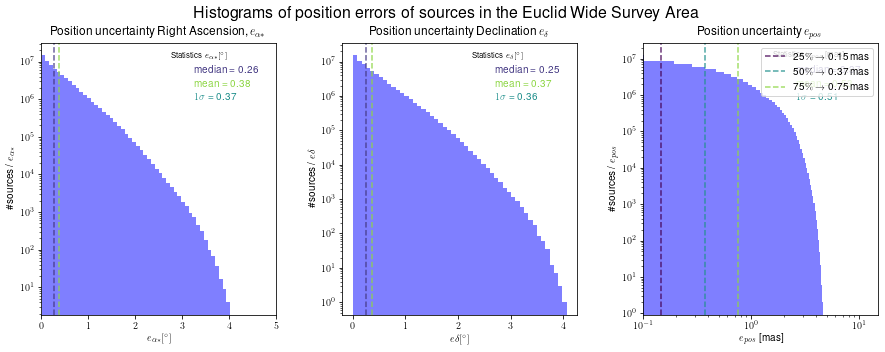

In [8]:
def SourcesEuclidSky_POS_HistCum_info(pm_table, b=100, a=0.5, cum='auto', title = '', info='NoINFO', vel_filter=150.0, log=False, norm=None):
    
    log_option = check_input(log, [False, True])
    norm_option = check_input(norm, [None, True])
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Histograms {}'.format(title), fontsize=16)
    
    # HISTOGRAM FOR PROPER MOTION IN RA DIRECTION    
    data_errra = pm_table["ra_error"]
    ax1.set_title(r"Position uncertainty Right Ascension, $e_{\alpha \ast}$")
    hist1 = data_errra.plot.hist(bins=b, alpha=a, ax=ax1, density=norm_option, log=log_option, facecolor='b',)      
    ax1.xaxis.set_label_text(r"$e_{\alpha \ast} [^{\circ}]$")
    ax1.yaxis.set_label_text(r"\#sources / $e_{\alpha \ast}$")
    ax1.set_xlim((0, 5))
    
    med = data_errra.median()
    mn = data_errra.mean()
    stnd = data_errra.std()
    
    # PLOT STATISTICS PMRA
    ax1.text(0.55, 0.95, r'Statistics $e_{\alpha \ast} [^{\circ}]$', fontsize=8, va='center', ha='left', color='#000000', transform=ax1.transAxes,)# backgroundcolor='w',)
    # plot median value of pmra in the histogram
    ax1.axvline(x= med, linestyle='dashed', alpha=0.8, color='#443983', zorder=1)
    ax1.text(0.65, 0.90, 'median = {0:.2f}'.format(med), fontsize=10, va='center', ha='left', color='#443983', transform=ax1.transAxes,)# backgroundcolor='w',)
    # plot mean value of pmra in the histogram
    ax1.axvline(x= mn, linestyle='dashed', alpha=0.8, color='#8ed645', zorder=1)
    ax1.text(0.65, 0.85, 'mean = {0:.2f}'.format(mn), fontsize=10, va='center', ha='left', color='#8ed645', transform=ax1.transAxes,)# backgroundcolor='w',)
    # plot std value of pmra in the histogram
    ax1.text(0.65, 0.80, '$1\sigma$ = {0:.2f}'.format(stnd), fontsize=10, va='center', ha='left', color='#21908d', transform=ax1.transAxes,)# backgroundcolor='w',)
    
    
    # HISTOGRAM FOR PROPER MOTION IN DEC DIRECTION
    data_errdec = pm_table["dec_error"]
    ax2.set_title(r"Position uncertainty Declination $e_{\delta}$")
    hist2 = data_errdec.plot.hist(bins=b, alpha=a, ax=ax2, density=norm_option, log=log_option, facecolor='b',)  
    ax2.xaxis.set_label_text(r"$e{\delta} [^{\circ}]$")
    ax2.yaxis.set_label_text(r"\#sources / $e{\delta}$")
    
    med = data_errdec.median()
    mn = data_errdec.mean()
    stnd = data_errdec.std()
    
    # PLOT STATISTICS PMDEC
    ax2.text(0.55, 0.95, r'Statistics $e_{\delta} [^{\circ}]$', fontsize=8, va='center', ha='left', color='#000000', transform=ax2.transAxes,)# backgroundcolor='w',)
    # plot median value of pmdec in the histogram
    ax2.axvline(x= med, linestyle='dashed', alpha=0.8, color='#443983', zorder=1)
    ax2.text(0.65, 0.90, 'median = {0:.2f}'.format(med), fontsize=10, va='center', ha='left', color='#443983', transform=ax2.transAxes,)# backgroundcolor='w',)
    # plot mean value of pmdec in the histogram
    ax2.axvline(x= mn, linestyle='dashed', alpha=0.8, color='#8ed645', zorder=1)
    ax2.text(0.65, 0.85, 'mean = {0:.2f}'.format(mn), fontsize=10, va='center', ha='left', color='#8ed645', transform=ax2.transAxes,)# backgroundcolor='w',)
    # plot std value of pmdec in the histogram
    ax2.text(0.65, 0.80, '$1\sigma$ = {0:.2f}'.format(stnd), fontsize=10, va='center', ha='left', color='#21908d', transform=ax2.transAxes,)# backgroundcolor='w',)

    
    # HISTOGRAM FOR PROPER MOTION IN (DEC^2+RA^2)^(1/2)  
    
    data_dist = (data_errra**2 + data_errdec**2)**(0.5)
    ax3.set_title(r"Position uncertainty $e_{pos}$")
    
    hist3 = data_dist.plot.hist(bins=b, alpha=a, ax=ax3, density=False, facecolor='b', log=True, label="Histogram",) 
    ax3.xaxis.set_label_text(r" $e_{pos}$ [mas]")
    ax3.yaxis.set_label_text(r"\#sources / $e_{pos}$")
    ax3.set_xscale('log')
    ax3.set_xlim( left=0.1, right = 15)
    ax3.set_ylim( bottom=0)

    distCount, distMean, distStd, distMn, dist25, dist50, dist75, distMx = data_dist.describe() 
    ax3.axvline(x=dist25, linestyle='dashed', alpha=0.8, color='#440154', zorder=1, label = '25$\%$ = {0:.2f}'.format(dist25))
    ax3.axvline(x=dist50, linestyle='dashed', alpha=0.8, color='#21908d', zorder=1, label = '50$\%$ = {0:.2f}'.format(dist50))
    ax3.axvline(x=dist75, linestyle='dashed', alpha=0.8, color='#8ed645', zorder=1, label = '75$\%$ = {0:.2f}'.format(dist75))
       
    
    # PLOT STATISTICS PMdist
    ax3.text(0.55, 0.95, r'Statistics $e_{pos}$ [mas]', fontsize=8, va='center', ha='left', color='#000000', transform=ax3.transAxes,)# backgroundcolor='w',)
    # plot median value of pmdist in the histogram
    ax3.text(0.65, 0.90, 'median = {0:.2f}'.format(data_dist.median()), fontsize=10, va='center', ha='left', color='#443983', transform=ax3.transAxes,)# backgroundcolor='w',)
    # plot mean value of pmdist in the histogram
    ax3.text(0.65, 0.85, 'mean = {0:.2f}'.format(distMean), fontsize=10, va='center', ha='left', color='#8ed645', transform=ax3.transAxes,)# backgroundcolor='w',)
    # plot std value of pmdist in the histogram
    ax3.text(0.65, 0.80, '$1\sigma$ = {0:.2f}'.format(distStd), fontsize=10, va='center', ha='left', color='#21908d', transform=ax3.transAxes,)# backgroundcolor='w',)
    
    ax3.set_xlim(right = 15)    
    # ADD COSTOM LEGEND TO THE PLOT
    legend_elements = [#Line2D([0], [0], color='r', label='Cumulative POS'),
                      Line2D([0], [0], linestyle='dashed', alpha=0.8, color='#440154', label = '25$\% \\rightarrow$ {0:.2f} mas'.format(dist25)),
                      Line2D([0], [0], linestyle='dashed', alpha=0.8, color='#21908d', label = '50$\% \\rightarrow$ {0:.2f} mas'.format(dist50)),
                      Line2D([0], [0], linestyle='dashed', alpha=0.8, color='#8ed645', label = '75$\% \\rightarrow$ {0:.2f} mas'.format(dist75))]
    ax3.legend(handles = legend_elements)
    
    fig.subplots_adjust(wspace=0.28)
    plt.show()
    return None



SourcesEuclidSky_POS_HistCum_info(EUCLID_pos, b=50, cum=40, title='of position errors of sources in the Euclid Wide Survey Area', info='thesisPM_EuclidPM_logTruenormFalse', vel_filter=75.0, log=True, norm=False)


<center><i><b>Figure 1:</b>  Histograms showing the distributions of error in RA, DEC and the angular position</i></center>  

#### <u>Limitations of Gaia DR2</u><br>
<b>SURVEY COMPLETENESS</b><br>
* The Gaia DR2 catalogue is incomplete at the bright meaning a fraction of the stars in that magnitude range are still missing. In addition, the faint magnitude limit depends on celestial position. 
* About 20% of stars with proper motion $>0.6$ arcsec yr$^{-1}$ are still missing.
* For dense areas ($> 400,000$ stars per deg$^2$) the magnitude limit of Gaia DR2 is as bright as G=18. 
* The effective angular resolution of the survey is $\sim0.4$ arcsec.<br>

<b>ASTROMETRY</b><br>
* Parallax systematics exist depending on celestial position, magnitude, and colour. They are estimated to be $<0.1$ mas.
* A small proportion of sources have corrupted parallaxes that can be filtered from the catalog when performing scientific data analysis.
* The astrometric uncertainties listed in Gaia DR2 are derived from the formal errors resulting from the astrometric data treatment and have not been externally calibrated. The uncertainties are underestimated by $\sim7–10$ % for G > 16 mag faint sources outside the Galactic plane, and by up to $\sim30$ % for G < 12 mag bright stars.
* The astrometry quality of bright G < 6 mag sources is inferior to the rest of the data. 

***

<br>
<br>
<br>

[Go back to list of contents](#LOC)
***
<br>

## Obtaining proper motions from the Gaia catalog

We make use of the TAP+ REST service to get access to the Gaia DR2 Archive. TAP+ is an extension of Table Access Protocol [TAP](http://www.ivoa.net/documents/TAP/) specified by the International Virtual Observatory Alliance [IVOA](http://www.ivoa.net).

Astronomical Data Query Language [ADQL](http://www.ivoa.net/documents/ADQL/2.0) is used to query the database. It is similar to Structured Query Language (SQL). ADQL queries are limited to a maximum number of 3,000,000 rows. Since the Euclid Sky Footprint will definitily contain more sources, we have to define a query that iterates across the sky. The function `query_gaia_EUCLIDSKY_all_pm()` from the method `select_from_gaiadb` allows us to use the query below. The values for the right ascension and declination are obtained by the Class `EuclidSky()`. For a visualization, look at the plot. 


In [11]:
 

# Function used to fill areas to show galactic exclusion zone
def galB2radec(B, L = np.linspace(-180, 180, 10000)):
    """Calculate the RA and Dec [in degrees] from a given Galactic latitude, B, and longitude, L
    
    Usage: 
    1) only B input calculates all [RA, Dec] values for given B [in degrees] and L ranging from -180 degree till 180 degree: 
    ra, dec = galB2radec(B = 30.0) 
    
    2) both B and L input calculates all [RA, Dec] values for given B and L [in degrees]: 
    ra, dec = galB2radec(B = 30.0, L = 0.0) 

    ra.radian, dec.radian        # to obtain ra and dec in radians

    """
    coords = SkyCoord(l=L*u.deg, b=B*u.deg, frame='galactic')
    icrs_coords = coords.icrs
    ra = coord.Angle(icrs_coords.ra)
    ra = ra.wrap_at(180*u.degree)
    dec = coord.Angle(icrs_coords.dec)
    return ra, dec

# Function used to fill areas to show ecliptic exclusion zone
def eclB2radec(beta, lambd = np.linspace(-180, 180, 100)):
    """Calculate the RA and Dec [in degrees] from a given Ecliptic latitude, beta, and longitude, lambda
    
    Usage: 
    1) only beta input calculates all [RA, Dec] values for given beta [in degrees] and lambd ranging from -180 degree till 180 degree: 
    ra, dec = galB2radec(beta = 30.0) 
    
    2) both beta and lambda input calculates all [RA, Dec] values for given beta and lambda [in degrees]: 
    ra, dec = galB2radec(beta = 30.0, lambd = 0.0) 

    ra.radian, dec.radian        # to obtain ra and dec in radians

    """
    coords = SkyCoord(lon=lambd*u.deg, lat=beta*u.deg, frame='barycentricmeanecliptic')
    icrs_coords = coords.icrs
    ra = coord.Angle(icrs_coords.ra)
    ra = ra.wrap_at(180*u.degree)
    dec = coord.Angle(icrs_coords.dec)
    return ra, dec

class EuclidSky:
    def __init__(self):
        self.galactic_latitude = 30  # Galactic plane: |b| < 30 deg.
        self.celestial_latitude = 15  # ecliptic plane: |beta| < 15 deg.
        gal_l = np.linspace(-180, 180, 10000)

        sky_ra = np.linspace(0, 360, 360)
        sky_dec = np.linspace(-90, 90, 180)
        sky_ra_grid, sky_dec_grid = np.meshgrid(sky_ra, sky_dec)

        self.coords_north = SkyCoord(l=gal_l * u.deg, b=self.galactic_latitude * u.deg, frame='galactic')
        self.coords_south = SkyCoord(l=gal_l * u.deg, b=-1 * self.galactic_latitude * u.deg, frame='galactic')
        self.coords_sky = SkyCoord(ra= sky_ra_grid, dec= sky_dec_grid, frame='icrs', unit=u.deg)
        self.icrs_coords_north = self.coords_north.icrs
        self.icrs_coords_south = self.coords_south.icrs
        self.icrs_coords_sky = self.coords_sky.icrs

    def north_patch_ra(self):
        return np.linspace(min(self.icrs_coords_north.ra.deg), max(self.icrs_coords_north.ra.deg), num=10,
                           endpoint=True)

    def north_patch_dec(self):
        return np.linspace(min(self.icrs_coords_north.dec.deg), max(self.icrs_coords_north.dec.deg), num=10,
                           endpoint=True)

    def south_patch_right_ra(self):
        mean_icrs_ra = np.mean(self.icrs_coords_south.ra.deg)
        right_ra_lim = min(self.icrs_coords_south[self.icrs_coords_south.ra.deg > mean_icrs_ra].ra.deg)
        return np.linspace(right_ra_lim, max(self.icrs_coords_south.ra.deg), num=5, endpoint=True)

    def south_patch_left_ra(self):
        mean_icrs_ra = np.mean(self.icrs_coords_south.ra.deg)
        left_ra_lim = max(self.icrs_coords_south[self.icrs_coords_south.ra.deg < mean_icrs_ra].ra.deg)
        return np.linspace(min(self.icrs_coords_south.ra.deg), left_ra_lim, num=6, endpoint=True)

    def south_patch_dec(self):
        return np.linspace(min(self.icrs_coords_south.dec.deg), max(self.icrs_coords_south.dec.deg), num=10,
                           endpoint=True)

    def fill_entire_skyPerSdeg_deg(self):
        return self.icrs_coords_sky

    def fill_entire_skyPerSdeg_gal(self):
        return self.icrs_coords_sky.galactic

    def fill_entire_skyRandom_gal_ecl(self, n=10000):
        # generate values between 0 and 1 for convertion to random radians
        ra, dec = np.random.random(2*n).reshape(2, -1)

        # use the random numbers range [0.0;1.0] to determine random radians
        Random_ra_rad = (2*np.pi) * (ra - 0.5)
        Random_dec_rad = np.arcsin(2.*(dec-0.5)) 

        # transform radians to degree
        to_deg = 180/np.pi
        skyRandom_ra = (Random_ra_rad*to_deg)+180
        skyRandom_dec = Random_dec_rad*to_deg

        skyRandom_ra_grid, skyRandom_dec_grid = np.meshgrid(skyRandom_ra, skyRandom_dec)
        coords_skyRandom = SkyCoord(ra=skyRandom_ra_grid, dec=skyRandom_dec_grid, frame='icrs', unit=u.deg)
        icrs_coords_skyRandom = coords_skyRandom.icrs
        return icrs_coords_skyRandom.galactic, icrs_coords_skyRandom.barycentricmeanecliptic


```SQL
SELECT solution_id, designation, source_id, random_index, ref_epoch, ra, ra_error, dec, dec_error, parallax, parallax_error, parallax_over_error, pmra, pmra_error, pmdec, pmdec_error, ra_dec_corr, ra_parallax_corr, ra_pmra_corr, ra_pmdec_corr, dec_parallax_corr, dec_pmra_corr, dec_pmdec_corr, parallax_pmra_corr, parallax_pmdec_corr, pmra_pmdec_corr, astrometric_n_obs_al, astrometric_n_obs_ac, astrometric_n_good_obs_al, astrometric_n_bad_obs_al, astrometric_gof_al, astrometric_chi2_al, astrometric_excess_noise, astrometric_excess_noise_sig, astrometric_params_solved, astrometric_primary_flag, astrometric_weight_al, astrometric_pseudo_colour, astrometric_pseudo_colour_error, mean_varpi_factor_al, astrometric_matched_observations, visibility_periods_used, astrometric_sigma5d_max, frame_rotator_object_type, matched_observations, duplicated_source, phot_g_n_obs, phot_g_mean_flux, phot_g_mean_flux_error, phot_g_mean_flux_over_error, phot_g_mean_mag, phot_bp_n_obs, phot_bp_mean_flux, phot_bp_mean_flux_error, phot_bp_mean_flux_over_error, phot_bp_mean_mag, phot_rp_n_obs, phot_rp_mean_flux, phot_rp_mean_flux_error, phot_rp_mean_flux_over_error, phot_rp_mean_mag, phot_bp_rp_excess_factor, phot_proc_mode, bp_rp, bp_g, g_rp, radial_velocity, radial_velocity_error, phot_variable_flag, l, b, ecl_lon, ecl_lat, datalink_url 
FROM gaiadr2.gaia_source  
WHERE ra<{} AND ra>{} AND dec<{} AND dec>{} 
AND ABS(B)>30 AND ABS(ecl_lat)>15 
AND parallax IS NOT NULL
```

The code can be found in the file: 'py/select_from_gaiadb.py'

<a id = "f2.2" LOC></a>

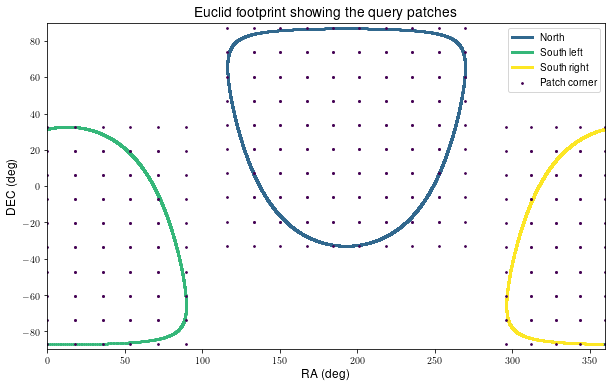

In [18]:
"""Plotting of the Euclid Sky Footprint. The patches that are showed 
represent the patches used in order to query over the entire sky. 
Without those, the Gaia query will exceed its limit of 3 million."""    
    
gal_l_n = np.linspace(-180, 180, 10000)
gal_l_sl = np.linspace(-180, 180, 10000/2)
gal_l_sr = np.linspace(-56.175, 110, 10000/2)

coords_n = SkyCoord(l=gal_l_n*u.deg, b=30*u.deg, frame='galactic')
coords_sl = SkyCoord(l=gal_l_sl*u.deg, b=-30*u.deg, frame='galactic')
coords_sr = SkyCoord(l=gal_l_sr*u.deg, b=-30*u.deg, frame='galactic')
icrs_coords_n = coords_n.icrs; icrs_coords_sl = coords_sl.icrs; icrs_coords_sr = coords_sr.icrs
fig, frame = plt.subplots(1,1, figsize=(10, 6))
     
        
# Obtaining ra, dec coordinates for predefined patchen on the sky that cover the Euclid footprint       
euclid_patch_ = EuclidSky() # north_patch_ra, north_patch_dec, south_patch_ra, south_patch_dec
euclid_patch_north = euclid_patch_.north_patch_ra(), euclid_patch_.north_patch_dec()
euclid_patch_south = euclid_patch_.south_patch_right_ra(), euclid_patch_.south_patch_left_ra(), euclid_patch_.south_patch_dec()

frame.scatter(icrs_coords_n.ra, icrs_coords_n.dec, s=4, c= blue)
north = Line2D(range(10), range(10), linestyle='-', linewidth = 3, c= blue)
frame.scatter(icrs_coords_sl.ra, icrs_coords_sl.dec, s=4, c= green)
southleft = Line2D(range(10), range(10), linestyle='-', linewidth = 3, c= green)
frame.scatter(icrs_coords_sr.ra, icrs_coords_sr.dec, s=4, c= yellow)
southright = Line2D(range(10), range(10), linestyle='-', linewidth = 3, c= yellow)

for idx_ra, ra in enumerate(euclid_patch_north[0][:-1]):
    for idx_dec, dec in enumerate(euclid_patch_north[1][:-1]):
        frame.scatter(ra, dec, s=3, c= purple)
        frame.scatter(euclid_patch_north[0][idx_ra+1], euclid_patch_north[1][idx_dec+1], s=3, c= purple)
        
for idx_ra, ra in enumerate(euclid_patch_south[0][:-1]):
    for idx_dec, dec in enumerate(euclid_patch_south[2][:-1]):
        frame.scatter(ra, dec, s=3, c= purple)
        frame.scatter(euclid_patch_south[0][idx_ra+1], euclid_patch_south[2][idx_dec+1], s=3, c= purple)
        
for idx_ra, ra in enumerate(euclid_patch_south[1][:-1]):
    for idx_dec, dec in enumerate(euclid_patch_south[2][:-1]):
        frame.scatter(ra, dec, s=3, c= purple)
        frame.scatter(euclid_patch_south[1][idx_ra+1], euclid_patch_south[2][idx_dec+1], s=3, c= purple)

# Plotting North corners once
frame.scatter(euclid_patch_north[0][0], euclid_patch_north[1][-1], s=3, c= purple)
frame.scatter(euclid_patch_north[0][-1], euclid_patch_north[1][0], s=3, c= purple)
# Plotting South right corners once
frame.scatter(euclid_patch_south[0][0], euclid_patch_south[2][-1], s=3, c= purple)
frame.scatter(euclid_patch_south[0][-1], euclid_patch_south[2][0], s=3, c= purple)   
# Plotting South left corners once
frame.scatter(euclid_patch_south[1][0], euclid_patch_south[2][-1], s=3, c= purple)
patch = frame.scatter(euclid_patch_south[1][-1], euclid_patch_south[2][0], s=3, c= purple, )
# patch = Line2D(range(10), range(10), linestyle='-', linewidth = 3, c= blue)


# Plotting legend
plt.legend((north, southleft, southright, patch), ('North ', 'South left ', 'South right ', 'Patch corner'))
    
frame.set_title('Euclid footprint showing the query patches', fontsize=14)      
frame.xaxis.set_label_text("RA (deg)", fontsize=12)
frame.set_xlim(0,360)
frame.yaxis.set_label_text("DEC (deg)", fontsize=12)
frame.set_ylim(-90,90)

ax.grid(True)
plt.show()

<center><i><b>Figure 2:</b>  The footprint of the two areas, North and South, in the Euclid Wide Survey are outline in blue and green+yellow. For usability reasons, the Gaia DR2 catalog inside the Gaia database is split into sky tiles of few hundred square degrees each. The black dots indicate the corners of these tiles.</i></center> 

The patches are stores as a pandas table in a .csv file with filenames containing the central pointing of the patch. For example `gaia_euclid_patch_243.976_40.462.csv` has its center at 243.976 degrees right ascention and 40.462 degrees declination. Therefore it should be part of the blue North in Figure [2](#f2.2).


***

<br>
<br>
<br>

[Go back to list of contents](#LOC)

***
<br>

## Proper motion analysis

<i>The Euclid Wide Survey Area contains 68,332,933 sources according to Gaia's DR2. This value is obtained by using the Class `EuclidSky()`.</i>  We want to make a reliable filter for bonafide stars by taking into account e.g. flagged sources. 

>    After Gaia observes astronomical sources there is the process of [filtering and integration](https://gea.esac.esa.int/archive/documentation/GDR2/Catalogue_consolidation/chap_cu9cva/sec_cu9cva_consolidation/ssec_cu9cva_consolidation_ingestion.html) of these sources into the Gaia Archive. First there is conversion of the integrated records into a simpler and flatter data structure, `gaia_source`. Preliminary quality checks are being applied, e.g. sources that were observed less than 5 times or showing an excess noise greater than 20 mas are filtered. 

#### Applying a filter for unwanted sources
Gaia measures the positions of celectial images in its focal plane. Using the astrometric solution allows the reconstruction of the celestial positions, proper motions, and parallaxes. However, not all astrometric solutions present in the Gaia DR2 are equally good. Therefore, several attributes in Gaia DR2 are dedicated to the goodness of the solution. 

The attribute `astrometric_gof_a` indicated a goodness statistic, a gaussianized $\chi^2$, of the astrometric solution with respect to the along-scan observations. The approximation would be that values > 3 indicate that there was a bad fit to the data.

The attribute `astrometric_primary_flag` in the Gaia DR2 main table provides us with a Boolean for every entry indicating whether the source was used as a primary (true) or secondary (false) source. Only the primary sources contribute to the estimation of attitude, calibration, and global parameters.

From all sources in Gaia DR2, 57,087,413 entries have astrometric_gof_al < 3.0 and are considered to be good calibrators. The remaining 11,245,519 entries (16.46%) have `astrometric_gof_al` > 3.0. Since we do not want to use less quality calibrators, these sources are neglected in the proper motion analysis. 

In [ ]:
# print("{} entries have astrometric_gof_al < 3.0 and are considered to be good calibrators".format(n_sources_valid))
# print("{} entries have astrometric_gof_al > 3.0\n".format(n_sources-n_sources_valid))

# print("Therefore {:.2f}% of the sources has been filtered out".format(((n_sources-n_sources_valid)/(n_sources))*100))

#### Splitting the DR2 data based on angular velocities
Plotting all the sources would take too much time. Therefore, we want to split the data in terms of proper motion and in terms of location on the sky. Before doing to, we want to get an initial overview of the velocities of all the in sources. This is done by using histograms for the proper motions in the right ascention and declination direction. In addition, by neglecting the direction we are able to make a cumulative plot of the proper motions taking the magnitudes in both directions. We define this as the 'proper motion', $\mu$.

$$ \mu=\sqrt{\mu_{\alpha \ast}^2 + \mu_{\delta}^2}, \label{eqn: pmA} $$, with the proper motion in right ascension, $\mu_{\alpha \ast}$, and declination $\mu_{\delta}$.  <a id = "f2.3" LOC></a>

In [10]:
def SourcesEuclidSky_PM_HistCum_info(pm_table, b=100, a=0.5, cum='auto', title = '', info='NoINFO', vel_filter=150.0, log=False, norm=None):
    
    log_option = check_input(log, [False, True])
    norm_option = check_input(norm, [None, True])
    
    check_column(pm_table)
    
    # Neglecting the high velocity sources to create the cumulative frequency histogram. The table is being sorted on the [direction] column
    tb_dirfilter = pm_table[pm_table['mu']<vel_filter].sort_values(by=['mu'])
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Histograms {}'.format(title), fontsize=16)
    
    
    # HISTOGRAM FOR PROPER MOTION IN RA DIRECTION    
    data_pmra = tb_dirfilter["pmra"]
    ax1.set_title(r"Proper motion Right Ascension, $\mu_{\alpha \ast}$")
    hist1 = data_pmra.plot.hist(bins=b, alpha=a, ax=ax1, density=norm_option, log=log_option, facecolor='b',)      
    ax1.xaxis.set_label_text(r"$\mu_{\alpha \ast}$ [mas/year]")
    ax1.yaxis.set_label_text(r"\#sources / $\mu$")
    ax1.set_xlim((-80, 80))
    
    med = data_pmra.median()
    mn = data_pmra.mean()
    stnd = data_pmra.std()
    
    # PLOT STATISTICS PMRA
    ax1.text(0.55, 0.95, r'Statistics $\mu$ [mas/yr]', fontsize=8, va='center', ha='left', color='#000000', transform=ax1.transAxes,)# backgroundcolor='w',)
    # plot median value of pmra in the histogram
    ax1.axvline(x= med, linestyle='dashed', alpha=0.8, color='#443983', zorder=1)
    ax1.text(0.65, 0.90, 'median = {0:.2f}'.format(med), fontsize=10, va='center', ha='left', color='#443983', transform=ax1.transAxes,)# backgroundcolor='w',)
    # plot mean value of pmra in the histogram
    ax1.axvline(x= mn, linestyle='dashed', alpha=0.8, color='#8ed645', zorder=1)
    ax1.text(0.65, 0.85, 'mean = {0:.2f}'.format(mn), fontsize=10, va='center', ha='left', color='#8ed645', transform=ax1.transAxes,)# backgroundcolor='w',)
    # plot std value of pmra in the histogram
    ax1.text(0.65, 0.80, '$1\sigma$ = {0:.2f}'.format(stnd), fontsize=10, va='center', ha='left', color='#21908d', transform=ax1.transAxes,)# backgroundcolor='w',)
    
    
    # HISTOGRAM FOR PROPER MOTION IN DEC DIRECTION
    data_pmdec = tb_dirfilter["pmdec"]
    ax2.set_title(r"Proper Motion Declination $\mu_{\delta}$")
    hist2 = data_pmdec.plot.hist(bins=b, alpha=a, ax=ax2, density=norm_option, log=log_option, facecolor='b',)  
    ax2.xaxis.set_label_text(r"$\mu_{\delta}$ [mas/year]")
    ax2.yaxis.set_label_text(r"\#sources / $\mu$")
    ax2.set_xlim((-80, 80))
    
    med = data_pmdec.median()
    mn = data_pmdec.mean()
    stnd = data_pmdec.std()
    
    # PLOT STATISTICS PMDEC
    ax2.text(0.55, 0.95, r'Statistics $\mu$ [mas/yr]', fontsize=8, va='center', ha='left', color='#000000', transform=ax2.transAxes,)# backgroundcolor='w',)
    # plot median value of pmdec in the histogram
    ax2.axvline(x= med, linestyle='dashed', alpha=0.8, color='#443983', zorder=1)
    ax2.text(0.65, 0.90, 'median = {0:.2f}'.format(med), fontsize=10, va='center', ha='left', color='#443983', transform=ax2.transAxes,)# backgroundcolor='w',)
    # plot mean value of pmdec in the histogram
    ax2.axvline(x= mn, linestyle='dashed', alpha=0.8, color='#8ed645', zorder=1)
    ax2.text(0.65, 0.85, 'mean = {0:.2f}'.format(mn), fontsize=10, va='center', ha='left', color='#8ed645', transform=ax2.transAxes,)# backgroundcolor='w',)
    # plot std value of pmdec in the histogram
    ax2.text(0.65, 0.80, '$1\sigma$ = {0:.2f}'.format(stnd), fontsize=10, va='center', ha='left', color='#21908d', transform=ax2.transAxes,)# backgroundcolor='w',)

    
    # HISTOGRAM FOR PROPER MOTION IN (DEC^2+RA^2)^(1/2)     
    data_dist = tb_dirfilter['mu']
    ax3.set_title(r"Proper motion, $\mu$")
    
    hist3 = data_dist.plot.hist(bins=b, alpha=a, ax=ax3, density=False, facecolor='b', log=True, label="Histogram",) 
    ax3.xaxis.set_label_text(r"$\mu$ [mas/year]")
    ax3.yaxis.set_label_text(r"\#sources / PM")
    ax3.set_xscale('log')
    ax3.set_xlim( left=0.1, right = 20)
    ax3.set_ylim( bottom=0)

    distCount, distMean, distStd, distMn, dist25, dist50, dist75, distMx = tb_dirfilter['mu'].describe() 
    ax3.axvline(x=dist25, linestyle='dashed', alpha=0.8, color='#440154', zorder=1, label = '25$\%$ = {0:.2f}'.format(dist25))
    ax3.axvline(x=dist50, linestyle='dashed', alpha=0.8, color='#21908d', zorder=1, label = '50$\%$ = {0:.2f}'.format(dist50))
    ax3.axvline(x=dist75, linestyle='dashed', alpha=0.8, color='#8ed645', zorder=1, label = '75$\%$ = {0:.2f}'.format(dist75))
       
    
    # PLOT STATISTICS PMdist
    ax3.text(0.05, 0.30, r'Statistics $\mu$ [mas/yr]', fontsize=8, va='center', ha='left', color='#000000', transform=ax3.transAxes,)# backgroundcolor='w',)
    # plot median value of pmdist in the histogram
    ax3.text(0.15, 0.25, 'median = {0:.2f}'.format(data_dist.median()), fontsize=10, va='center', ha='left', color='#000000', transform=ax3.transAxes,)# backgroundcolor='w',)
    # plot mean value of pmdist in the histogram
    ax3.text(0.15, 0.20, 'mean = {0:.2f}'.format(distMean), fontsize=10, va='center', ha='left', color='#000000', transform=ax3.transAxes,)# backgroundcolor='w',)
    # plot std value of pmdist in the histogram
    ax3.text(0.15, 0.15, '$1\sigma$ = {0:.2f}'.format(distStd), fontsize=10, va='center', ha='left', color='#000000', transform=ax3.transAxes,)# backgroundcolor='w',)
    

    # CUMULATIVE DISTRIBUTION FOR PROPER MOTION IN (DEC^2+RA^2)^(1/2)
    ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis      
    pm_xrange = list(np.linspace(0.1, 1.0, num=10, endpoint=False))
    pm_xrange.extend(list(np.arange(int(vel_filter))[1:]))
    ax4.plot(pm_xrange, [len(data_dist[data_dist<i])/len(data_dist) for i in pm_xrange], '-r', linewidth=2, label = r'Cumulative $\mu$')
    
    # ADD COSTOM LEGEND TO THE PLOT
    legend_elements = [Line2D([0], [0], color='r', label='Cumulative PM'),
                      Line2D([0], [0], linestyle='dashed', alpha=0.8, color='#440154', label = '25$\% \\rightarrow$ {0:.2f} mas/yr'.format(dist25)),
                      Line2D([0], [0], linestyle='dashed', alpha=0.8, color='#21908d', label = '50$\% \\rightarrow$ {0:.2f} mas/yr'.format(dist50)),
                      Line2D([0], [0], linestyle='dashed', alpha=0.8, color='#8ed645', label = '75$\% \\rightarrow$ {0:.2f} mas/yr'.format(dist75))]
    ax3.legend(handles = legend_elements )
    
    fig.subplots_adjust(wspace=0.28)
    plt.show()
    return None


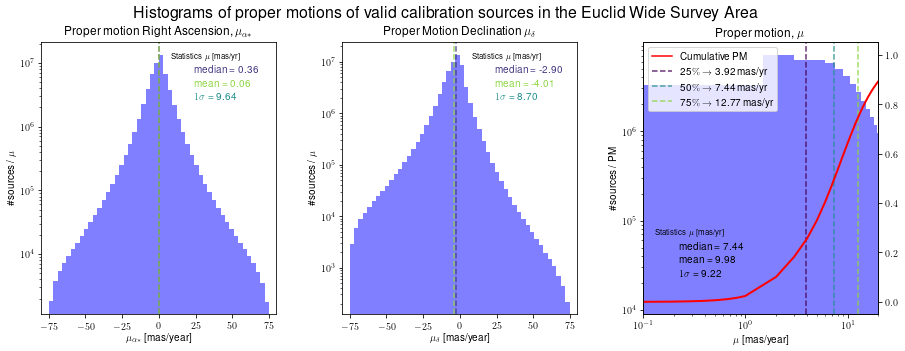

In [22]:
SourcesEuclidSky_PM_HistCum_info(EUCLID_table_valid, b=50, cum=40, title='of proper motions of valid calibration sources in the Euclid Wide Survey Area', info='thesisvalid_PM_EuclidPM_logTruenormFalse', vel_filter=75.0, log=True, norm=False)

<center><i><b>Figure 3:</b>  Histograms showing the proper motion distributions for different directions in the Euclid Wide Survey Area. left: histogram of pmra in mas yr$^{-1}$, middle: histogram of pmdec in mas yr$^{-1}$, right: histogram of $\mu$ in mas yr$^{-1}$.     </i></center> 

> The plots on the left and in the middle show histograms of the proper motions in right ascension (stored as "pmra") and declination (stored as "pmdec") direction in mas/yr$^{-1}$ respectively. The red line in the right plot shows the cumulative frequency of what we define as the total proper motion, $\mu$. All attributes are measured in terms of angular velosity and therefore have the unit mas/yr$^{-1}$.

From Figure [3](#f2.3) we conclude that:
* the mean proper motion of sources in the Euclid Wide Survey Area in right ascension and declination direction are $0.14 \pm 10.46$ and $-4.10 \pm 9.37$ mas yr$^{-1}$ respectively. From this we can infer that most sources have small values for their proper motions and move slowly on the sky. 
 
* the distribution of the <i>pmra</i> of the sources(left plot) shows no angular velocity preference for the sources towards either negative or positive <i>pmra</i>. However the plot in the center does show a small preference for negative <i>pmdec</i>. 
* most sources are moving towards negative right ascension and declination coordinates. 
* looking at the right plot of Figure [3](#f2.3), revealing the the proper motion, $\mu$, we find a mean proper motion of $10.66$ mas yr$^{-1}$. In total 75% of all the sources in the Euclid Wide Survey Area are having a proper motion of $<13.59$ mas yr$^{-1}$.

By plotting a seperate sets of histogram for every 25% of the sources when looking at the cumulative frequency, 

 <a id = "f2.4" LOC></a>

In [31]:
def SourcesEuclidSky_PM_HistCum_slice(pm_table, b=100, a=0.5, percentage=0.25, title = '', info='NoINFO', vel_filter=150.0, log=False, norm=None):
    
    log_option = check_input(log, [False, True])
    norm_option = check_input(norm, [None, True])
    
    p = np.linspace(0, 1, (1/percentage)+1, endpoint=True)
    
    total_sources = len(pm_table)
    slices = total_sources*p 
    sli = total_sources/(len(p)-1)
    
    fig_cols = len(p)-1
    fig_length = fig_cols*5
        
    fig, axes = plt.subplots(figsize=(fig_length, 5), ncols=fig_cols, nrows = 1)
    fig.suptitle(r'Normalized $\mu$ frequency of gaia sources {} per {}$\%$'.format(title, int(percentage*100)), fontsize=16)
    
    check_column(pm_table)
    
    tb_s = pm_table.sort_values(by=['mu'])
    
    for idx_ax, ax in enumerate(axes[:-1]):
        ax.set_title("{}-{}$\%$".format(int(p[idx_ax]*100), int(p[idx_ax+1]*100)))
        # Selecting the rows from pm_table that are in between the desired percentages as defined by p=np.linspace()
        tb_sfreq = tb_s.iloc[ int(slices[idx_ax]):int(slices[idx_ax+1]) , : ]
        tb_sfreq = tb_sfreq['mu'][tb_sfreq['mu']<vel_filter]
        hist1 = tb_sfreq.plot.hist(bins=b, alpha=a, ax=ax, density=norm_option, log=log_option, facecolor='b',) 
        
        distCount, distMean, distStd, distMn, dist25, dist50, dist75, distMx = tb_sfreq.describe() 
        
        # PLOT STATISTICS PMdist
        ax.text(0.9, 0.30, 'Statistics [mas/yr]', fontsize=8, va='center', ha='right', color='#000000', transform=ax.transAxes,)# backgroundcolor='w',)
        # plot median value of pmdist in the histogram
        ax.text(0.9, 0.25, 'median = {0:.2f}'.format(tb_sfreq.median()), fontsize=10, va='center', ha='right', color='#000000', transform=ax.transAxes,)# backgroundcolor='w',)
        # plot mean value of pmdist in the histogram
        ax.text(0.9, 0.20, 'mean = {0:.2f}'.format(distMean), fontsize=10, va='center', ha='right', color='#000000', transform=ax.transAxes,)# backgroundcolor='w',)
        # plot std value of pmdist in the histogram
        ax.text(0.9, 0.15, '$1\sigma$ = {0:.2f}'.format(distStd), fontsize=10, va='center', ha='right', color='#000000', transform=ax.transAxes,)# backgroundcolor='w',)
        
        ax.xaxis.set_label_text(r"$\mu$ [mas/year]")
        ax.yaxis.set_label_text(r"\#sources / $\mu$")
    
    # HISTOGRAM FOR PROPER MOTION IN (DEC^2+RA^2)^(1/2)     
    data_dist = tb_s["mu"]    
    ax = axes[-1]
    
    ax.set_title("{}-{}$\%$".format(0, 100))
    ax.xaxis.set_label_text(r"$\mu$ [mas/year]")

    hist = data_dist[data_dist<150.0].plot.hist(bins=b, alpha=a, ax=ax, density=False, facecolor='b', log=True, label="Histogram",) 
    ax.xaxis.set_label_text(r"$\mu$ [mas/year]")
    ax.yaxis.set_label_text(r"\#sources / $\mu$")
    ax.set_xscale('log')
    ax.set_xlim( left=0.5, right = 150)
    ax.set_ylim( bottom=0)

    distCount, distMean, distStd, distMn, dist25, dist50, dist75, distMx = data_dist.describe() 
    ax.axvline(x=dist25, linestyle='dashed', alpha=0.8, color='#440154', zorder=1, label = '25$\%$ = {0:.2f}'.format(dist25))
    ax.axvline(x=dist50, linestyle='dashed', alpha=0.8, color='#21908d', zorder=1, label = '50$\%$ = {0:.2f}'.format(dist50))
    ax.axvline(x=dist75, linestyle='dashed', alpha=0.8, color='#8ed645', zorder=1, label = '75$\%$ = {0:.2f}'.format(dist75))
        
    # PLOT STATISTICS PMdist
    ax.text(0.02, 0.30, 'Statistics [mas/yr]', fontsize=8, va='center', ha='left', color='#000000', transform=ax.transAxes,)# backgroundcolor='w',)
    # plot median value of pmdist in the histogram
    ax.text(0.12, 0.25, 'median = {0:.2f}'.format(data_dist.median()), fontsize=10, va='center', ha='left', color='#000000', transform=ax.transAxes,)# backgroundcolor='w',)
    # plot mean value of pmdist in the histogram
    ax.text(0.12, 0.20, 'mean = {0:.2f}'.format(distMean), fontsize=10, va='center', ha='left', color='#000000', transform=ax.transAxes,)# backgroundcolor='w',)
    # plot std value of pmdist in the histogram
    ax.text(0.12, 0.15, '$1\sigma$ = {0:.2f}'.format(distStd), fontsize=10, va='center', ha='left', color='#000000', transform=ax.transAxes,)# backgroundcolor='w',)

    # CUMULATIVE DISTRIBUTION FOR PROPER MOTION IN (DEC^2+RA^2)^(1/2)
    ax1 = ax.twinx()  # instantiate a second axes that shares the same x-axis      
    pm_xrange = list(np.linspace(0.1, 1.0, num=10, endpoint=False))
    pm_xrange.extend(list(np.arange(int(vel_filter))[1:]))
    ax1.plot(pm_xrange, [len(data_dist[data_dist<i])/len(data_dist) for i in pm_xrange], '-r', linewidth=2, label = r'Cumulative $\mu$')

    # ADD COSTOM LEGEND TO THE PLOT
    legend_elements = [Line2D([0], [0], color='r', label='Cumulative $\mu$'),
                      Line2D([0], [0], linestyle='dashed', alpha=0.8, color='#440154', label = '25$\% \\rightarrow$ {0:.2f} mas/yr'.format(dist25)),
                      Line2D([0], [0], linestyle='dashed', alpha=0.8, color='#21908d', label = '50$\% \\rightarrow$ {0:.2f} mas/yr'.format(dist50)),
                      Line2D([0], [0], linestyle='dashed', alpha=0.8, color='#8ed645', label = '75$\% \\rightarrow$ {0:.2f} mas/yr'.format(dist75))]
    ax.legend(handles = legend_elements )


    fig.subplots_adjust(wspace=0.28)
    plt.show()
    return None

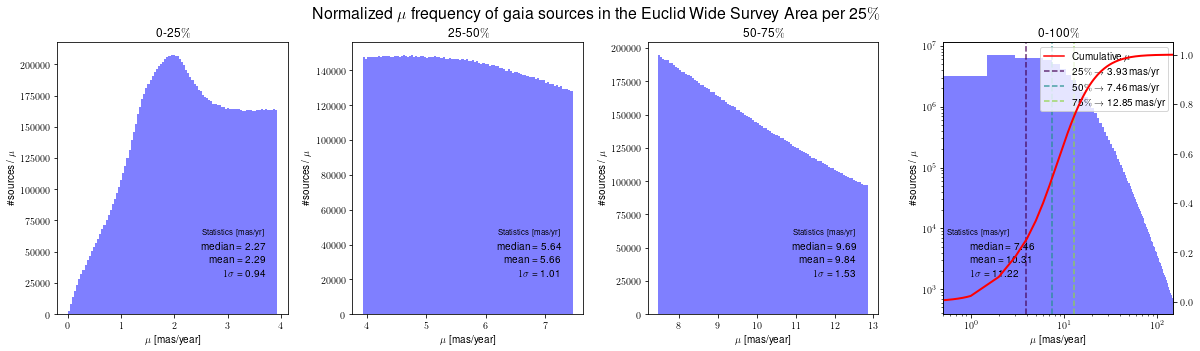

In [28]:
SourcesEuclidSky_PM_HistCum_slice(EUCLID_table_valid, b=100, a=0.5, percentage=0.25, cum='auto', title = 'in the Euclid Wide Survey Area', info='thesis_EntireEuclidlogFalsenormFalse', vel_filter=150.0, log=False, norm=None)

<center><i><b>Figure 4:</b>  Histograms showing the $\mu$ distributions for every 25% slot of the sources in the entire Euclid Sky footprint. </i></center> 


> The plots are showing the distribution of total proper motions, $\mu$, of sources in the Euclid sky footprint, as detected by Gaia according to DR2.  A total of 61617 sources have been filtered out because they had $\mu$ of $> 150$ mas yr$^{-1}$. Plotting these would have increased the range from the axes from a maximum of $150$ to a maximum equal to the highest $\mu$ source of about $\sim 8645$ mas yr$^{-1}$. From left to right we find histograms of the amount of sources within the range of $0-25$%, $25-50$%, $50-75$% and $0-100$%, respectively. 

From the histograms in Figure [4](#f2.4) becomes clear that 
* the $\mu$ of the sources show a clear peak around 2 mas yr$^{-1}$
* $\sim 50$% of the sources have $\mu$ of $<8$ mas yr$^{-1}$, 
* while only $\sim 20$% of the sources have $\mu$ $> 14$ mas yr$^{-1}$. 

***

<br>
<br>
<br>

[Go back to list of contents](#LOC)

***
<br>

### Proper motion distribution in terms of galactic coordinates
<i>For the external surveys it is important to obtain valid astrometric solutions. To do so, they to know how many astrometric calibrators they need to use as well as which sources on the sky are the best candidates. </i><br>

To obtain more information about the proper motion of sources in specific areas on the sky, we slice the Euclid Wide Field in terms of Galactic latitude. The thick lines in Figure [5](#f2.5) represent the boarders of the ranges of Galactic latitude The ranges of Galactic latitude will contain different amounts of sources. This is trivial since both the size of the area and the potential to detect sources are dependent on galactic coordinates. 

<a id = "f2.5" LOC></a>

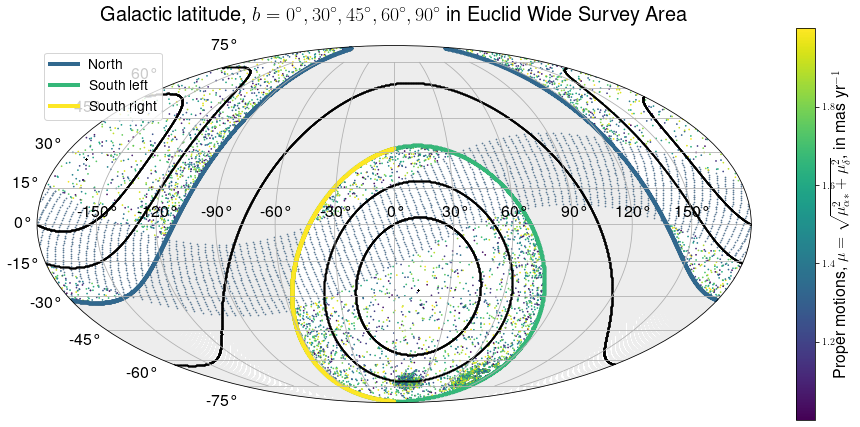

In [30]:
# Loading data to indicate location of sources in the Euclid Wide Survey 
pm_table12 = pd.read_csv("../../data/gaia/allpatch/pm_patch/gaia_euclid_allpatch_pm_001.0-2.0.csv", sep=',', usecols=['ra', 'dec', 'pmra', 'pmdec'])
pm_table = pm_table12.sample(n=10000)

check_column(pm_table)

# Setting up the plot structure
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection="mollweide")
ax.set_title(r'Galactic latitude, $b= 0^\circ, 30^\circ, 45^\circ, 60^\circ, 90^\circ$ in Euclid Wide Survey Area', fontsize=20, y=1.05)
ax.tick_params(labelsize=16)
               
# Filled areas to show galactic exclusion zone
plt.subplot(ax)
for gal_b in np.linspace(0, 30, 30):
    ra, dec = galB2radec(B = float(gal_b))
    plt.scatter(ra.radian, dec.radian, s=0.5, c=silver, rasterized=True)   
    ra, dec = galB2radec(B = -1* float(gal_b))
    plt.scatter(ra.radian, dec.radian, s=0.5, c=silver, rasterized=True)

# Filled areas to show ecliptic exclusion zone
plt.subplot(ax)
for ecl_beta in np.linspace(0, 15, 15):
    ra, dec = eclB2radec(beta = float(ecl_beta))
    plt.scatter(ra.radian, dec.radian, s=0.5, c=grey_blue, rasterized=True)   
    ra, dec = eclB2radec(beta = -1* float(ecl_beta))
    plt.scatter(ra.radian, dec.radian, s=0.5, c=grey_blue, rasterized=True)

# Plotting sources in the Euclid Wide Field Area [sources selected by having proper motions of 1< mu <2]
ra = coord.Angle(pm_table['ra']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(pm_table['dec']*u.degree)

plt.scatter(ra.radian, dec.radian, c=pm_table['mu'], s=0.5, rasterized=True)   
cbar = plt.colorbar(shrink=0.6)
cbar.set_label(r"Proper motions, $\mu = \sqrt{\mu_{\alpha \ast}^2 + \mu_{\delta}^2}$, in mas yr$^{-1}$", fontsize=16, labelpad=-1)

slices = [0.0, 30.0, 45.0, 60.0, 90.0]

viridis = plt.get_cmap('viridis')
cNorm = colors.Normalize(vmin=0, vmax=len(range(5)) - 1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=viridis)

for idx_g, gal_b in enumerate(slices):
    colorVal = scalarMap.to_rgba(idx_g)
    ra, dec = galB2radec(float(gal_b))
    ax.scatter(ra.radian, dec.radian, s=0.05, c='#000000', rasterized=True)   
    ra, dec = galB2radec(-1* float(gal_b))
    ax.scatter(ra.radian, dec.radian, s=0.05, c='#000000', rasterized=True) 
    
# Plotting the boarders for Eudlid areas as specified in other plot 
gal_l_n = np.linspace(-180, 180, 10000)
gal_l_sl = np.linspace(-180, 180, 10000/2)
gal_l_sr = np.linspace(-56.175, 110, 10000/2)

coords_n = SkyCoord(l=gal_l_n*u.deg, b=30*u.deg, frame='galactic')
coords_sl = SkyCoord(l=gal_l_sl*u.deg, b=-30*u.deg, frame='galactic')
coords_sr = SkyCoord(l=gal_l_sr*u.deg, b=-30*u.deg, frame='galactic')
icrs_coords_n = coords_n.icrs; icrs_coords_sl = coords_sl.icrs; icrs_coords_sr = coords_sr.icrs

clr = [blue, green, yellow]
for idx_area, area in enumerate([icrs_coords_n, icrs_coords_sl, icrs_coords_sr]):
    ra = coord.Angle(area.ra)
    ra = ra.wrap_at(180*u.degree)
    dec = coord.Angle(area.dec)
    ax.scatter(ra.radian, dec.radian, s=5, c= clr[idx_area])

north = Line2D(range(10), range(10), linestyle='-', linewidth = 4, c= blue)
southleft = Line2D(range(10), range(10), linestyle='-', linewidth = 4, c= green)
southright = Line2D(range(10), range(10), linestyle='-', linewidth = 4, c= yellow)

# Plotting legend to show the boarders for Eudlid areas
plt.legend((north, southleft, southright), ('North ', 'South left ', 'South right '), fontsize=14)
    
# Plotting grid, show plot and save it
ax.grid(True)
plt.savefig("./plots/thesis_EuclidSky_overview_galacticlat.pdf", bbox_inches='tight', pad_inches=0)
plt.show()

<center><i><b>Figure 5:</b> The Euclid Wide Survey indicating the exclusion zones or both the ecliptic (striped) and galactic (<font color="#ededed"><b>grey</b></font>) plane. The colored lines indicate the areas as defined in Figure 2, being <font color="#31688e"> <b>Euclid North</b></font>, <font color="#35b779"> <b>Euclid South Left</b></font> and <font color="#fde725"> <b>Euclid South Right</b></font>. The dots indicate sources with a proper motion of $1 < \mu< 2$ mas yr$^{-1}$. </i></center>


Gaia DR2 provides us with an value for $b$ and $l$ for every source. This makes the slicing of the data easy. The areas are defined as: $0^\circ < |b| < 30^\circ$, $30^\circ < |b| < 45^\circ$, $45^\circ < |b| < 60^\circ$, $60^\circ < |b| < 90^\circ$. For each area a series of histograms, like in Figure [3](#f2.3), is produced. The result is shown in Figure [6](#f2.6). 

<a id = "f2.6" LOC></a>

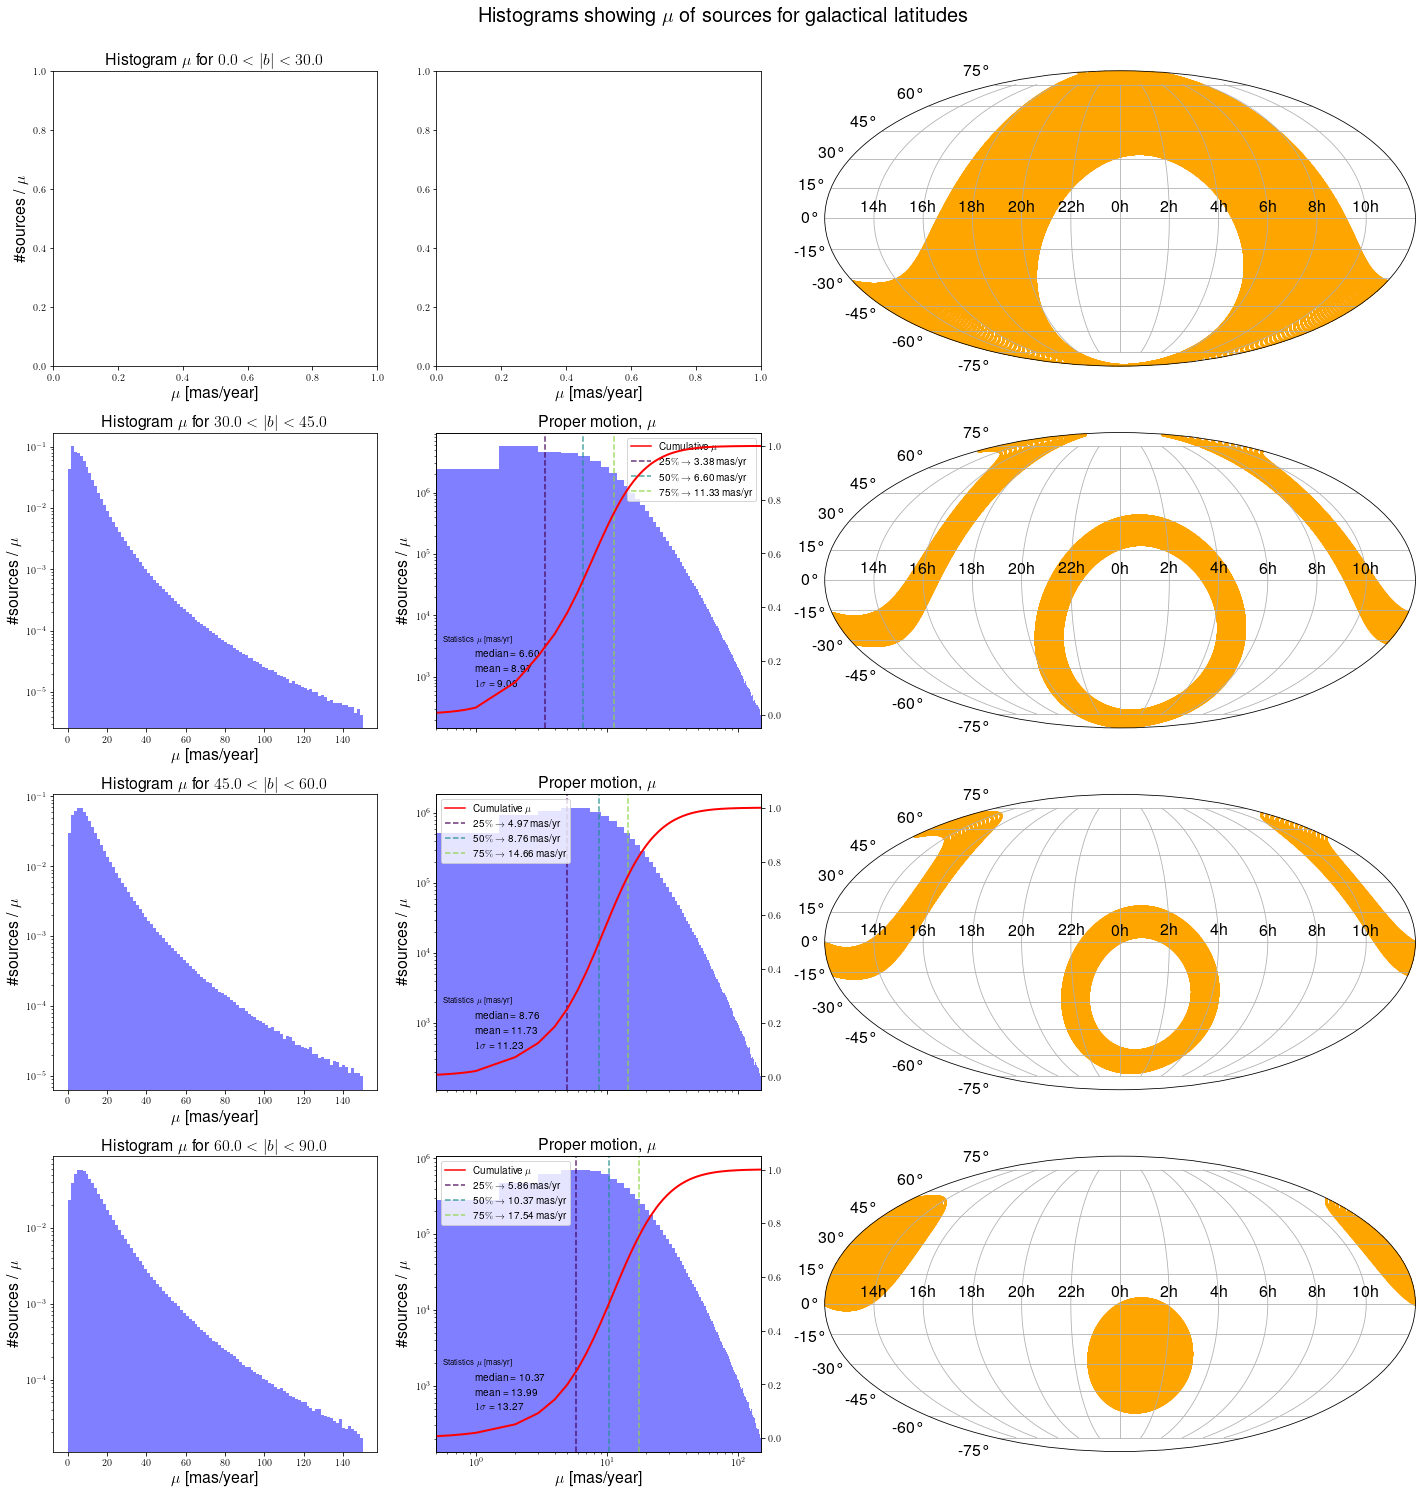

In [18]:
def SourcesEuclidSky_PM_galacticlatitude(pm_table, b=100, a=0.5, B='abs', cum='auto', title = '', info='NoINFO', vel_filter=150.0, log=False, norm=None):
    
    log_option = check_input(log, [False, True])
    norm_option = check_input(norm, [None, True])
    
    if B =='abs':
         slice_option = [0.0, 30.0, 45.0, 60.0, 90.0]
    else: 
         slice_option = [-90.0, -60.0, -45.0, -30.0, 0.0, 30.0, 45.0, 60.0, 90.0]
    fig_rows = len(slice_option) -1
    fig_height = fig_rows*5
        
    fig = plt.figure(figsize=(20, fig_height), constrained_layout=True)
    fig.suptitle('Histograms {}'.format(title), y=1.03, fontsize=20)
    
    gs = GridSpec(ncols=4, nrows = fig_rows, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2:], projection="mollweide")
    ax4 = fig.add_subplot(gs[1, 0])
    ax5 = fig.add_subplot(gs[1, 1])
    ax6 = fig.add_subplot(gs[1, 2:], projection="mollweide")
    ax7 = fig.add_subplot(gs[2, 0])
    ax8 = fig.add_subplot(gs[2, 1])
    ax9 = fig.add_subplot(gs[2, 2:], projection="mollweide")
    ax10 = fig.add_subplot(gs[3, 0])
    ax11 = fig.add_subplot(gs[3, 1])
    ax12 = fig.add_subplot(gs[3, 2:], projection="mollweide")
    
    if B =='abs':
        axes = [[ax1, ax2, ax3], [ax4, ax5, ax6], [ax7, ax8, ax9], [ax10, ax11, ax12]]
    else: 
        ax13 = fig.add_subplot(gs[4, 0])
        ax14 = fig.add_subplot(gs[4, 1])
        ax15 = fig.add_subplot(gs[4, 2:], projection="mollweide")
        ax16 = fig.add_subplot(gs[5, 0])
        ax17 = fig.add_subplot(gs[5, 1])
        ax18 = fig.add_subplot(gs[5, 2:], projection="mollweide")
        ax19 = fig.add_subplot(gs[6, 0])
        ax20 = fig.add_subplot(gs[6, 1])
        ax21 = fig.add_subplot(gs[6, 2:], projection="mollweide")
        ax22 = fig.add_subplot(gs[7, 0])
        ax23 = fig.add_subplot(gs[7, 1])
        ax24 = fig.add_subplot(gs[7, 2:], projection="mollweide")
        axes = [[ax1, ax2, ax3], [ax4, ax5, ax6], [ax7, ax8, ax9], [ax10, ax11, ax12], [ax13, ax14, ax15], [ax16, ax17, ax18], [ax19, ax20, ax21], [ax22, ax23, ax24]]
    
    check_column(pm_table)
    
    # Neglecting the high velocity sources a cumulative frequency histogram
    tb_dirfilter = pm_table[pm_table['mu']<vel_filter]

    # plot for every subplot seperately for every column per row
    for idx_row, row in enumerate(axes):
        for idx_ax, ax in enumerate(row):
            
            if B == 'abs':
                tb_gallat = tb_dirfilter[(abs(tb_dirfilter['b']) > float(slice_option[idx_row])) & (abs(tb_dirfilter['b']) < float(slice_option[idx_row+1]))] 

            else: 
                tb_gallat = tb_dirfilter[(tb_dirfilter['b'] > float(slice_option[idx_row])) & (tb_dirfilter['b'] < float(slice_option[idx_row+1]))] 
            
            if idx_ax == 0:
                if len (tb_gallat['mu']) ==0:
                    pass
                else:                 
                    hist1 = tb_gallat['mu'].plot.hist(bins=b, alpha=a, ax=ax, density=norm_option, log=log_option, facecolor='b')  
                ax.set_title("Histogram $\mu$ for ${} < |b| < {}$".format(slice_option[idx_row], slice_option[idx_row+1]), fontsize=16)
                ax.xaxis.set_label_text(r"$\mu$ [mas/year]", fontsize=16)
                ax.yaxis.set_label_text(r"\#sources / $\mu$", fontsize=16)
                
            elif idx_ax == 1:
                if len (tb_gallat['mu']) ==0:
                    pass
                else:  
                    # HISTOGRAM FOR PROPER MOTION 'mu'    
                    data_dist = tb_gallat['mu']    

                    ax.set_title(r"Proper motion, $\mu$", fontsize=16)
                    hist = data_dist[data_dist<150.0].plot.hist(bins=b, alpha=a, ax=ax, density=False, facecolor='b', log=True, label="Histogram",) 
                    ax.xaxis.set_label_text(r"$\mu$ [mas/year]", fontsize=16)
                    ax.yaxis.set_label_text(r"\#sources / $\mu$", fontsize=16)
                    ax.set_xscale('log')
                    ax.set_xlim( left=0.5, right = 150)
                    ax.set_ylim( bottom=0)

                    distCount, distMean, distStd, distMn, dist25, dist50, dist75, distMx = data_dist.describe() 
                    # print(len(data_dist[data_dist<dist25])/len(data_dist)) # shows that 25% of the sources has a proper motion of less than 3.25.
                    ax.axvline(x=dist25, linestyle='dashed', alpha=0.8, color='#440154', zorder=1, label = '25$\%$ = {0:.2f}'.format(dist25))
                    ax.axvline(x=dist50, linestyle='dashed', alpha=0.8, color='#21908d', zorder=1, label = '50$\%$ = {0:.2f}'.format(dist50))
                    ax.axvline(x=dist75, linestyle='dashed', alpha=0.8, color='#8ed645', zorder=1, label = '75$\%$ = {0:.2f}'.format(dist75))

                    # PLOT STATISTICS PMdist
                    ax.text(0.02, 0.30, 'Statistics $\mu$ [mas/yr]', fontsize=8, va='center', ha='left', color='#000000', transform=ax.transAxes,)# backgroundcolor='w',)
                    # plot median value of pmdist in the histogram
                    ax.text(0.12, 0.25, 'median = {0:.2f}'.format(data_dist.median()), fontsize=10, va='center', ha='left', color='#000000', transform=ax.transAxes,)# backgroundcolor='w',)
                    # plot mean value of pmdist in the histogram
                    ax.text(0.12, 0.20, 'mean = {0:.2f}'.format(distMean), fontsize=10, va='center', ha='left', color='#000000', transform=ax.transAxes,)# backgroundcolor='w',)
                    # plot std value of pmdist in the histogram
                    ax.text(0.12, 0.15, '$1\sigma$ = {0:.2f}'.format(distStd), fontsize=10, va='center', ha='left', color='#000000', transform=ax.transAxes,)# backgroundcolor='w',)

                    # CUMULATIVE DISTRIBUTION FOR PROPER MOTION IN (DEC^2+RA^2)^(1/2)
                    ax1 = ax.twinx()  # instantiate a second axes that shares the same x-axis      
                    pm_xrange = list(np.linspace(0.1, 1.0, num=10, endpoint=False))
                    pm_xrange.extend(list(np.arange(int(vel_filter))[1:]))
                    ax1.plot(pm_xrange, [len(data_dist[data_dist<i])/len(data_dist) for i in pm_xrange], '-r', linewidth=2, label = r'Cumulative $\mu$')

                    # ADD COSTOM LEGEND TO THE PLOT
                    legend_elements = [Line2D([0], [0], color='r', label=r'Cumulative $\mu$'),
                                      Line2D([0], [0], linestyle='dashed', alpha=0.8, color='#440154', label = '25$\% \\rightarrow$ {0:.2f} mas/yr'.format(dist25)),
                                      Line2D([0], [0], linestyle='dashed', alpha=0.8, color='#21908d', label = '50$\% \\rightarrow$ {0:.2f} mas/yr'.format(dist50)),
                                      Line2D([0], [0], linestyle='dashed', alpha=0.8, color='#8ed645', label = '75$\% \\rightarrow$ {0:.2f} mas/yr'.format(dist75))]
                    ax.legend(handles = legend_elements )

                ax.xaxis.set_label_text(r"$\mu$ [mas/year]", fontsize=16)

            elif idx_ax == 2:
                plt.subplot(ax)
            
                ax.tick_params(labelsize=16)
                ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])

                plt.subplot(ax)
                for gal_b in np.linspace(slice_option[idx_row], slice_option[idx_row+1], slice_option[idx_row+1]-slice_option[idx_row]):
                    ra, dec = galB2radec(B = float(gal_b))
                    plt.scatter(ra.radian, dec.radian, s=0.5, c='orange', rasterized=True)   
                    
                if B == 'abs':
                    for gal_b in np.linspace(slice_option[idx_row], slice_option[idx_row+1], slice_option[idx_row+1]-slice_option[idx_row]):
                        ra, dec = galB2radec(B = -1* float(gal_b))
                        plt.scatter(ra.radian, dec.radian, s=0.5, c='orange', rasterized=True)
                else:
                    pass

                ax.grid(True)
    plt.show()
    return None

SourcesEuclidSky_PM_galacticlatitude(EUCLID_table_valid, b=100, a=0.5, B='abs', cum='auto', title=r'showing $\mu$ of sources for galactical latitudes', info='EUDLIDlogTruenormTrue', vel_filter=150.0, log=True, norm=True)


<center><i><b>Figure 6:</b> *Histograms showing the $\mu$ distribution of sources in the areas: $0^\circ < |b| < 30^\circ$, $30^\circ < |b| < 45^\circ$, $45^\circ < |b| < 60^\circ$, $60^\circ < |b| < 90^\circ$ from the top to the bottom plot. 61617 (0.09%) sources have been filtered out due to velocities higher than 150.0 mas yr$^{-1}$ </i></center>  

> Looking at Figure [6](#f2.6), one immediately sees that the upper plot does not contain any sources. This indicates that  for $0^\circ < |b| < 30^\circ$ we do not find any sources in the Euclid Wide Survey. Since our Gaia query selectsed the area based on the boundery $|b| < 30^\circ$, this result is we would have expected. 

On the left hand side of Figure [6](#f2.6) we find histograms revealing the number of sources per proper motion. The four rows are showing selections of sources based on galactical latitude. For the last three rows, that do contain sources, the histograms all reveal a maximum in the range of $< 10$ mas yr$^{-1}$. Inspecting the second row of plots, we find an extra peak at $\sim 2$ mas yr$^{-1}$. This indicates that for this selection of galactic latitude, there are more sources that all move with a proper motion of $\sim 2$ mas yr$^{-1}$. Recall that this row shows the data of the sources coming from the area covering $30^\circ < |b| < 45^\circ$. This group of sources moving with the same speed could be an interesting astronomical feature, an feature from Gaia DR2, or some criteria we forgot to take into account when defining the Euclid Wide Survey. 


<br>

[Go back to list of contents](#LOC)

***
<br>

## Calculating the area [deg$^2$] covered in latitude ranges

Since the patches at the higher absolute galactic latitudes are smaller, they should contain less sources. It would be more interesting to find out how many sources we can find per squared degrees.
Unfortunately, the patches do not fit in a standard shape, see Figure [2](#f2.2), which ubligates us to use a non standard area calculation. We opt for a Monte Carlo method.

Using the Monte Carlo method we produce an dummy source on every squared degree in the entire sky. The method determined whether the source lies within or outside the boarders of each latitude range. 

The values are stored in a Python Pandas table whose atttributes can be defined by:

|Pandas dtype |	Python type	|NumPy type	|Usage|
|:----------|:----------|:----------|:----------|
|object	|str or mixed	|string_, unicode_, mixed types	|Text or mixed numeric and non-numeric values|
|int64	|int	|int_, int8, int16, int32, int64, uint8, uint16, uint32, uint64	|Integer numbers|
|float64|	float	|float_, float16, float32, float64	|Floating point numbers|
|bool	|bool	|bool_	|True/False values|

<center> <i><b>Table 2:</b>  Discription of Pandas dtypes as Python and NumPy types together with its usage.   
 <a href="https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-dtypes">Pandas Documentation on Data types</a> </i></center> 




We first start with some <b>wrong calculations</b>. This example will illustrate what happens if you treat the sky like a flat plane and randomly generate positions on a flat area. As you can imagine, turning the area with evenly distributed sources into a sphere, you would find an overpopulation at the poles. By generating RA and DEC as equal ranges from 0-360 and |0-180| we find the following areas:


| Galactic latitude | -90$^\circ$ < b < -60$^\circ$ | -60$^\circ$ < b < -45$^\circ$ | -45$^\circ$ < b < -30$^\circ$ | -30$^\circ$ < b < 0$^\circ$ | 0$^\circ$ < b < 30$^\circ$ | 30$^\circ$ < b < 45$^\circ$ | 45$^\circ$ < b < 60$^\circ$ | 60$^\circ$ < b < 90$^\circ$ |
|:-----------:|:------------:|:------------:|:------------:|:------------:|:------------:|:------------:|:-----------:|:------------:|
| # dummy sources |  4657 |  6504 | 10091 | 24997 | 22618 | 10660 |  5733 |  4740 |  
 |    ratio     | 0.05 | 0.07 | 0.11 | 0.28 | 0.25 | 0.12 | 0.06 | 0.05 | 
 
 <center> <i><b>Table 3a:</b> Final distribution of 90000 random generated dummy sources over the entire sky without taking care of the 'overdistribution' in the poles. The sources are subdivided into sky patches based on their galactic latitude. </i></center> 
 
| Galactic latitude | -90$^\circ$ < b < -60$^\circ$ | -60$^\circ$ < b < -45$^\circ$ | -45$^\circ$ < b < -30$^\circ$ | -30$^\circ$ < b < 0$^\circ$ | 0$^\circ$ < b < 30$^\circ$ | 30$^\circ$ < b < 45$^\circ$ | 45$^\circ$ < b < 60$^\circ$ | 60$^\circ$ < b < 90$^\circ$ |
|:-----------:|:------------:|:------------:|:------------:|:------------:|:------------:|:------------:|:-----------:|:------------:|
| # dummy sources |  3332 |  3102 |  6591 | 21685 | 22618 |  9129 |  4811 |  3590 |  
 |    ratio     | 0.04 | 0.03 | 0.07 | 0.24 | 0.25 | 0.10 | 0.05 | 0.04 | 
 
 <center> <i><b>Table 3b:</b> Final distribution of 90000 random generated dummy sources, while taking into account and ecliptic exclusion zone of $|\beta|<15^\circ$, without taking care of the 'overdistribution' in the poles. Due to this ecliptic exclusion zone 14999 sources were excluded in the table. </i></center> 
 


<b>How to solve for a non-plate sphere?</b>  Solving the problem of distributing point on a sphere is known in Nature. In Physics it relates to problems like the as e.g. the [Thompson problem](https://arxiv.org/abs/1810.03230) or to the [Tammes problem](https://arxiv.org/abs/1509.01768) in the field of Mathematics. We attack the problem by generating the dummy sources not by random values between 0 and 360 degrees but generating the RA and DEC values in radians and transforming them to degrees:

$$ \texttt{RA} = 2\pi (n_{ra} - 0.5) $$
$$ \texttt{DEC} = arcsin(2 (n_{dec} - 0.5)) $$

where $n_{ra}$ and $n_{dec}$ are random foating numbers between 0 and 1. To obtain the values in degrees we simply multiply the values for $\texttt{RA}$ and $\texttt{DEC}$ with (180/$\pi$). Our values for RA range from [-180.0;180.0]. To correct for this range we simply add 180 to each value, resulting in a reange [0.0;360.0].
The result is shown in the Figure below.


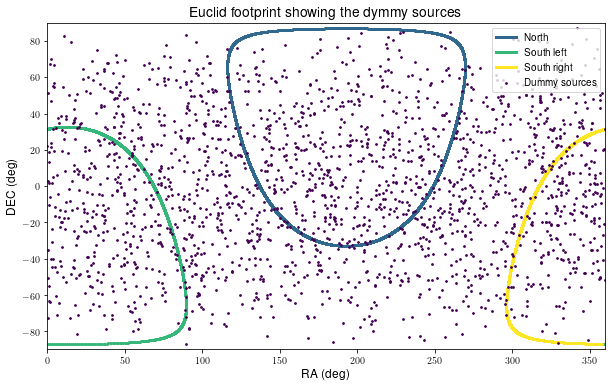

In [46]:
def fill_entire_skyRandom_gal_ecl(n=10000):
    # generate values between 0 and 1 for convertion to random radians
    ra, dec = np.random.random(2*n).reshape(2, -1)

    # use the random numbers range [0.0;1.0] to determine random radians
    Random_ra_rad = (2*np.pi) * (ra - 0.5)
    Random_dec_rad = np.arcsin(2.*(dec-0.5)) 

    # transform radians to degree
    to_deg = 180/np.pi
    skyRandom_ra = (Random_ra_rad*to_deg)+180
    skyRandom_dec = Random_dec_rad*to_deg
    
    return skyRandom_ra, skyRandom_dec

"""Plotting of the Euclid Sky Footprint with generated dummy sources."""    
    
gal_l_n = np.linspace(-180, 180, 10000)
gal_l_sl = np.linspace(-180, 180, 10000/2)
gal_l_sr = np.linspace(-56.175, 110, 10000/2)

coords_n = SkyCoord(l=gal_l_n*u.deg, b=30*u.deg, frame='galactic')
coords_sl = SkyCoord(l=gal_l_sl*u.deg, b=-30*u.deg, frame='galactic')
coords_sr = SkyCoord(l=gal_l_sr*u.deg, b=-30*u.deg, frame='galactic')
icrs_coords_n = coords_n.icrs; icrs_coords_sl = coords_sl.icrs; icrs_coords_sr = coords_sr.icrs
fig, frame = plt.subplots(1,1, figsize=(10, 6))
     
        
# Obtaining ra, dec coordinates for predefined patchen on the sky that cover the Euclid footprint       
euclid_patch_ = EuclidSky() # north_patch_ra, north_patch_dec, south_patch_ra, south_patch_dec
euclid_patch_north = euclid_patch_.north_patch_ra(), euclid_patch_.north_patch_dec()
euclid_patch_south = euclid_patch_.south_patch_right_ra(), euclid_patch_.south_patch_left_ra(), euclid_patch_.south_patch_dec()

frame.scatter(icrs_coords_n.ra, icrs_coords_n.dec, s=4, c= blue)
north = Line2D(range(10), range(10), linestyle='-', linewidth = 3, c= blue)
frame.scatter(icrs_coords_sl.ra, icrs_coords_sl.dec, s=4, c= green)
southleft = Line2D(range(10), range(10), linestyle='-', linewidth = 3, c= green)
frame.scatter(icrs_coords_sr.ra, icrs_coords_sr.dec, s=4, c= yellow)
southright = Line2D(range(10), range(10), linestyle='-', linewidth = 3, c= yellow)

# Plotting Dummy sources
skyRandom_ra, skyRandom_dec = fill_entire_skyRandom_gal_ecl(n=2000)
frame.scatter(skyRandom_ra, skyRandom_dec, s=3, c= purple)
patch = frame.scatter(euclid_patch_south[1][-1], euclid_patch_south[2][0], s=3, c= purple, )

# Plotting legend
plt.legend((north, southleft, southright, patch), ('North ', 'South left ', 'South right ', 'Dummy sources'))
    
frame.set_title('Euclid footprint showing the dymmy sources', fontsize=14)      
frame.xaxis.set_label_text("RA (deg)", fontsize=12)
frame.set_xlim(0,360)
frame.yaxis.set_label_text("DEC (deg)", fontsize=12)
frame.set_ylim(-90,90)

ax.grid(True)
plt.show()

| Galactic latitude | -90$^\circ$ < b < -60$^\circ$ | -60$^\circ$ < b < -45$^\circ$ | -45$^\circ$ < b < -30$^\circ$ | -30$^\circ$ < b < 0$^\circ$ | 0$^\circ$ < b < 30$^\circ$ | 30$^\circ$ < b < 45$^\circ$ | 45$^\circ$ < b < 60$^\circ$ | 60$^\circ$ < b < 90$^\circ$ |
|:-----------:|:------------:|:------------:|:------------:|:------------:|:------------:|:------------:|:-----------:|:------------:|
| # dummy sources |  5861 |  6109 |  8854 | 20072 | 21973 | 10744 |  9299 |  7088 |  
 |    ratio     | 0.07 | 0.07 | 0.10 | 0.22 | 0.24 | 0.12 | 0.10 | 0.08 | 
 
 <center> <i><b>Table 4a:</b> Final distribution of 90000 random generated dummy sources over the entire sky with taking care of the 'overdistribution' in the poles. The sources are subdivided into sky patches based on their galactic latitude. </i></center> 
 
| Galactic latitude | -90$^\circ$ < b < -60$^\circ$ | -60$^\circ$ < b < -45$^\circ$ | -45$^\circ$ < b < -30$^\circ$ | -30$^\circ$ < b < 0$^\circ$ | 0$^\circ$ < b < 30$^\circ$ | 30$^\circ$ < b < 45$^\circ$ | 45$^\circ$ < b < 60$^\circ$ | 60$^\circ$ < b < 90$^\circ$ |
|:-----------:|:------------:|:------------:|:------------:|:------------:|:------------:|:------------:|:-----------:|:------------:|
| # dummy sources |  4204 |  3602 |  5814 | 16429 | 21973 |  8435 |  4265 |  5136 |  
 |    ratio     | 0.05 | 0.04 | 0.06 | 0.18 | 0.24 | 0.09 | 0.05 | 0.06 | 
 
 <center> <i><b>Table 4b:</b> Final distribution of 90000 random generated dummy sources, while taking into account and ecliptic exclusion zone of $|\beta|<15^\circ$, with taking care of the 'overdistribution' in the poles. Due to this ecliptic exclusion zone 21102 sources were excluded in the table. </i></center> 
 


In [13]:

# ------------------------------------------  WITHOUT ECLIPTIC EXCLUSION ---------------------------------------------

slice_options = [-90.0, -60.0, -45.0, -30.0, 0.0, 30.0, 45.0, 60.0, 90.0]

arr_area = np.array(slice_options)

# (1) Generating n_sample^2 random dummy sources using EuclidSky()
E = EuclidSky()
C_gal, C_ecl = E.fill_entire_skyRandom_gal_ecl(300)

areas = [[], [], [], [], [], [], [], []]

# (2) Counting the number of dummy sources that lie inside the different irregular shapes
for idx_dummy, dummy in enumerate(C_gal.flatten()):
    b_coord, l_coord = dummy.b.deg, dummy.l.deg # Find galactic lat & long: b, l = Skycoord.b.deg, Skycoord.l.deg
    find_area = np.argwhere([arr_area <= b_coord][0] == True)
    idx_area = np.max(find_area)
    areas[idx_area].append(dummy)


# (3) Calculating the proportionality [sources in patch]/[total generated sources]
sources = [float(len(areas[i])) for i in range(len(slice_options)-1)] # number of sources in patch
percentage = [i / (float(len(C_gal))**2) for i in sources] # [sources in patch]/[total sources]   
    
print_table = "yes"

header = "| {:^12s} | {:^12s} | {:^12s} | {:^12s} | {:^12s} | {:^12s} | {:^12s} | {:^12s} | {:^12s} |".format("Galactic latitude", '-90$^\circ$ < b < -60$^\circ$', '-60$^\circ$ < b < -45$^\circ$', '-45$^\circ$ < b < -30$^\circ$', '-30$^\circ$ < b < 0$^\circ$', '0$^\circ$ < b < 30$^\circ$', '30$^\circ$ < b < 45$^\circ$', '45$^\circ$ < b < 60$^\circ$', '60$^\circ$ < b < 90$^\circ$')
if print_table == "yes":
    print(header)
    print("|:-----------:|:------------:|:------------:|:------------:|:------------:|:------------:|:------------:|:-----------:|:------------:|")
    s_perarea = "| {:^12s} | {:5.0f} | {:5.0f} | {:5.0f} | {:5.0f} | {:5.0f} | {:5.0f} | {:5.0f} | {:5.0f} | ".format("# dummy sources", sources[0], sources[1], sources[2], sources[3], sources[4], sources[5], sources[6], sources[7])
    s_percentage = "| {:^12s} | {:0.2f} | {:0.2f} | {:0.2f} | {:0.2f} | {:0.2f} | {:0.2f} | {:0.2f} | {:0.2f} | ".format("ratio", percentage[0], percentage[1], percentage[2], percentage[3], percentage[4], percentage[5], percentage[6], percentage[7])
    print(s_perarea, '\n', s_percentage)

    
# ------------------------------------------  WITH ECLIPTIC EXCLUSION ---------------------------------------------
    
    
slice_options = [-90.0, -60.0, -45.0, -30.0, 0.0, 30.0, 45.0, 60.0, 90.0]

arr_area = np.array(slice_options)

# (1) Generating n_sample^2 random dummy sources using EuclidSky()
E = EuclidSky()
C_gal, C_ecl = E.fill_entire_skyRandom_gal_ecl(300)

areas2 = [[], [], [], [], [], [], [], []]

ecliptic_exclusion = 0

# (2) Counting the number of dummy sources that lie inside the different irregular shapes
for idx_dummy, dummy in enumerate(C_gal.flatten()):
    b_coord, l_coord = dummy.b.deg, dummy.l.deg # Find galactic lat & long: b, l = Skycoord.b.deg, Skycoord.l.deg
    beta_coord = C_ecl.flatten()[idx_dummy].lat.deg # Find ecliptic latitude for the dummy: beta = Skycoord.lat.deg
    if abs(beta_coord) > 15.0:
        # |beta| > 15.0: we find the galactic lat to look to its boarders
        find_area = np.argwhere([arr_area <= b_coord][0] == True)
        idx_area = np.max(find_area)
        areas2[idx_area].append(dummy)
    else:
        # |beta| < 15.0: we only count the number of dummies, since it lies in the ecliptic exclusion zone
        ecliptic_exclusion += 1

# (3) Calculating the proportionality [sources in patch]/[total generated sources]
sources2 = [float(len(areas2[i])) for i in range(len(slice_options)-1)] # number of sources in patch
percentage2 = [i / (float(len(C_gal))**2) for i in sources2] # [sources in patch]/[total sources]   
    
print_table = "yes"

header = "| {:^12s} | {:^12s} | {:^12s} | {:^12s} | {:^12s} | {:^12s} | {:^12s} | {:^12s} | {:^12s} |".format("Galactic latitude", '-90$^\circ$ < b < -60$^\circ$', '-60$^\circ$ < b < -45$^\circ$', '-45$^\circ$ < b < -30$^\circ$', '-30$^\circ$ < b < 0$^\circ$', '0$^\circ$ < b < 30$^\circ$', '30$^\circ$ < b < 45$^\circ$', '45$^\circ$ < b < 60$^\circ$', '60$^\circ$ < b < 90$^\circ$')
if print_table == "yes":
    print(header)
    print("|:-----------:|:------------:|:------------:|:------------:|:------------:|:------------:|:------------:|:-----------:|:------------:|")
    s_perarea = "| {:^12s} | {:5.0f} | {:5.0f} | {:5.0f} | {:5.0f} | {:5.0f} | {:5.0f} | {:5.0f} | {:5.0f} | ".format("# dummy sources", sources2[0], sources2[1], sources2[2], sources2[3], sources[4], sources2[5], sources2[6], sources2[7])
    s_percentage = "| {:^12s} | {:0.2f} | {:0.2f} | {:0.2f} | {:0.2f} | {:0.2f} | {:0.2f} | {:0.2f} | {:0.2f} | ".format("ratio", percentage2[0], percentage2[1], percentage2[2], percentage2[3], percentage[4], percentage2[5], percentage2[6], percentage2[7])
    print(s_perarea, '\n', s_percentage)

print("{} sources were excluded by ecliptic exclusion zone".format(ecliptic_exclusion))

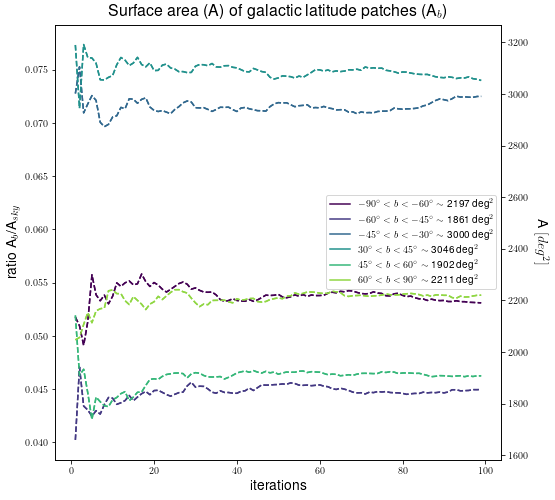

In [5]:
# ------------------ Visualise calculation of areas by MC ---------------------
def plot_surfacearea_latitude(table, slice_option = 'b_excl', n_sample = 250, get_sigmas = 'no'):
    ''' Visualisation for the Monte Carlo method used to obtain the surface areas between the lines dividing galactic
    latitudes. It calculates the area in squared degrees, by taking the proportions obtained by '_use_pandas()' and
    divide it by the surface area of the entire sky. By repeating the latter, we call it an Monte Carlo method since
    more iterations will eventually lead to an accurate estimation of the 'real surface area'. Each time we calculate
    the average of the previous iterations together with the new one. The function returns a plot showing an estimate
    for the surface areas in units of degrees.

    (1) Retrieving iteration information from table
    (2) Calculating and plot the means of the ratio [sources in patch]/[total generated sources] for each single patch
    (3) Calculating and plot the surface area determined by multiplying ratio with total sky area for single patches
    (4) Saving, showing and closing a figure showing the surface area
    (5) [optional] Returning deviation [sigmas] in sources per iteration giving sigma for surface area calculation

        Parameters
        ----------
        table: pandas.DataFrame
            Data Frame obtained by use of _use_pandas()

        slice_option: str [Default = 'b_excl']
            Either 'b_excl', or 'b_incl', for excluding or including the galactic exclusion area |b| < 30

        n_sample : int [Default = 250]
            The number of random dummy sources you want to create [CAUTION: it will be n_sample^2]

        get_sigmas : str [Default = 'no']
            Option to obtain list of length [iterations] showing sigma for our calculation of the surface area


        Returns
        -------
        sigmas [optional]
            List of deviation in sources per iteration giving sigma for our calculation of the surface area

        MC_excl_i{iterations}n{n_sample}.pdf:
            Plot stored as a .pdf file which is stored in the directory "plots"

    ------------------------------- User example --------------------------------
    ###### Using plot_surfacearea_latitude() to create plot showing areas #######

        sigmas = plot_surfacearea_latitude(table, n_sample = 250)

    '''
    # predefined column names that we are using in our analysis
    if slice_option == 'b_excl':
        perc = ['P_9060', 'P_6045', 'P_4530', 'P_3045', 'P_4560', 'P_6090']  # obtaining data for all b patches excluding the galactic plane area, like Euclid
        slices = ['$-90^{\circ} < b < -60^{\circ}$', '$-60^{\circ} < b <-45^{\circ}$',
                  '$-45^{\circ} < b < -30^{\circ}$', '   $30^{\circ} < b <$  $45^{\circ}$',
                  '   $45^{\circ} < b <$  $60^{\circ}$', '   $60^{\circ} < b <$  $90^{\circ}$']  # set to perc_all if plot should contain 0 < |b| < 30
    else:
        perc = ['P_9060', 'P_6045', 'P_4530', 'P_3000', 'P_0030', 'P_3045', 'P_4560', 'P_6090'] # obtaining data for all b patches from table
        slices = ['$-90^{\circ} < b < -60^{\circ}$', '$-60^{\circ} < b < -45^{\circ}$','$-45^{\circ} < b < -30^{\circ}$',
                      '$-30^{\circ} < b < 0^{\circ}$','$0^{\circ} < b < 30^{\circ}$', '$30^{\circ} < b < 45^{\circ}$',
                      '$45^{\circ} < b < 60^{\circ}$','$60^{\circ} < b < 90^{\circ}$'] # set to slices_all if plot should contain 0 < |b| < 30
    
    # (1) Retrieving iteration information from table
    iterations = len(table['idx']) # counting the amount of iterations that were used to create this table

    # setting up the colors used in the plot. Each area will have its own color, given by the colormap 'viridis'
    viridis = plt.get_cmap('viridis')
    cNorm = colors.Normalize(vmin=0, vmax=len(perc))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=viridis)
    colorVal = [scalarMap.to_rgba(idx_color) for idx_color in range(iterations)]

    # calculating the surface area of the entire sky, needed to obtain the surface area per patch
    A_hemisphere = (2/np.pi) * 360 * 90
    A_sky = 2 * A_hemisphere

    # ------------------------------- Graph ----------------------------------
    # PLOT SHOWING THE SURFACE RATIO [PATCH/SKY] AS PATCHES ARE DEFINES BY LATITUDE COORDINATES IN slice_option

    # setting up the base of the figure using matplotlib
    fig, ax = plt.subplots(figsize=(8, 8), ncols= 1, nrows = 1)
    ax.set_title(r"Surface area (A) of galactic latitude patches (A$_b$) ", fontsize=16)
    ax.xaxis.set_label_text(r"iterations", fontsize=14)
    ax.yaxis.set_label_text(r"ratio A$_b$/A$_{sky}$", fontsize=14)

    # (2) Calculating and plot the means of the ratio [sources in patch]/[total generated sources] for single patches
    for idx_p, p in enumerate(perc):
        ratio = [table[p][:i].mean() for i in range(iterations)]
        ax.plot(range(iterations), ratio, color=colorVal[idx_p], linestyle='--', label="MC")

    # (3) Calculating and plot the surface area determined by multiplying ratio with total sky area for single patches
    ax1 = ax.twinx()  # instantiate a second axes that shares the same x-axis as the ratio plot
    sigmas = []
    for idx_p, p in enumerate(perc):
        A_patch = [(table[p][:i].mean()) * (A_sky) for i in range(iterations)]
        ax1.plot(range(iterations), A_patch, color=colorVal[idx_p], linestyle='--', label="MC")
        sigmas.append(np.std(np.array(A_patch)[~np.isnan(A_patch)])) # calculating 1 sigma uncertainty for A_b means
    ax1.yaxis.labelpad = 20
    ax1.set_ylabel(r"A $[deg^2]$", fontsize=14, rotation=270)

    # defining and adding a legend to help the reader understand the differences in areas per galactic latitude range
    if len(perc) == 8:
        legend_elements = [Line2D([0], [0], color=colorVal[0], label=slices[0]+r"   $\sim$ {0:4.0f} deg$^2$".format((table[perc[0]][:].mean())*(A_sky))),
                       Line2D([0], [0], color=colorVal[1], label=slices[1]+r"   $\sim$ {0:4.0f} deg$^2$".format((table[perc[1]][:].mean())*(A_sky))),
                       Line2D([0], [0], color=colorVal[2], label=slices[2]+r"   $\sim$ {0:4.0f} deg$^2$".format((table[perc[2]][:].mean())*(A_sky))),
                       Line2D([0], [0], color=colorVal[3], label=slices[3]+r"   $\sim$ {0:4.0f} deg$^2$".format((table[perc[3]][:].mean())*(A_sky))),
                       Line2D([0], [0], color=colorVal[4], label=slices[4]+r"   $\sim$ {0:4.0f} deg$^2$".format((table[perc[4]][:].mean())*(A_sky))),
                       Line2D([0], [0], color=colorVal[5], label=slices[5]+r"   $\sim$ {0:4.0f} deg$^2$".format((table[perc[5]][:].mean())*(A_sky))),
                       Line2D([0], [0], color=colorVal[6], label=slices[6] + r"   $\sim$ {0:4.0f} deg$^2$".format((table[perc[6]][:].mean()) * (A_sky))),
                       Line2D([0], [0], color=colorVal[7], label=slices[7] + r"   $\sim$ {0:4.0f} deg$^2$".format((table[perc[7]][:].mean()) * (A_sky))), ]
    else: # if  len(perc) != 8, it shoud be len(perc) == 6, as defined by slice_option
        legend_elements = [Line2D([0], [0], color=colorVal[0], label=slices[0] + r"   $\sim$ {0:4.0f} deg$^2$".format((table[perc[0]][:].mean()) * (A_sky))),
                           Line2D([0], [0], color=colorVal[1], label=slices[1] + r"   $\sim$ {0:4.0f} deg$^2$".format((table[perc[1]][:].mean()) * (A_sky))),
                           Line2D([0], [0], color=colorVal[2], label=slices[2] + r"   $\sim$ {0:4.0f} deg$^2$".format((table[perc[2]][:].mean()) * (A_sky))),
                           Line2D([0], [0], color=colorVal[3], label=slices[3] + r"   $\sim$ {0:4.0f} deg$^2$".format((table[perc[3]][:].mean()) * (A_sky))),
                           Line2D([0], [0], color=colorVal[4], label=slices[4] + r"   $\sim$ {0:4.0f} deg$^2$".format((table[perc[4]][:].mean()) * (A_sky))),
                           Line2D([0], [0], color=colorVal[5], label=slices[5] + r"   $\sim$ {0:4.0f} deg$^2$".format((table[perc[5]][:].mean()) * (A_sky))), ]
    ax.legend(handles = legend_elements)

    # (4) Saving, showing and closing a figure showing the surface area
    plt.savefig("./plots/thesis_MC_excl_i{}n{}.pdf".format(iterations, n_sample))
    plt.show()
    plt.close(fig)
    if get_sigmas != 'no':
        # (5) [optinal] Returning deviation [sigmas] in sources per iteration giving sigma for our calculation of the surface area
        return sigmas
    return None

area_table = pd.read_csv('data/20200823_185426_areacalc_i100n300.csv') 

sigmas = plot_surfacearea_latitude(area_table, n_sample = 300)

<center> <i><b>Figure 7: </b>A graph showing 100 Monte Carlo iterations. Its purpose is to calculate the area A in deg$^2$ of the patches appointed in the legend by generating 300 randomly located dummy sources during a single iteration. The number of dummy sources in a patch tells us roughly the ratio of the patch compared to the entire sky, from which we can calculate the surface area.</i></center>
<a id = "f2.9" LOC></a>

#### Statistics on Gaia DR2 sources for different latittude ranges

Since the plots only show results based on absolute selections of galactic latitude, we will devide the entire sky for both positive and negative galactic latitude ranges. The results are shown in the table below. 

In [9]:
print_table = "no"

check_column(EUCLID_table_valid)

vel_filter = 150.0
slice_options = [-90.0, -60.0, -45.0, -30.0, 0.0, 30.0, 45.0, 60.0, 90.0]

header = "| {:^11s} | {:^12s} | {:^12s} | {:^12s} | {:^12s} | {:^12s} | {:^11s} | {:^12s} | {:^12s} | {:^12s} | {:^12s} |".format("Galactic b",  "#sources/deg$^2$", "Mean $\mu$", "Median $\mu$", "Std $\mu$", "", "Galactic b",  "#sources/deg$^2$", "Mean $\mu$", "Median $\mu$", "Std $\mu$")

# Neglecting the high velocity sources a cumulative frequency histogram
tb_dirfilterlow = EUCLID_table_valid[EUCLID_table_valid['mu']<vel_filter]
tb_dirfilterhigh = EUCLID_table_valid[EUCLID_table_valid['mu']>vel_filter]
surface_areas = [2197.0, 1861.0, 3000.0, 0.0, 0.0, 3046.0, 1902.0, 2211.0]

if print_table == "yes":
    print(header)
    print("|:-----------:|:------------:|:------------:|:------------:|:------------:|:------------:|:------------:|:-----------:|:------------:|:------------:|:------------:|")
    for idx_slice, slice_option in enumerate(slice_options[:-1]):
        tb_gallatlow = tb_dirfilterlow[(tb_dirfilterlow['b'] > float(slice_options[idx_slice])) & (tb_dirfilterlow['b'] < float(slice_options[idx_slice+1]))] 
        tb_gallathigh = tb_dirfilterhigh[(tb_dirfilterhigh['b'] > float(slice_options[idx_slice])) & (tb_dirfilterhigh['b'] < float(slice_options[idx_slice+1]))] 
        try:
            s = "| {:4.0f} - {:4.0f} | {:12.0f} | {:12.2f} | {:12.2f} | {:12.2f} |  {:^12s}  |{:4.0f} - {:4.0f} | {:12.0f} | {:12.2f} | {:12.2f} | {:12.2f} |".format(slice_option,  slice_options[idx_slice+1], (float(len(tb_gallatlow))/surface_areas[idx_slice]), tb_gallatlow['mu'].mean(), tb_gallatlow['mu'].median(), (tb_gallatlow['mu'].var())**0.5, "<----->", slice_option,  slice_options[idx_slice+1], (float(len(tb_gallathigh))/surface_areas[idx_slice]), tb_gallathigh['mu'].mean(), tb_gallathigh['mu'].median(), (tb_gallathigh['mu'].var())**0.5)
            print(s)
        except:
            pass

| Galactic b  | #sources/deg$^2$ |  Mean $\mu$  | Median $\mu$ |  Std $\mu$   |              | Galactic b  | #sources/deg$^2$ |  Mean $\mu$  | Median $\mu$ |  Std $\mu$   |
|:-----------:|:------------:|:------------:|:------------:|:------------:|:------------:|:------------:|:-----------:|:------------:|:------------:|:------------:|
|  -90 -  -60 |         1886 |        14.04 |        10.43 |        13.27 |    <----->     | -90 -  -60 |        $\sim$    2 |       214.88 |       184.91 |       104.68 |
|  -60 -  -45 |         3434 |        11.45 |         8.50 |        11.14 |    <----->     | -60 -  -45 |        $\sim$      1 |       213.56 |       183.86 |        92.01 |
|  -45 -  -30 |         7321 |         8.25 |         5.84 |         8.76 |    <----->     | -45 -  -30 |         $\sim$     1 |       214.44 |       185.21 |        99.50 |
|   30 -   45 |         5080 |         9.98 |         7.54 |         9.37 |    <----->     |  30 -   45 |         $\sim$     1 |       213.39 |       183.63 |       102.30 |
|   45 -   60 |         2721 |        12.07 |         9.05 |        11.32 |    <----->     |  45 -   60 |         $\sim$     1 |       214.59 |       183.71 |        92.78 |
|   60 -   90 |         1773 |        13.95 |        10.31 |        13.26 |    <----->     |  60 -   90 |         $\sim$     2 |       216.46 |       184.95 |       101.23 |

<center> <i><b>Table 5:</b>  Statistics on Gaia DR2 sources for different areas on the sky. 0.09% of the sources is filtered out due to $\mu > 150.0$ mas yr$^{-1}$. The table reveals both statistics for $\mu < 150.0$ mas yr$^{-1}$, on the left side of the table, as for $\mu > 150.0$ mas yr$^{-1}$, which is on the right side of the table.     </i> </center> 

<a id = "f2.7" LOC></a>

In [34]:
def SourcesEuclidSky_PM_galacticlatitude_PM_HistCum_slice(pm_table, b=100, a=0.5, percentage=0.25, B='abs', cum='auto', title='', info='NoINFO', vel_filter=150.0, log=False, norm=None):
    
    log_option = check_input(log, [False, True])
    norm_option = check_input(norm, [None, True])
    
    p = np.linspace(0, 1, (1/percentage)+1, endpoint=True)
    
    slice_option = [-45.0, -30.0, 30.0, 45.0]

    fig_rows = len(slice_option) -2
    fig_height = fig_rows*5
    
    fig_cols = len(p)-1
    fig_length = fig_cols*5
        
    fig = plt.figure(figsize=(fig_length, fig_height), constrained_layout=True)
    
    gs = GridSpec(ncols=4, nrows = fig_rows, figure=fig)
    f_row1ax = fig.add_subplot(gs[0, :])
    f_row1ax.axis('off')
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2])
    ax4 = fig.add_subplot(gs[0, 3])
    
    f_row1ax.set_title('For galactic latitude area, -45.0 < b < -30.0', y=1.05)

    f_row2ax = fig.add_subplot(gs[1, :])
    f_row2ax.axis('off')
    ax5 = fig.add_subplot(gs[1, 0])
    ax6 = fig.add_subplot(gs[1, 1])
    ax7 = fig.add_subplot(gs[1, 2])
    ax8 = fig.add_subplot(gs[1, 3])
    
    f_row2ax.set_title('For galactic latitude area, 30.0 < b < 45.0', y=1.05)

    axes = [[ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8]]
        
    fig.suptitle('Histograms {} per {}$\%$ selected by galactic coordinates'.format(title, int(percentage*100)), fontsize=16)
    
    check_column(pm_table)
    
    # Sorting the table on requested direction to be able to determine the sources that are in the precentage range of a cumulative frequency histogram
    tb_s = pm_table.sort_values(by=['mu'])
    
    tb_gallatpos = tb_s[(tb_s['b'] > float(slice_option[0])) & (tb_s['b'] < float(slice_option[1]))] 
    tb_gallatneg = tb_s[(tb_s['b'] > float(slice_option[2])) & (tb_s['b'] < float(slice_option[3]))] 
    tb_gallat = [tb_gallatpos, tb_gallatneg]
    
    total_sources = [len(tb_gallatpos), len(tb_gallatneg)]
    slices = [total_sources[0]*p, total_sources[1]*p] 

    for idx_row, row in enumerate(axes):
        for idx_ax, ax in enumerate(row[:-1]):
            # Selecting the rows from pm_table that are in between the desired percentages as defined by p=np.linspace()
            tb_sfreq = tb_gallat[idx_row].iloc[ int(slices[idx_row][idx_ax]):int(slices[idx_row][idx_ax+1]) , : ]

            tb_sfreq = tb_sfreq[tb_sfreq['mu']<vel_filter]
            hist1 = tb_sfreq['mu'].plot.hist(bins=b, alpha=a, ax=ax, density=norm_option, log=log_option, facecolor='b',)   
            ax.set_title("{}-{}$\%$".format(int(p[idx_ax]*100), int(p[idx_ax+1]*100)))
            ax.xaxis.set_label_text(r"$\mu$ [mas/year]", fontsize=16)
            ax.yaxis.set_label_text(r"\#sources / $\mu$", fontsize=16)
            
    for idx_row, row in enumerate(axes):
        for idx_ax, ax in enumerate(row[3:]):            
            # HISTOGRAM FOR PROPER MOTION IN 'mu'
            data_dist = tb_gallat[idx_row]['mu']    

            ax.set_title("{}-{}$\%$".format(0, 100))
                        
            hist = data_dist[data_dist<150.0].plot.hist(bins=b, alpha=a, ax=ax, density=False, facecolor='b', log=True, label="Histogram",) 

            distCount, distMean, distStd, distMn, dist25, dist50, dist75, distMx = data_dist.describe() 
            ax.axvline(x=dist25, linestyle='dashed', alpha=0.8, color='#440154', zorder=1, label = '25$\%$ = {0:.2f}'.format(dist25))
            ax.axvline(x=dist50, linestyle='dashed', alpha=0.8, color='#21908d', zorder=1, label = '50$\%$ = {0:.2f}'.format(dist50))
            ax.axvline(x=dist75, linestyle='dashed', alpha=0.8, color='#8ed645', zorder=1, label = '75$\%$ = {0:.2f}'.format(dist75))

            # PLOT STATISTICS PMdist
            ax.text(0.02, 0.30, r'Statistics $\mu$ [mas/yr]', fontsize=8, va='center', ha='left', color='#000000', transform=ax.transAxes,)# backgroundcolor='w',)
            # plot median value of pmdist in the histogram
            ax.text(0.12, 0.25, 'median = {0:.2f}'.format(data_dist.median()), fontsize=10, va='center', ha='left', color='#000000', transform=ax.transAxes,)# backgroundcolor='w',)
            # plot mean value of pmdist in the histogram
            ax.text(0.12, 0.20, 'mean = {0:.2f}'.format(distMean), fontsize=10, va='center', ha='left', color='#000000', transform=ax.transAxes,)# backgroundcolor='w',)
            # plot std value of pmdist in the histogram
            ax.text(0.12, 0.15, '$1\sigma$ = {0:.2f}'.format(distStd), fontsize=10, va='center', ha='left', color='#000000', transform=ax.transAxes,)# backgroundcolor='w',)

            # CUMULATIVE DISTRIBUTION FOR PROPER MOTION IN (DEC^2+RA^2)^(1/2)
            ax1 = ax.twinx()  # instantiate a second axes that shares the same x-axis      
            pm_xrange = list(np.linspace(0.1, 1.0, num=10, endpoint=False))
            pm_xrange.extend(list(np.arange(int(vel_filter))[1:]))
            ax1.plot(pm_xrange, [len(data_dist[data_dist<i])/len(data_dist) for i in pm_xrange], '-r', linewidth=2, label = r'Cumulative $\mu$')

            # ADD COSTOM LEGEND TO THE PLOT
            legend_elements = [Line2D([0], [0], color='r', label=r'Cumulative $\mu$'),
                              Line2D([0], [0], linestyle='dashed', alpha=0.8, color='#440154', label = '25$\% \\rightarrow$ {0:.2f} mas/yr'.format(dist25)),
                              Line2D([0], [0], linestyle='dashed', alpha=0.8, color='#21908d', label = '50$\% \\rightarrow$ {0:.2f} mas/yr'.format(dist50)),
                              Line2D([0], [0], linestyle='dashed', alpha=0.8, color='#8ed645', label = '75$\% \\rightarrow$ {0:.2f} mas/yr'.format(dist75))]
            ax.legend(handles = legend_elements )
            
            ax.xaxis.set_label_text(r"$\mu$ [mas/year]", fontsize=16)
            ax.yaxis.set_label_text(r"\#sources / $\mu$", fontsize=16)
            ax.set_xscale('log')
            ax.set_xlim( left=0.5, right = 150)
            ax.set_ylim( bottom=0)

#         ax.xaxis.set_label_text(r"$\mu$ [mas/year]", fontsize=16)

#                 print("Plotting of Histogram: {}/{} done".format((idx_ax+1)+(idx_row*3), nr_plots), end='\r')
        
#     filename = "./plots/histogram/SourcesEuclidSky_PM_galacticlatitude_PM_HistCum_slice{}_{}_{}.pdf".format(info, direction, B)
#     plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.show()

#     print('Plot has been saved as {}'.format(filename))
    return None

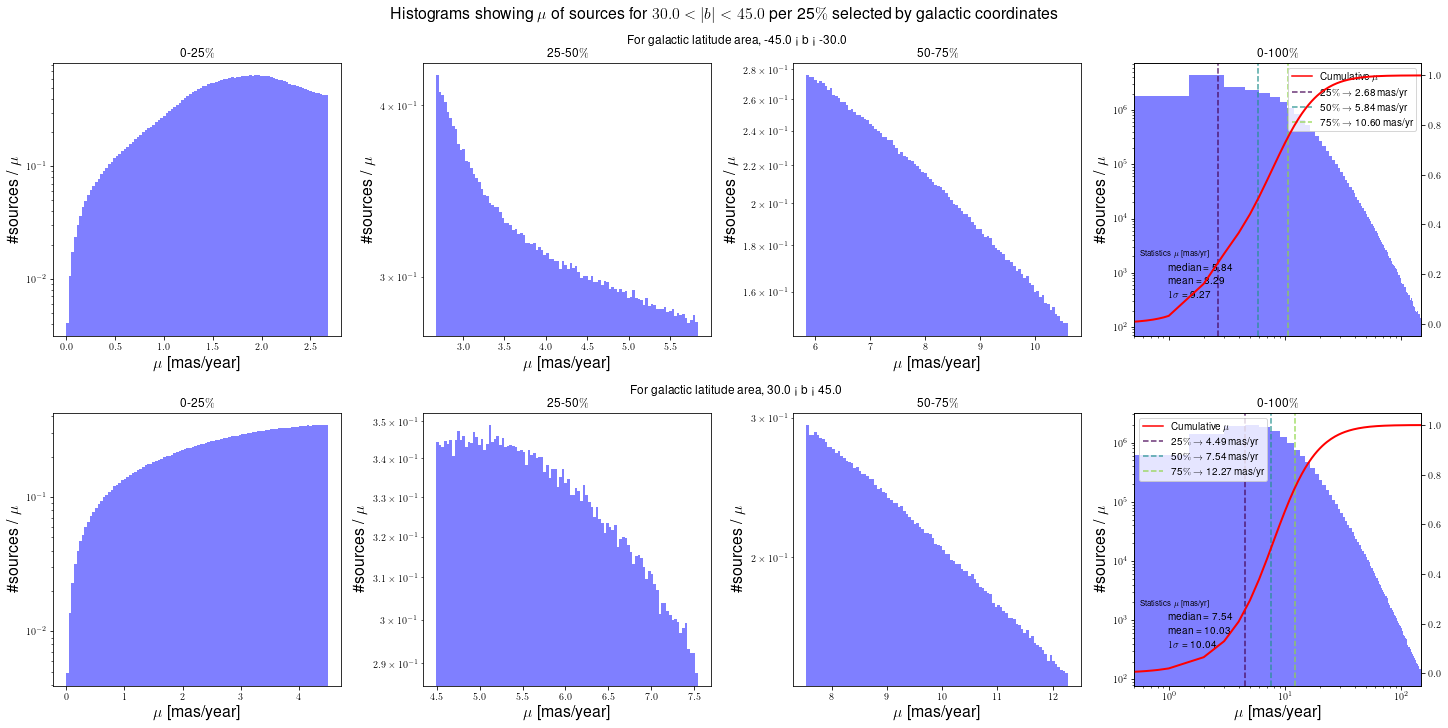

In [35]:
SourcesEuclidSky_PM_galacticlatitude_PM_HistCum_slice(EUCLID_table_valid, b=100, a=0.5, B='', cum='auto', title='showing $\mu$ of sources for $30.0 < |b| < 45.0$', info='EuclidFootprintlogTruenormTrue', vel_filter=300.0, log=True, norm=True)


<center><i><b>Figure 8:</b>  Histograms showing the proper motion, $\mu$, distribution for every 25% slot of the sources in the areas for $-45^\circ < b < -30^\circ$, upper plot, and $30^\circ < b < 45^\circ$, lower plot. </i></center>


The values for both the southern and the northern sky appear to be almost equal. The only noticable values would be the ones for $30^\circ < |b| < 45^\circ$. The statistics for the faster velocities show about the same average, where the statistics for the slower velocities show a difference of almost 2 mas yr$^{-1}$

By plotting the histograms like Figure 3 for $30^\circ < |b| < 45^\circ$, we can investigate these values in a bit more detail. The result is shown in Figure 8. 

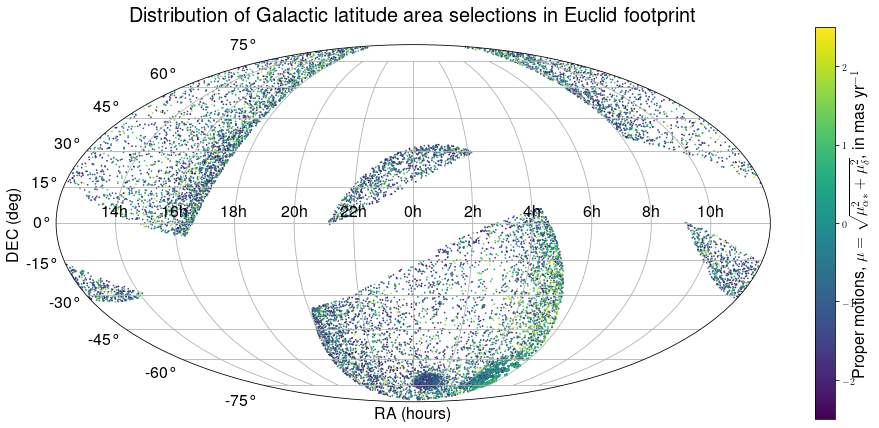

In [32]:
pm_table = EUCLID_table_valid.sample(200000)

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection="mollweide")

check_column(pm_table)

vel_filter = [1.0, 2.5]
pm_table_pmdec = pm_table.loc[(pm_table['mu'] > vel_filter[0]) & (pm_table['mu'] < vel_filter[1])]
nr_sources_in_sample = len(pm_table_pmdec)

ax.set_title('Distribution of Galactic latitude area selections in Euclid footprint', fontsize=20, y=1.05)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.tick_params(labelsize=16)
ax.xaxis.set_label_text("RA (hours)", fontsize=16)
ax.yaxis.set_label_text("DEC (deg)", fontsize=16)

ra = coord.Angle(pm_table_pmdec['ra']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(pm_table_pmdec['dec']*u.degree)

plt.scatter(ra.radian, dec.radian, c=pm_table_pmdec["pmdec"], s=0.5, rasterized=True)   
cbar = plt.colorbar(shrink=0.6)
cbar.set_label(r"Proper motions, $\mu = \sqrt{\mu_{\alpha \ast}^2 + \mu_{\delta}^2}$, in mas yr$^{-1}$", fontsize=16, labelpad=-1)

plt.subplot(ax)

ax.grid(True)
plt.savefig("./plots/thesis_EuclidSky_overview_galacticlattitude.pdf", bbox_inches='tight', pad_inches=0)
plt.show()


<center><i><b>Figure 9:</b>  The Euclid sky footprint with showing the $\mu_{\delta}$ distributions for sources having an $1.0< \mu < 2.5$ </i>. As we look in the South we can clearly see the contribution of the Large Magellanic Cloud (around 4h RA) and the Small Magellanic Cloud (around 1h RA) significantly contributing to the statistics. </center> <a id = "f2.8" LOC></a>

<br>

[Go back to list of contents](#LOC)


<br>

***

## Deselecting Large and Small Magellanic Clouds
The Magellanic Clouds are two irregular dwarf galaxies that are visible in the Southern Celestial Hemisphere. They are part of the Local group. Being galaxies, the sources forming the clouds will have approximately the same proper motion. Multiple studies reveal independent measurements of the mean proper motion of the clouds. 

From Figure 9 becomes clear that the Large Magellanic Cloud (LMC) and Small Magellanic Cloud (SMC) are causing two big clusters of sources that are, due to their specific proper motion, all moving with the same proper motion on the sky. If we take into account all the separate sources in the cloud as individual ones, instead of regarding it as one single galaxy, our proper motion study will be highly skewed towards the proper motion values of the clouds. Therefore, we will now try to filter them out of our Gaia data. 

[Concerning the Eudlid Wide Field Area, the survey will fully neglect the areas of the Magellanic clouds]
#### The locations and proper motions of the Magellanic Clouds
[Paturel G. et al (2003)](http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2003A%26A...412...45P) and [Kallivayalil N. et al (2013)](http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2013ApJ...764..161K) present the location obtained by the HYPERLEDA catalog and the third-epoch magellanic cloud proper motions observed by the Hubble Space Telescope.  

The centres of the LMC (05:23:34.60; -69:45:22.00) and SMC (00:52:38.00; -72:48:01.00) [Paturel G. et al (2003)](http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2003A%26A...412...45P) can be transformed to degrees. This results in RA$_{\text{LMC}} = 80.89^{\circ}$, Dec$_{\text{LMC}} = -69.76 ^{\circ}$ and  RA$_{\text{SMC}} = 13.16 ^{\circ}$, Dec$_{\text{SMC}} = -72.80 ^{\circ}$.
According to [the NASA/IPAC Extragalactic Database](http://ned.ipac.caltech.edu/byname?objname=small%20magellanic%20cloud&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1) the sizes of the LMC and SMC are $10.75^\circ \times 9.17^\circ$, and $\sim 5^\circ \times \sim3^\circ$ respectively. 

> <b>Large Magellanic Cloud</b> <br>
> Location: RA$_{\text{LMC}} = 80.89^{\circ}$, Dec$_{\text{LMC}} = -69.76 ^{\circ}$<br>
> Apparent size (V): $10.75^\circ \times 9.17^\circ$<br>
> Proper motion: $\mu_{\delta}= -1.910 \pm 0.020 $mas yr$^{-1}$, $\mu_{\alpha \ast} = 0.229 \pm 0.047$ mas yr$^{-1}$


> <b>Small Magellanic Cloud</b> <br>
> Location: RA$_{\text{SMC}} = 13.16 ^{\circ}$, Dec$_{\text{SMC}} = -72.80 ^{\circ}$<br>
> Apparent size (V): $\sim 5^\circ \times \sim3^\circ$<br>
> Proper motion: $\mu_{\delta}= -0.772 \pm 0.063 $mas yr$^{-1}$, $\mu_{\alpha \ast} = 1.117 \pm 0.061$ mas yr$^{-1}$
 



In [12]:
check_column(EUCLID_table_valid) #EUCLID_table_valid

pm_LMC_limits = [-1.9, -2.0] #pmdec
pm_SMC_limits = [-0.6, -0.9] #pmdec

patch_LMC = [80.89, -69.76]
patch_SMC = [13.16, -72.80]

maskLMC_rough = select_area(EUCLID_table_valid, areaname= 'LMC', printing='off')
maskLMC = maskLMC_rough.loc[(maskLMC_rough['pmdec'] < -1.5)&(maskLMC_rough['pmdec'] > -2.4)&(maskLMC_rough['pmra'] < 0.5)&(maskLMC_rough['pmra'] > -0.25)]
maskLMC2 = maskLMC_rough.loc[(maskLMC_rough['mu'] < 4.0)&(maskLMC_rough['mu'] > 0.5)]

maskSMC_rough = select_area(EUCLID_table_valid, areaname= 'SMC', printing='off')
maskSMC = maskSMC_rough.loc[(maskSMC_rough['pmdec'] < -0.3)&(maskSMC_rough['pmdec'] > -1.2)&(maskSMC_rough['pmra'] < 1.4)&(maskSMC_rough['pmra'] > 0.6)]
maskSMC2 = maskSMC_rough.loc[(maskSMC_rough['mu'] < 4.0)&(maskSMC_rough['mu'] > 0.5)]

# filter table for sources in the Large Magellanic Cloud
filterLMC_EUCLID_table = EUCLID_table_valid[(~EUCLID_table_valid.index.isin(list(maskLMC.index.values)))]
filterLMC_EUCLID_table2 = EUCLID_table_valid[(~EUCLID_table_valid.index.isin(list(maskLMC2.index.values)))]

# filter table for sources in the Small Magellanic Cloud
filterMCs_EUCLID_table = filterLMC_EUCLID_table[(~filterLMC_EUCLID_table.index.isin(list(maskSMC.index.values)))]
filterMCs_EUCLID_table2 = filterLMC_EUCLID_table2[(~filterLMC_EUCLID_table2.index.isin(list(maskSMC2.index.values)))]

#gaia_euclid_allpatch_filtermcs2.csv  --> old
filterMCs_EUCLID_table2.to_csv("../../data/gaia/allpatch/gaia_euclid_allpatch_filtermcsThesis.csv", index=False)

In [9]:
check_column(EUCLID_table_valid) #EUCLID_table_valid

pm_LMC_limits = [-1.9, -2.0] #pmdec
pm_SMC_limits = [-0.6, -0.9] #pmdec

patch_LMC = [80.89, -69.76]
patch_SMC = [13.16, -72.80]

maskLMC_rough = select_area(EUCLID_table_valid, areaname= 'LMC', printing='off')
maskLMC = maskLMC_rough.loc[(maskLMC_rough['pmdec'] > -1.5)&(maskLMC_rough['pmdec'] < -2.4)&(maskLMC_rough['pmra'] > 0.5)&(maskLMC_rough['pmra'] < -0.25)]
maskLMC2 = maskLMC_rough.loc[(maskLMC_rough['mu'] > 4.0)&(maskLMC_rough['mu'] < 0.5)]

maskSMC_rough = select_area(EUCLID_table_valid, areaname= 'SMC', printing='off')
maskSMC = maskSMC_rough.loc[(maskSMC_rough['pmdec'] > -0.3)&(maskSMC_rough['pmdec'] < -1.2)&(maskSMC_rough['pmra'] > 1.4)&(maskSMC_rough['pmra'] < 0.6)]
maskSMC2 = maskSMC_rough.loc[(maskSMC_rough['mu'] > 4.0)&(maskSMC_rough['mu'] < 0.5)]

# filter table for sources in the Large Magellanic Cloud
filterLMC_EUCLID_table = EUCLID_table_valid[(~EUCLID_table_valid.index.isin(list(maskLMC.index.values)))]
filterLMC_EUCLID_table3 = EUCLID_table_valid[(~EUCLID_table_valid.index.isin(list(maskLMC2.index.values)))]

# filter table for sources in the Small Magellanic Cloud
filterMCs_EUCLID_table = filterLMC_EUCLID_table[(~filterLMC_EUCLID_table.index.isin(list(maskSMC.index.values)))]
filterMCs_EUCLID_table3 = filterLMC_EUCLID_table3[(~filterLMC_EUCLID_table3.index.isin(list(maskSMC2.index.values)))]

#gaia_euclid_allpatch_filtermcs2.csv  --> old
filterMCs_EUCLID_table3.to_csv("../../data/gaia/allpatch/gaia_euclid_allpatch_onlymcsThesis.csv", index=False)

In [10]:
MC_data = filterMCs_EUCLID_table3

#### Defining our own mask to filter the Magellanic Clouds
We want to mask sources in the area of the Magellanic Clouds, but as we know, not all sources in that area do belong to the clouds. Therefore, we make a small adjustment to the mask to only filter out the sources moving with a proper motion of $0.5 < \mu < 4.0$ mag yr$^{-1}$. The result is stored as a new table. By looking at a sample of the sources we can check the mask as well as the distribution of the sources, see Figure 10. 



``` python
maskLMC = maskLMC_rough.loc[(maskLMC_rough['pmdec'] < -1.5)&(maskLMC_rough['pmdec'] > -2.4)&(maskLMC_rough['pmra'] < 0.5)&(maskLMC_rough['pmra'] > -0.25)]
maskLMC = maskLMC_rough.loc[(maskLMC_rough['mu'] < 4.0)&(maskLMC_rough['mu'] > 0.5)]

maskSMC = maskSMC_rough.loc[(maskSMC_rough['pmdec'] < -0.3)&(maskSMC_rough['pmdec'] > -1.2)&(maskSMC_rough['pmra'] < 1.4)&(maskSMC_rough['pmra'] > 0.6)]
maskSMC = maskSMC_rough.loc[(maskSMC_rough['mu'] < 4.0)&(maskSMC_rough['mu'] > 0.5)]```

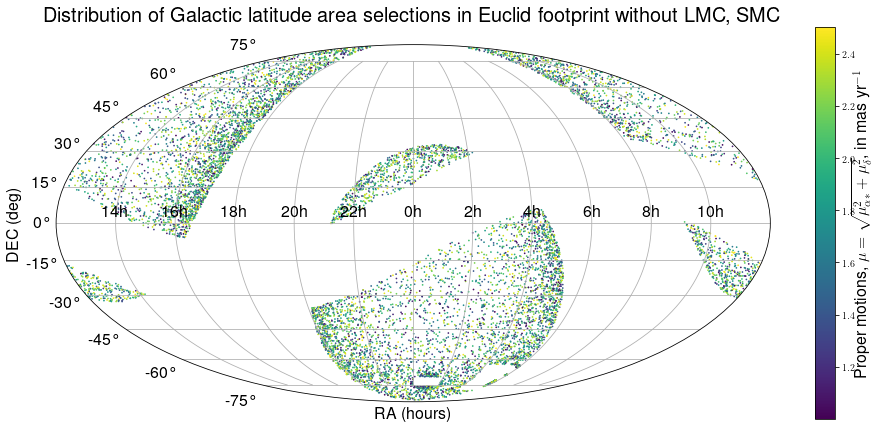

In [14]:
NOMC_data = filterMCs_EUCLID_table2 = pd.read_csv("../../data/gaia/allpatch/gaia_euclid_allpatch_filtermcs.csv")


fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection="mollweide")

check_column(filterMCs_EUCLID_table2)

vel_filter = [1.0, 2.5]
filterMCs_EUCLID_table_pm = filterMCs_EUCLID_table2.loc[(filterMCs_EUCLID_table2['mu'] > vel_filter[0]) & (filterMCs_EUCLID_table2['mu'] < vel_filter[1])]
sample_filterMCs_EUCLID_table_pm = filterMCs_EUCLID_table_pm.sample(n=10000)

ax.set_title('Distribution of Galactic latitude area selections in Euclid footprint without LMC, SMC', fontsize=20, y=1.05)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.tick_params(labelsize=16)
ax.xaxis.set_label_text("RA (hours)", fontsize=16)
ax.yaxis.set_label_text("DEC (deg)", fontsize=16)

ra = coord.Angle(sample_filterMCs_EUCLID_table_pm['ra']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(sample_filterMCs_EUCLID_table_pm['dec']*u.degree)


plt.scatter(ra.radian, dec.radian, c=sample_filterMCs_EUCLID_table_pm["mu"], s=0.5, rasterized=True)   
cbar = plt.colorbar(shrink=0.6)
cbar.set_label(r"Proper motions, $\mu = \sqrt{\mu_{\alpha \ast}^2 + \mu_{\delta}^2}$, in mas yr$^{-1}$", fontsize=16, labelpad=1)

plt.subplot(ax)

ax.grid(True)
filename = "./plots/thesis_EuclidSky_overview_galacticlattitude_withoutMCstry.pdf"
plt.savefig(filename, bbox_inches='tight', pad_inches=0)
plt.show()


<center><i><b>Figure 10:</b> The Euclid sky footprint with showing the $\mu_{\delta}$ distributions for sources having an $1.0< \mu < 2.5$. A filter is added to the data to minimise the contribution of the Large Magellanic Cloud (around 4h RA) and the Small Magellanic Cloud (around 1h RA) </i></center>


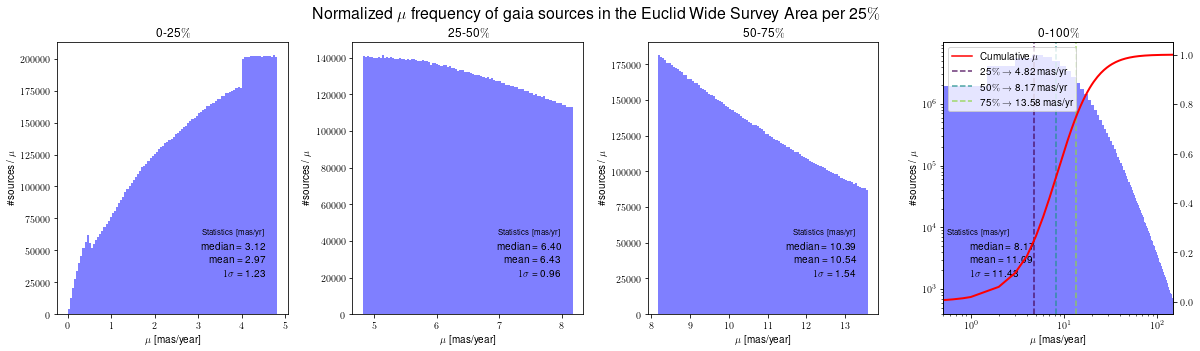

In [11]:
SourcesEuclidSky_PM_HistCum_slice(filterMCs_EUCLID_table2, b=100, a=0.5, percentage=0.25, title = 'in the Euclid Wide Survey Area', info='EuclidFootprintlogTruenormTrue_noMCs', vel_filter=150.0, log=False, norm=None)

<center><i><b>Figure 11:</b>  Histograms showing the $\mu$ distributions for every 25% slot of the sources in the entire Euclid Sky footprint, while filtering data for the Magellanic Clouds. </i></center>

Comparing the first graph from Figure 11 with the first graph from Figure 4 reveals clearly the contribution of the Magellanic Clouds. The correlation between median and mean reveal a proper motion which is comparible with the mean where as before, but the values go up by $\sim 1$mag yr${-1}$, which for these values is a lot.  

In [20]:
NOMC_data = filterMCs_EUCLID_table2 = pd.read_csv("../../data/gaia/allpatch/gaia_euclid_allpatch_filtermcs.csv")

print_filterinfo = "no"
print_table = "yes"

# check_column(EUCLID_table_valid)

vel_filter = 150.0
slice_options = [-90.0, -60.0, -45.0, -30.0, 0.0, 30.0, 45.0, 60.0, 90.0]

header = "| {:^11s} | {:^12s} | {:^12s} | {:^12s} | {:^12s} | {:^12s} | {:^11s} | {:^12s} | {:^12s} | {:^12s} | {:^12s} |".format("Galactic b",  "#sources/deg$^2$", "Mean $\mu$", "Median $\mu$", "Std $\mu$", "", "Galactic b",  "#sources/deg$^2$", "Mean $\mu$", "Median $\mu$", "Std $\mu$")

# Neglecting the high velocity sources a cumulative frequency histogram
tb_dirfilterlow = NOMC_data[NOMC_data['mu']<vel_filter]
tb_dirfilterhigh = NOMC_data[NOMC_data['mu']>vel_filter]
surface_areas = [2197.0, 1861.0, 3000.0, 0.0, 0.0, 3046.0, 1902.0, 2211.0]

# if print_filterinfo == "yes":
#     print('{} sources have been filtered out due to velocities higher than {} mas/yr'.format(len(filterMCs_EUCLID_table2[filterMCs_EUCLID_table2['mu']>vel_filter]), vel_filter))
#     print('Looking at the angular velocities slower and faster than {} mas/yr'.format(vel_filter))

if print_table == "yes":
    print(header)
    print("|:-----------:|:------------:|:------------:|:-------------:|:------------:|:------------:|:------------:|:-----------:|:------------:|:------------:|:------------:|")
    for idx_slice, slice_option in enumerate(slice_options[:-1]):
        tb_gallatlow = tb_dirfilterlow[(tb_dirfilterlow['b'] > float(slice_options[idx_slice])) & (tb_dirfilterlow['b'] < float(slice_options[idx_slice+1]))] 
        tb_gallathigh = tb_dirfilterhigh[(tb_dirfilterhigh['b'] > float(slice_options[idx_slice])) & (tb_dirfilterhigh['b'] < float(slice_options[idx_slice+1]))] 
        try:
            s = "| {:4.0f} - {:4.0f} | {:12.0f} | {:12.2f} | {:12.2f} | {:12.2f} |  {:^12s}  |{:4.0f} - {:4.0f} | {:12.0f} | {:12.2f} | {:12.2f} | {:12.2f} |".format(slice_option,  slice_options[idx_slice+1], (float(len(tb_gallatlow))/surface_areas[idx_slice]), tb_gallatlow['mu'].mean(), tb_gallatlow['mu'].median(), (tb_gallatlow['mu'].var())**0.5, "<----->", slice_option,  slice_options[idx_slice+1], (float(len(tb_gallathigh))/surface_areas[idx_slice]), tb_gallathigh['mu'].mean(), tb_gallathigh['mu'].median(), (tb_gallathigh['mu'].var())**0.5)
        except ZeroDivisionError as err:
            s = "| {:4.0f} - {:4.0f} | {:12.0f} | {:^12s} | {:^12s} | {:^12s} |  {:^12s}  |{:4.0f} - {:4.0f} | {:12.0f} | {:^12s} | {:^12s} | {:^12s} |".format(slice_option,  slice_options[idx_slice+1], 0, '---', '---', '---', "<----->", slice_option,  slice_options[idx_slice+1], 0, '---', '---', '---')
        print(s)

| Galactic b  | #sources/deg$^2$ |  Mean $\mu$  | Median $\mu$ |  Std $\mu$   |              | Galactic b  | #sources/deg$^2$ |  Mean $\mu$  | Median $\mu$ |  Std $\mu$   |
|:-----------:|:------------:|:------------:|:-------------:|:------------:|:------------:|:------------:|:-----------:|:------------:|:------------:|:------------:|
|  -90 -  -60 |         1886 |        14.04 |        10.43 |        13.27 |    <----->     | -90 -  -60 |            2 |       214.88 |       184.91 |       104.68 |
|  -60 -  -45 |         3241 |        12.03 |         9.01 |        11.21 |    <----->     | -60 -  -45 |            1 |       213.56 |       183.86 |        92.01 |
|  -45 -  -30 |         5798 |         9.88 |         7.47 |         9.17 |    <----->     | -45 -  -30 |            1 |       214.44 |       185.21 |        99.50 |
|   30 -   45 |         5080 |         9.98 |         7.54 |         9.37 |    <----->     |  30 -   45 |            1 |       213.39 |       183.63 |       102.30 |
|   45 -   60 |         2721 |        12.07 |         9.05 |        11.32 |    <----->     |  45 -   60 |            1 |       214.59 |       183.71 |        92.78 |
|   60 -   90 |         1773 |        13.95 |        10.31 |        13.26 |    <----->     |  60 -   90 |            2 |       216.46 |       184.95 |       101.23 |

<center> <i><b>Table 8:</b>  Statistics on Gaia DR2 sources [without Magellanic Clouds] for different areas on the sky. Similar as for table 6, the table reveals both statistics for $\mu < 150.0$ mas yr$^{-1}$, on the left side of the table, as for $\mu > 150.0$ mas yr$^{-1}$, which is on the right side of the table.  </i> </center> 



***

<br>
<br>
<br>

[Go back to list of contents](#LOC)

***
<br>


## Importance of proper motions for the Euclid Astrometric Reference Catalog
One of the requirements of the Eulid satelite is to obtain astrometric solutions with an accuracy of $\sim 30$ mas yr$^{-1}$. This will be achieved using astrometric calibration sources from first the Gaia catalogs and when ready the Euclid VIS catalog. As the first results are expected in 2026, about 10 years ahead, we will find that our stars that we might use for calibration, are moving. If their angular velocity becomes higher than the required accuracy, we have to take their proper motion into account. This is especially important when Euclid data is cross-matched with the ground based surveys. These surveys will finish or have finished their observations and corresponding catalogs at different times. This directly implies that even if they had the same patch of the sky, stars would have different locations.  

By selecting patches on the sky, we can investigate how fast stars are moving in specific survey exposures. 

|          Survey          |  Cover area (deg$^2$)  | Field of View (deg$^2$) |   Central pointing 1   |   Central pointing 2   |
|:------------------------:|:----------------------:|:-----------------------:|:----------------------:|:----------------------:|
|        [CFI Survey](http://www.cfht.hawaii.edu/Science/CFIS/cfissurvey.html)        |          4800          |           1.10          |    [260.0] - [75.0]    |    [120.0] - [75.0]    |
|          JEDIS-g         |          4800          |           4.06          |    [260.0] - [35.0]    |    [120.0] - [35.0]    |
|    [Kilo Degree Survey](http://kids.strw.leidenuniv.nl/overview.php)    |           750          |           1.00          |    [140.0] - [-1.0]    |    [50.0] - [-35.0]    |
|    [Dark Energy Survey](https://academic.oup.com/mnras/article/460/2/1270/2609135)    |          4500          |           3.00          |     [75.0] - [-50.0]   |    [315.0] - [-50.0]   |
|     [Pan-STARSS 1 & 2](https://panstarrs.stsci.edu/)     |          4800          |           7.00          |    [150.0] - [-10.0]   |    [70.0] - [-10.0]    |
|           LSST           |         11000          |           9.62          |      [   ] - [   ]     |      [   ] - [   ]     |

<center> <i><b>Table 9:</b>  Information on Euclids External ground-based surveys. Pointings represent central coordinates in [ra]-[dec] in degrees.</i> </center> <a id = "t2.3" LOC></a>

#### Kilo Degree Sky Survey

In [ ]:
pd.options.mode.chained_assignment = None

KIDS_table_valid = KIDS_table[validAstromSol_filter]

vel_filter = 150.0
pointings = ["[235.0] - [0.0]", "[140.0] - [-1.0]", "[340.0] - [-30.0]", "[50.0] - [-35.0]"]
patches = [[340.0,-30.0], [50.0,-35.0], [235.0,0.0], [140.0,-1.0]]

print_filterinfo = "no"
print_table = "no"


header = "| {:^18s} | {:^12s} | {:^12s} | {:^12s} | {:^12s} |".format("Tile pointing [ra(deg)]-[dec(deg)]",  "#sources per tile", "Mean $\mu$", "Median $\mu$", "Std $\mu$")

if print_filterinfo == "yes":
    for idx_t, patch in enumerate(patches):
        pm_table = select_area(KIDS_table_valid, areaname= patch)
        
        check_column(pm_table)
        pm_table_filter = pm_table.loc[pm_table['mu'] < vel_filter]
        print('{} sources have been filtered out due to velocities higher than {} mas/yr'.format(len(pm_table[pm_table['mu']>vel_filter]), vel_filter))
        print('Looking at the angular velocities slower and faster than {} mas/yr'.format(vel_filter))

if print_table == "yes":
    print(header)
    print("|:------------------:|:------------:|:------------:|:------------:|:------------:|")
    for idx_t, patch in enumerate(patches):
        pm_table = select_area(KIDS_table_valid, areaname= patch)
        
        check_column(pm_table)
        pm_table_filter = pm_table.loc[pm_table['mu'] < vel_filter]
        
        s = "| {:^18s} | {:12.0f} | {:12.2f} | {:12.2f} | {:12.2f} |".format(pointings[idx_t], len(pm_table_filter), pm_table_filter['mu'].mean(), pm_table_filter['mu'].median(), (pm_table_filter['mu'].var())**0.5)
        print(s)

|     Tile pointing [ra(deg)]-[dec(deg)]     |  #sources per tile   |  Mean $\mu$   | Median $\mu$  |   Std $\mu$   |
|:------------------:|:------------:|:------------:|:------------:|:-------------|
|  [235.0] - [0.0]   |         2461 |        13.99 |        10.35 |        13.30 |
|  [140.0] - [-1.0]  |         1836 |        13.15 |         9.48 |        12.77 |
| [340.0] - [-30.0]  |         6659 |        11.63 |         9.02 |         9.92 |
|  [50.0] - [-35.0]  |         3701 |        10.09 |         7.09 |        10.64 |

<center> <i><b>Table 10:</b>  Statistics of four different pointings in the KiDS survey. Pointings represent central coordinates in [ra]-[dec] in degrees.</i>  </center>   <a id = "t2.4" LOC></a>

#### Dark Energy Sky Survey

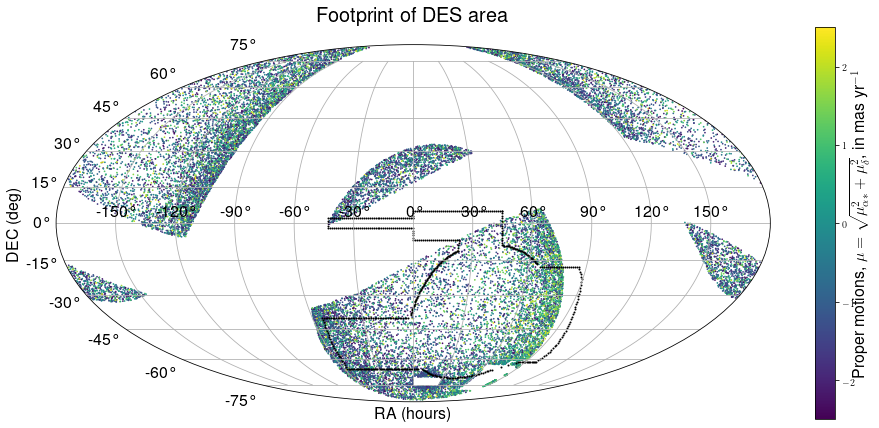

In [41]:
#----------------------
#----------------------
pm_table = sample_filterMCs_EUCLID_table_pm

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection="mollweide")

check_column(pm_table)

vel_filter = [1.0, 2.5]
pm_table_pmdec = pm_table.loc[(pm_table['mu'] > vel_filter[0]) & (pm_table['mu'] < vel_filter[1])]

# ax.set_title('Distribution of Galactic latitude area selections in Euclid footprint', fontsize=20, y=1.05)
# ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
# ax.xaxis.set_label_text("RA (hours)", fontsize=16)
# ax.yaxis.set_label_text("DEC (deg)", fontsize=16)

ra = coord.Angle(pm_table_pmdec['ra']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(pm_table_pmdec['dec']*u.degree)

plt.scatter(ra.radian, dec.radian, c=pm_table_pmdec["pmdec"], s=0.5, rasterized=True)   
cbar = plt.colorbar(shrink=0.6)
cbar.set_label(r"Proper motions, $\mu = \sqrt{\mu_{\alpha \ast}^2 + \mu_{\delta}^2}$, in mas yr$^{-1}$", fontsize=16, labelpad=-1)

#----------------------
#----------------------

pointing_DES = np.loadtxt("../../data/gaia/pointings/DESfp.txt", usecols=(0,1), skiprows=1)
RA_DES = pointing_DES[:,0]
DEC_DES = pointing_DES[:,1]

# fig = plt.figure(figsize=(16,12))
# ax = fig.add_subplot(111, projection="mollweide")

ax.set_title('Footprint of DES area', fontsize=20, y=1.05)
#ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.tick_params(labelsize=16)
ax.xaxis.set_label_text("RA (hours)", fontsize=16)
ax.yaxis.set_label_text("DEC (deg)", fontsize=16)

ra = coord.Angle(RA_DES*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(DEC_DES*u.degree)

plt.scatter(ra.radian, dec.radian, s=1.0, c='k', rasterized=True)  

plt.subplot(ax)

ax.grid(True)
plt.savefig("./plots/thesis_EuclidSky_overview_DES.pdf", bbox_inches='tight', pad_inches=0)
plt.show()


<center><i><b>Figure 12:</b>  The Euclid Wide Survey with in black the boarders of the Dark Energy Survey footprint. </i></center>

In [48]:
vel_filter = 150.0
pointings = ["[30.0] - [-15.0]", "[60.0] - [-20.0]", "[60.0] - [-55.0]", "[300.0] - [-55.0]"]
patches = [[30.0,-15.0], [60.0,-20.0], [60.0,-55.0], [300.0,-50.0]]

print_filterinfo = "no"
print_table = "no"

header = "| {:^18s} | {:^12s} | {:^12s} | {:^12s} | {:^12s} |".format("Tile pointing [ra(deg)]-[dec(deg)]",  "#sources per tile", "Mean $\mu$", "Median $\mu$", "Std $\mu$")

if print_filterinfo == "yes":
    for idx_t, patch in enumerate(patches):
        pm_table = select_area(filterMCs_EUCLID_table2, areaname= patch, tile=np.sqrt(3.0))
        
        check_column(pm_table)
        
        pm_table_filter = pm_table.loc[pm_table['mu'] < vel_filter]
        print('{} sources have been filtered out due to velocities higher than {} mas/yr'.format(len(pm_table[pm_table['mu']>vel_filter]), vel_filter))
        print('Looking at the angular velocities slower and faster than {} mas/yr'.format(vel_filter))

if print_table == "yes":
    print(header)
    print("|:------------------:|:------------:|:------------:|:------------:|:------------:|")
    for idx_t, patch in enumerate(patches):
        pm_table = select_area(filterMCs_EUCLID_table2, areaname= patch, printing='off')
        
        check_column(pm_table)
        pm_table_filter = pm_table.loc[pm_table['mu'] < vel_filter]
        
        s = "| {:^18s} | {:12.0f} | {:12.2f} | {:12.2f} | {:12.2f} |".format(pointings[idx_t], len(pm_table_filter), pm_table_filter['mu'].mean(), pm_table_filter['mu'].median(), (pm_table_filter['mu'].var())**0.5)
        print(s)

|     Tile pointing [ra(deg)]-[dec(deg)]     |  #sources per tile   |  Mean $\mu$   | Median $\mu$  |   Std $\mu$   |
|:------------------:|:------------:|:------------:|:------------:|:------------:|
|  [30.0] - [-15.0]  |         1437 |        15.62 |        11.42 |        15.67 |
|  [60.0] - [-20.0]  |         2147 |        10.99 |         8.00 |        11.00 |
|  [60.0] - [-55.0]  |         1973 |        11.23 |         8.31 |        10.57 |
| [300.0] - [-55.0]  |         9000 |         9.55 |         7.80 |         7.85 |

<center> <i><b>Table 11:</b>  Statistics of four different pointings in the DES survey. The first column indicates the location of the tiles in [right ascention]-[declination] in degrees.</i>    </center>   <a id = "t2.5" LOC></a>

#### Canada-France Imaging Survey

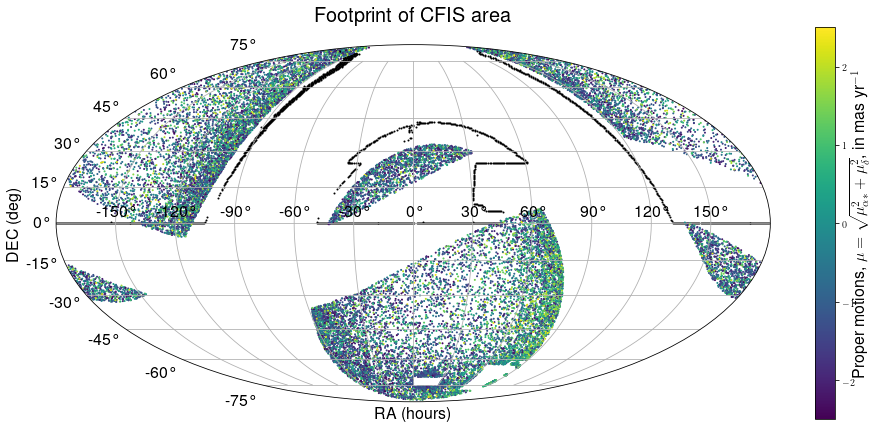

In [42]:
from itertools import compress 

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection="mollweide")

pointing_CFIS = np.loadtxt("../../data/gaia/pointings/CFISfp2.txt", usecols=(0,1), skiprows=1)
RA_CFIS = pointing_CFIS[:,0]
DEC_CFIS = pointing_CFIS[:,1]

# fig = plt.figure(figsize=(16,12))
# ax = fig.add_subplot(111, projection="mollweide")

ax.set_title('Footprint of CFIS area', fontsize=20, y=1.05)
#ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.tick_params(labelsize=16)
ax.xaxis.set_label_text("RA (hours)", fontsize=16)
ax.yaxis.set_label_text("DEC (deg)", fontsize=16)

ra = coord.Angle(RA_CFIS*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(DEC_CFIS*u.degree)

plt.scatter(ra.radian, dec.radian, s=1.0, c='k', rasterized=True)  


#----------------------
#----------------------
pm_table = sample_filterMCs_EUCLID_table_pm

check_column(pm_table)

vel_filter = [1.0, 2.5]
pm_table_pmdec = pm_table.loc[(pm_table['mu'] > vel_filter[0]) & (pm_table['mu'] < vel_filter[1])]

# ax.set_title('Distribution of Galactic latitude area selections in Euclid footprint', fontsize=20, y=1.05)
#ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
# ax.xaxis.set_label_text("RA (hours)", fontsize=16)
# ax.yaxis.set_label_text("DEC (deg)", fontsize=16)

ra = coord.Angle(pm_table_pmdec['ra']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(pm_table_pmdec['dec']*u.degree)

plt.scatter(ra.radian, dec.radian, c=pm_table_pmdec["pmdec"], s=1.0, rasterized=True)   
cbar = plt.colorbar(shrink=0.6)
cbar.set_label(r"Proper motions, $\mu = \sqrt{\mu_{\alpha \ast}^2 + \mu_{\delta}^2}$, in mas yr$^{-1}$", fontsize=16, labelpad=-1)

#----------------------
#----------------------

plt.subplot(ax)

ax.grid(True)
plt.savefig("./plots/thesis_EuclidSky_overview_CFIS.pdf", bbox_inches='tight', pad_inches=0)
plt.show()


<center><i><b>Figure 13:</b>  The Euclid Wide Survey with in black the boarders of the Canada-France Imaging Survey footprint. </i></center>

In [19]:
vel_filter = 150.0
pointings = ["[240.0] - [60.0]", "[240.0] - [15.0]", "[345.0] - [20.0]", "[150.0] - [45.0]"]
patches = [[240.0,60.0], [240.0,15.0], [345.0,20.0], [150.0,45.0]]

print_filterinfo = "no"
print_table = "no"

header = "| {:^18s} | {:^12s} | {:^12s} | {:^12s} | {:^12s} |".format("Tile pointing [ra(deg)]-[dec(deg)] ",  "#sources per tile", "Mean $\mu$", "Median $\mu$", "Std $\mu$")

if print_filterinfo == "yes":
    for idx_t, patch in enumerate(patches):
        pm_table = select_area(filterMCs_EUCLID_table2, areaname= patch, tile=np.sqrt(1.1))
        
        check_column(pm_table)
        
        pm_table_filter = pm_table.loc[pm_table['mu'] < vel_filter]
        print('{} sources have been filtered out due to velocities higher than {} mas/yr'.format(len(pm_table[pm_table['mu']>vel_filter]), vel_filter))
        print('Looking at the angular velocities slower and faster than {} mas/yr'.format(vel_filter))
        
        
if print_table == "yes":
    print(header)
    print("|:------------------:|:------------:|:------------:|:------------:|:------------:|")
    for idx_t, patch in enumerate(patches):
        pm_table = select_area(filterMCs_EUCLID_table2, areaname= patch, printing='off')
        
        check_column(pm_table)
        pm_table_filter = pm_table.loc[pm_table['mu'] < vel_filter]
        
        s = "| {:^18s} | {:12.0f} | {:12.2f} | {:12.2f} | {:12.2f} |".format(pointings[idx_t], len(pm_table_filter), pm_table_filter['mu'].mean(), pm_table_filter['mu'].median(), (pm_table_filter['mu'].var())**0.5)
        print(s)

|     Tile pointing [ra(deg)]-[dec(deg)]     |  #sources per tile   |  Mean $\mu$   | Median $\mu$  |   Std $\mu$   |
|:------------------:|:------------:|:------------:|:------------:|:------------:|
|  [240.0] - [60.0]  |         1614 |        11.27 |         8.47 |        10.13 |
|  [240.0] - [15.0]  |         5382 |        11.05 |         8.88 |         9.61 |
|  [345.0] - [20.0]  |         4568 |        10.39 |         7.77 |         9.60 |
|  [150.0] - [45.0]  |         1190 |        12.56 |         9.15 |        12.73 |

<center> <i><b>Table 12:</b>  Statistics of four different pointings in the CFIS survey. The first column indicates the location of the tiles in [right ascention]-[declination] in degrees.</i>    </center> <a id = "t2.6" LOC></a> 



***
<br>


## Calibrator density over the three galactic latitude ranges. 

All statistics regarding the calibrator density over the three galactic latitude ranges are summaries below:

|     Galactic $|b|$     |  #sources per area   | #sources/deg$^2$ |  Mean $\mu$   | Median $\mu$  |  Std $\sigma_{\mu}$   |
|:-------------------:|:-------------:|:------------:|:------------:|:------------:|:-------------:|
|        0 - 90       |    57,087,399   |        N.A. |        10.31 |         7.46 |         11.22 |
|       30 - 45       |    37,444,204   |        5088 |        11.73 |         6.60 |          9.06 |
|       45 - 60       |    11,572,224   |        3133 |        10.39 |         8.76 |         11.23 |
|       60 - 90       |    8,070,971    |        2400 |        13.99 |        10.37 |         13.27 |

<center> <i><b>Table 13:</b>  Statistics of the three Euclid Wide Field galactic latitude ranges. The first column reveals the absolute galactic latitude. All other columns present the statistics from these areas. The values are summarised from Figure 6.</i>    </center>  

***

<br>
<br>
<br>

[Go back to list of contents](#LOC)

***
<br>


## Investigating the dependence of proper motion on stellar magnitudes
Every survey is observing with a survey specific sensitivity. This implies that every celestial object is measured with a different S/N depending on its magnitude. To get a complete overview of the number of astrometrical calibration sources present in the Gaia DR2 for each external survey, we will now investigate the magnitudes of the sources.

### Stellar magnitudes

<br>
<center><i>Measuring though a set of filters makes a stellar magnitude <br>a unitless measure of the brightness of an astrometrical object <br>based on this predefined passband. </i></center>

Photometry is the measurement of the apparent magnitude of celestial sources. Incoming light goes through a filter ans falls onto a detector. The filter will select a specific range of wavelengths. This is what is called a passband: a specification of the wavelength range that is allowed to pass through the filter. Passbands are defined by the used instrument since they depend upon the response of the wave fronts passing the filter and the efficiency of the detectors. 


To standardise magnitudes, one can define a list containing standard magnitudes and colors for a set of stars measured at specific bandpasses. This is being referred to as a standard photometric system. The systems are called wide broad ($\lambda < 1000 Å$), intermediate ($70 < \lambda < 400 Å$) or narrow ($\lambda < 70 Å$) band, according to the range of the spectrum covered by the system ([Bessel, M. 2005](https://www.annualreviews.org/doi/pdf/10.1146/annurev.astro.41.082801.100251)). 

Common photometric systems are 

* Johnson-Morgan or UBV photometric system: based on photometric measurements of the ultraviolet (U), blue (B), and visual (V). 
* Gunn griz system: based on photoelectric detections in a set of filters, being u, g, r, i and z. The system was slightly modified by the Sloan Digital Sky Survey (SDSS). 
* AB magnitude system: based on flux measurements that are calibrated in absolute units. 


### Importance of magnitudes for our proper motion analysis

In the previous analysis of sources and their proper motions we neglect their magnitude. However, we just mentioned that every instrument will encounter its own bandpass with limiting magnitudes. The external ground-based surveys will not containing all sources measured by the Gaia satelite, because broad passband of Gaia is able to observe a wider range of magnitudes. 

To get a realistic view on how many calibrator course are present in the field of the calibrators, we want to start with creating an overview that shows how propermotion, as well as the number of sources depends on the G magnitude. Thereafter, using the realistic passbands as known from the KiDS, DES and CFIS surveys. This will result in an idealistic prediction of the available astrometrical calibrators while taking into account both proper motion and magnitude.   

### G magnitude attibutes for Gaia DR2
Gaia uses the three passbands known as: G, G$_{\text{BP}}$ and G$_{\text{RP}}$. 
The broadband G magnitude in Gaia is derived from the calibrated flux using 

$$G = −2.5 \log(F) + G_0$$ 

The photometric zero point, $G_0$, is derived by the external calibration. 

Just as for astrometry, an accurate determination of the three passbands, is crucial. The passbands are not only defined by the filter. The behaviour of the incoming wave fronts when they hit the filter, as well as the mirrors of the telescope and the efficiency of the detectors themselves, determine the shape of the passband. These effects can be measured by comparison with known spectral energy distributions (SEDs). Unfortunately a set of spectra-photometric calibrators will only represents a small, possibly biased, sample of all possible SED shapes. Hence, there will always be components of the passband that are not well constrained.


> `phot_g_mean_mag` : G-band mean magnitude (float, Magnitude[mag])

Mean magnitude in the G band. This is computed from the G-band mean flux applying the magnitude zero-point in the Vega scale.

No error is provided for this quantity as the error distribution is only symmetric in flux space. This converts to an asymmetric error distribution in magnitude space which cannot be represented by a single error value.
<br><br>

> `a_g_val` : line-of-sight extinction in the G band, A_G (float, Magnitude[mag])

Estimate of extinction in the G band from Apsis-Priam
<br><br>

> `phot_rp_mean_mag` : Integrated RP mean magnitude (float, Magnitude[mag])

Mean magnitude in the integrated RP band. This is computed from the RP-band mean flux applying the magnitude zero-point in the Vega scale.

No error is provided for this quantity as the error distribution is only symmetric in flux space. This converts to an asymmetric error distribution in magnitude space which cannot be represented by a single error value.



<a id = "f2.10" LOC></a>

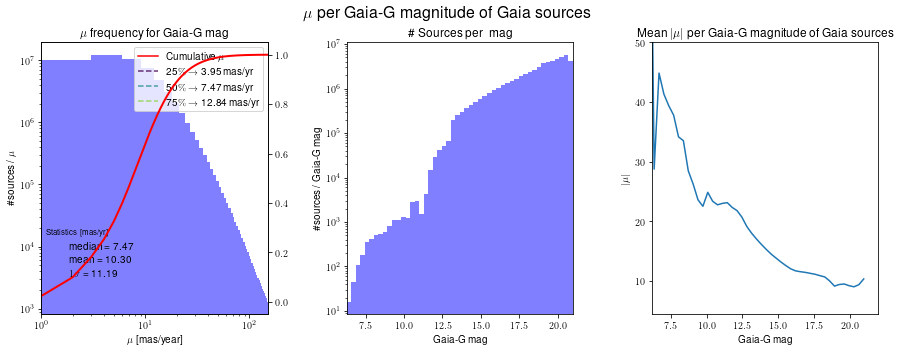

In [9]:
def plot_magGaia_sky(table = None, filter = 'gmag', optionMC = 'withoutMCs', vel_filter = 150.0):
    ''' Visualisation of magnitudes distribution for areas in table. Build-in magnitudes are Gaia-G 'gmag' and KiDS-r
    'rmag'. By default magnitude conversion is Gaia-G 'gmag'. By setting optionMC to either 'withMCS' or 'withoutMCs',
    the input table will or will not contain the areas contaminated/covered by the Small and Large Magellanic Cloud.

    (1) Retrieving .csv file with Gaia DR2 data (not containing areas covered by the Small and Large Magellanic Cloud
    (2) Plotting histogram showing proper motions ['mu'] from table
    (3) Plotting histogram showing magnitudes
    (4) Plotting graph revealing the mean proper motion ['mu'] per magnitudes
    (5) Saving, showing and closing a figure showing the surface area

        Parameters
        ----------
        table: pandas.DataFrame [Default = None]
            Data Frame stored in .csv or defined by input attribute 'table'

        filter: str [Default = 'gmag']
            Either 'gmag', or 'rmag', representing Gaia-G and KiDS-r magnitudes respectively

        optionMC: str [Default = 'withoutMCs']
            Either 'withMCs' or 'withoutMCs', to use table with or without the areas covered by the Magellanic Clouds

        vel_filter: float [Default = 150.0]
            Velocity filter for plotting table values

        Returns
        -------
        None

        {filter}_pm_analysis_sky{optionMC}.pdf:
            Plot stored as a .pdf file which is stored in the directory "plots"

    ------------------------------- User example --------------------------------
    ######### Using plot_magGaia_latitude() to plot source distribution #########

        table = plot_magGaia_latitude(None, filter = 'gmag', optionMC = 'withoutMCs', cum_plot = 'on'):

    '''
    # (1) Retrieving table that will or will not contain the areas covered by the Small and Large Magellanic Cloud
    # -------- Load csv to obtain table containing source information ------------
    if table == None and optionMC == 'withMCs':
        EUCLID_table_all = pd.read_csv("../../data/gaia/allpatch/gaia_euclid_allpatch_all.csv", sep=',',
                                       usecols=['pmra', 'pmdec', 'b', 'phot_g_mean_mag','astrometric_gof_al'])
        validAstromSol_filter = EUCLID_table_all['astrometmric_gof_al'] < 3.0  # CREATE MASK FOR UNVALID SOURCES
        table = EUCLID_table_all[validAstromSol_filter]  # FILTER OUT UNVALID SOURCES
    elif table == None and optionMC == 'withoutMCs':
        table = pd.read_csv("../../data/gaia/allpatch/gaia_euclid_allpatch_filtermcs.csv", sep=',',
                                         usecols=['pmra', 'pmdec', 'b', 'phot_g_mean_mag', 'astrometric_gof_al'])
    elif table != None:
        optionMC = str(input("The table is either withMCs/withoutMCs, please give option:  "))
    else:
        print("optionMC should be either withMCs/withoutMCs")
        return

    # ------------------ Obtaining data of 'mu' and magnitudes -------------------
    check_column(table)  # if not yet present, create a column 'mu' containing proper motions calculated using pmra and pmdec
    tab_mu = table['mu']
    tab_mag = table['phot_g_mean_mag']

    # --------------------- Settings for creating histogram ----------------------
    b = 50; a = 0.5; slice_options = [-90.0, -60.0, -45.0, -30.0, 0.0, 30.0, 45.0, 60.0, 90.0]

    if filter == 'gmag':
        filtername = "Gaia-G"
    elif filter == 'rmag':
        filtername = "KiDS-r"
        tab_mag = tab_mag + 0.05
    else:
        print("filter should be either rmag/gmag")

    fig, axes = plt.subplots(figsize=(15, 5), ncols=3, nrows=1)

    # ------------------------------- Graph 1/3 ----------------------------------
    # HISTOGRAM FOR PROPER MOTION IN TERMS OF MU

    # Plotting 'mu' distribution
    ax = axes[0]
    ax.set_title("$\mu$ frequency for {} mag".format(filtername))
    ax.xaxis.set_label_text(r"$\mu$ [mas/year]")

    hist = tab_mu[tab_mu < vel_filter].plot.hist(bins=b, alpha=a, ax=ax, density=False, facecolor='b', log=True, label="Histogram", )
    ax.xaxis.set_label_text(r"$\mu$ [mas/year]")
    ax.yaxis.set_label_text(r"\#sources / $\mu$")
    ax.set_xscale('log')
    ax.set_xlim(left=1.0, right=vel_filter)
    ax.set_ylim(bottom=0)

    # PLOT STATISTICS MU
    distCount, distMean, distStd, distMn, dist25, dist50, dist75, distMx = table['mu'].describe()

    ax.text(0.02, 0.30, "Statistics [mas/yr]", fontsize=8, va='center', ha='left', color='#000000',
            transform=ax.transAxes, )  # backgroundcolor='w',)
    # plot MEDIAN value of 'mu' in the histogram
    ax.text(0.12, 0.25, "median = {0:.2f}".format(tab_mu.median()), fontsize=10, va='center', ha='left', color='#000000',
            transform=ax.transAxes, )  # backgroundcolor='w',)
    # plot MEAN value of 'mu' in the histogram
    ax.text(0.12, 0.20, "mean = {0:.2f}".format(distMean), fontsize=10, va='center', ha='left', color='#000000',
            transform=ax.transAxes, )  # backgroundcolor='w',)
    # plot STANDARD DEVIATION value of 'mu' in the histogram
    ax.text(0.12, 0.15, "$1\sigma$ = {0:.2f}".format(distStd), fontsize=10, va='center', ha='left', color='#000000',
            transform=ax.transAxes, )  # backgroundcolor='w',)

    # CUMULATIVE DISTRIBUTION FOR PROPER MOTION IN MU
    ax1 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    pm_xrange = list(np.linspace(0.1, 1.0, num=10, endpoint=False))
    pm_xrange.extend(list(np.arange(int(vel_filter))[1:]))
    ax1.plot(pm_xrange, [len(tab_mu[tab_mu < i]) / len(tab_mu) for i in pm_xrange], '-r', linewidth=2,
             label=r'Cumulative $\mu$')

    # ADD CUSTOM LEGEND TO THE PLOT
    legend_elements = [Line2D([0], [0], color='r', label=r"Cumulative $\mu$"),
                       Line2D([0], [0], linestyle='dashed', alpha=0.8, color='#440154',
                              label="25$\% \\rightarrow$ {0:.2f} mas/yr".format(dist25)),
                       Line2D([0], [0], linestyle='dashed', alpha=0.8, color='#21908d',
                              label="50$\% \\rightarrow$ {0:.2f} mas/yr".format(dist50)),
                       Line2D([0], [0], linestyle='dashed', alpha=0.8, color='#8ed645',
                              label="75$\% \\rightarrow$ {0:.2f} mas/yr".format(dist75))]
    ax.legend(handles=legend_elements)

    # ------------------------------- Graph 2/3 ----------------------------------
    # HISTOGRAM FOR MAGNITUDE
    ax = axes[1]
    ax.set_title(r"\# Sources per {} mag")

    hist = tab_mag.plot.hist(bins=b, alpha=a, ax=ax, density=False, facecolor='b',log=True, label="Histogram", )

    ax.xaxis.set_label_text(r"{} mag".format(filtername))
    ax.yaxis.set_label_text(r"\#sources / {} mag".format(filtername))
    # ax.set_xscale('log')
    ax.set_ylim(bottom=0)

    # PLOT STATISTICS MAGNITUDE
    magCount, magMean, magStd, magMn, mag25, mag50, mag75, magMx = tab_mag.describe()
    ax.set_xlim(left=magMn, right=magMx)

    # ------------------------------- Graph 3/3 ----------------------------------
    # PLOT SHOWING THE MEAN PROPER MOTION [MU] PER MAGNITUDE

    # Preparing the bins for the magnitude
    mag_bins = np.linspace(6.0, 22.0, 48)  # 1 + N*16
    mag_bins_mumean = []

    for idx_bin, mag_bin in enumerate(np.linspace(int(magMn), int(magMx)+1, 48)[:-1]):
        filt = (tab_mag < (mag_bins[idx_bin + 1])) & (tab_mag > mag_bin)
        filt_mean = (tab_mu[filt]).mean()
        mag_bins_mumean.append( filt_mean )

    # Plotting the average proper motion for every predefined G magnitude bin
    ax = axes[2]
    ax.set_title(r"Mean $|\mu|$ per {} magnitude of Gaia sources".format(filtername))

    ax.plot(mag_bins[:-1], mag_bins_mumean)
    ax.xaxis.set_label_text(r"{} mag".format(filtername))
    ax.yaxis.set_label_text(r"$|\mu|$")
    ax.set_xlim(left=6.2, right=22.0)
    ax.set_ylim(top=50.0)

    # Plotting grid, adding title, show plot and save it
    fig.suptitle(r"$\mu$ per {} magnitude of Gaia sources".format(filtername), fontsize=16)
    fig.subplots_adjust(wspace=0.35)
    filename = "./plots/{}_pm_analysis_sky{}.pdf".format(filter, optionMC)

    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()
    return None

plot_magGaia_sky(None, filter = 'gmag', optionMC = 'withoutMCs')

<center><i><b>Figure 14:</b> [left] Histogram showing the number of sources as function of proper motion. As we go to slower motions we will find more sources. [middle] Histogram showing the number of sources as function of Gaia-G magnitudes. As we go to higher magnitudes, less bright, we will find more sources. [right] The average proper motions per magnitude. There appears to be a dependency, where the sources will move slower when having higher magnitudes. This could be biased since the sample of sources with lower magnitude is limited. </i></center> 

#### Conversion from AB magnitudes to Johnson magnitudes

To compare the scope for Gaia and the external ground-based surveys, we have to compare different photometric systems. Some constants for approximate conversions between different magnitude scales are provided by
[Frei & Gunn, (1995)](https://ui.adsabs.harvard.edu/abs/1994AJ....108.1476F/abstract). 
The following formulae convert between the AB magnitude systems and those based on Alpha Lyra:
```
     V	=   V(AB) + 0.044	(+/- 0.004)
     B	=   B(AB) + 0.163	(+/- 0.004)
    Bj	=  Bj(AB) + 0.139	(+/- INDEF)
     R	=   R(AB) - 0.055	(+/- INDEF)
     I	=   I(AB) - 0.309	(+/- INDEF)
     g	=   g(AB) + 0.013	(+/- 0.002)
     r	=   r(AB) + 0.226	(+/- 0.003)
     i	=   i(AB) + 0.296	(+/- 0.005)
     u'	=  u'(AB) + 0.0	        
     g'	=  g'(AB) + 0.0	        
     r'	=  r'(AB) + 0.0	        
     i'	=  i'(AB) + 0.0	        
     z'	=  z'(AB) + 0.0	        
    Rc	=  Rc(AB) - 0.117	(+/- 0.006)
    Ic	=  Ic(AB) - 0.342	(+/- 0.008)
    
```

### r magnitude attributes for KiDS

Depending on the colour of celestial objects have different conversions when we want to translate the Gaia-G magnitude to the KiDS-r magnitude. For now we will first take a constant conversion given by:  

$$ r-G = 0.05 $$


Using this conversion we are able to use the previous analysis we did on Gaia, but now for the r-band of KiDS. This will show us how many calibrators we have i our field of view when observing one tile of the KiDS survey.

<a id = "f2.11" LOC></a>

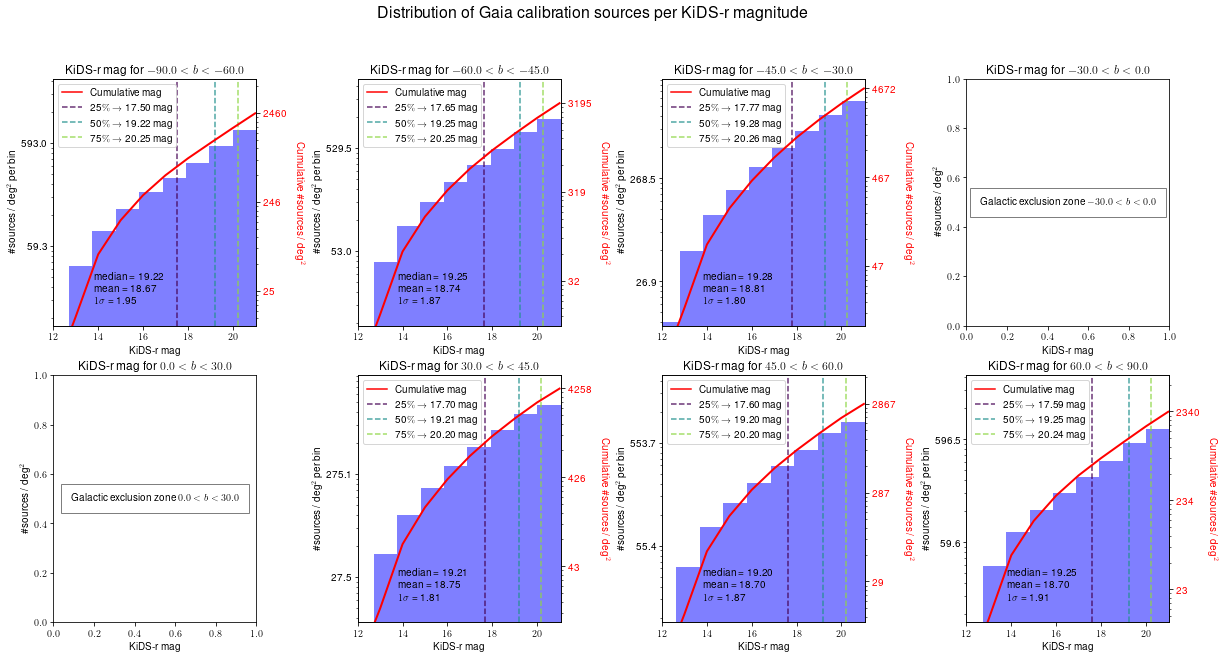

In [21]:
def plot_magGaia_latitude(table = None, filter = 'gmag', optionMC = 'withoutMCs', cum_plot = 'on'):
    ''' Visualisation of magnitudes distribution for different latitude ranges, -90 < b < -60, -60 < b < -45,
    -45 < b < -30, -30 < b < 0, 0 < b < 30, 45 < b < 60, 60 < b < 90. Build-in magnitudes are Gaia-G 'gmag' and KiDS-r
    'rmag'. By default magnitude conversion is Gaia-G 'gmag'. By setting optionMC to either 'withMCS' or 'withoutMCs',
    the input table will or will not contain the areas contaminated/covered by the Small and Large Magellanic Cloud.

    (1) Retrieving .csv file with Gaia DR2 data (not containing areas covered by the Small and Large Magellanic Cloud
    (2) Retrieving .csv file containing area information, given as output of _use_pandas()
    (3) Calculating the surface of the area using imported ratios as imported in (2)
    (4) Creating histogram for mag per area defined by latitude coordinates as defined by 'slice_options'
    (5) Saving, showing and closing a figure showing the surface area

        Parameters
        ----------
        table: pandas.DataFrame [Default = None]
            Data Frame stored in .csv or defined by input attribute 'table'

        filter: str [Default = 'gmag']
            Either 'gmag', or 'rmag', representing Gaia-G and KiDS-r magnitudes respectively

        optionMC: str [Default = 'withoutMCs']
            Either 'withMCs' or 'withoutMCs', to use table with or without the areas covered by the Magellanic Clouds

        cum_plot: str [Default = 'on']
            Either 'off' or 'on', to add a graph of the cumulative frequency to each plot

        Returns
        -------
        None

        {filter}_pm_analysis_norm{optionMC}.pdf:
            Plot stored as a .pdf file which is stored in the directory "plots"

    ------------------------------- User example --------------------------------
    ######### Using plot_magGaia_latitude() to plot source distribution #########

        plot_magGaia_latitude(None, filter = 'gmag', optionMC = 'withoutMCs', cum_plot = 'on')
        plot_magGaia_latitude(None, filter = 'rmag', optionMC = 'withMCs', cum_plot = 'off')

    '''
    # (1) Retrieving table that will or will not contain the areas covered by the Small and Large Magellanic Cloud
    # -------- Load csv to obtain table containing source information ------------
    if table == None and optionMC == 'withMCs':
        EUCLID_table_all = pd.read_csv("../../data/gaia/allpatch/gaia_euclid_allpatch_all.csv", sep=',',
                                       usecols=['pmra', 'pmdec', 'b', 'phot_g_mean_mag','astrometric_gof_al'])
        validAstromSol_filter = EUCLID_table_all['astrometmric_gof_al'] < 3.0  # CREATE MASK FOR UNVALID SOURCES
        table = EUCLID_table_all[validAstromSol_filter]  # FILTER OUT UNVALID SOURCES
    elif table == None and optionMC == 'withoutMCs':
        table = pd.read_csv("../../data/gaia/allpatch/gaia_euclid_allpatch_filtermcs.csv", sep=',',
                                         usecols=['pmra', 'pmdec', 'b', 'phot_g_mean_mag', 'astrometric_gof_al'])
    elif table == 'test':
        table = pd.read_csv("../../data/gaia/area_calc/temp.csv", sep=',',
                                         usecols=['pmra', 'pmdec', 'b', 'phot_g_mean_mag', 'astrometric_gof_al'])
    elif table != None:
        optionMC = str(input("The table is either withMCs/withoutMCs, please give option:  "))
    else:
        print("optionMC should be either withMCs/withoutMCs")
        return

    # (2) Retrieving table contains surface area information
    # ----------- Load csv to obtain table containing area information ------------
    area_table = pd.read_csv('../../data/gaia/area_calc/20200410_095611_areacalc_i100n300.csv')
    area_table_ColNamePerc = ['P_9060', 'P_6045', 'P_4530', 'P_3000', 'P_0030', 'P_3045', 'P_4560', 'P_6090']

    area_hemisphere = (2 / np.pi) * 360 * 90
    area_sky = 2 * area_hemisphere

    # ------------------ Obtaining data of 'mu' and magnitudes -------------------
    check_column(table)  # CHECK EXISTENCE, OR CREATING 'mu' COLUMN CONTAINING PROPER MOTIONS OF SOURCES

    # --------------------- Settings for creating histogram ----------------------
    a = 0.5; slice_options = [-90.0, -60.0, -45.0, -30.0, 0.0, 30.0, 45.0, 60.0, 90.0]
    colors = ['#440154', '#443983', '#31688e', '#21908d', '#35b779', '#8ed645', '#fde725']

    fig, axes = plt.subplots(figsize=(20, 10), ncols=4, nrows=2)
    axes = axes.flatten()

    for idx_area, area_boarders in enumerate(slice_options[:-1]):
        # (3) Calculating the surface of the area using imported ratios as imported in (2)
        # ------------------- Defining properties of the area --------------------

        area_ColNamePerc = area_table_ColNamePerc[idx_area] # OBTAINING CORRECT RATIO/AREA COLUMN NAME
        surface_area = (area_table[area_ColNamePerc][:].mean()) * (area_sky) # CALCULATING SURFACE AREA

        # (4) Creating histogram for mag per area defined by latitude coordinates as defined by 'slice_options'
        # ------------------------------- Graph ----------------------------------

        tab_mag = table['phot_g_mean_mag'][(table['b'] < slice_options[idx_area + 1]) & (table['b'] > slice_options[idx_area])]
        nr_sources = len(tab_mag) # NUMBER OF SOURCES IN AREA
        density_sources = nr_sources/surface_area # SOURCES PER SQRD DEGREES

        if filter == 'gmag':
            filtername = "Gaia-G"
        elif filter == 'rmag':
            filtername = "KiDS-r"
            tab_mag = tab_mag + 0.05
        else:
            print("filter should be either rmag/gmag")

        ax = axes[idx_area] # SELECTING NEW AX FOR PLOT
        ax.set_title("{} mag for ${} < b < {}$".format(filtername, slice_options[idx_area], slice_options[idx_area + 1]))
        ax.xaxis.set_label_text(r"{} mag".format(filtername))

        # THE EXCLUSION ZONE 0 < |b| < 30 DOES NOT CONTAIN SOURCES (EMPTY): A TRY STATEMENT NEGLECTS EMPTY REGIONS
        if nr_sources == 0:
            ax.text(0.5, 0.5, r"Galactic exclusion zone ${} < b < {}$".format(slice_options[idx_area],
                                                                              slice_options[idx_area + 1]),
                    transform=ax.transAxes, style='italic', verticalalignment='center', horizontalalignment='center',
                    bbox={'facecolor': 'w', 'alpha': a, 'pad': 10})
            ax.yaxis.set_label_text(r"\#sources / deg$^2$")


        else:
            magCount, magMean, magStd, magMn, mag25, mag50, mag75, magMx = tab_mag.describe()
            nr_bins = int(magMx-magMn)
            ax.hist(x=tab_mag, bins=nr_bins, color='b', alpha=a, rwidth=1)
            # PLOT STATISTICS MAG USING BUILD-IN PANDAS DESCRIBE() MODULE

            ax.set_xlim(left=12.0, right=magMx)

            ax.set_ylim(bottom=10 * surface_area, top=2500 * surface_area)
            ax.set_yscale('log')
            y_vals = ax.get_yticks()
            ax.set_yticklabels(['{:3.1f}%'.format(x / surface_area) for x in y_vals])
            ax.yaxis.set_label_text(r"\#sources / deg$^2$ per bin")

            # IF com_plot == 'on' PLOT CUMULATIVE FREQUENCY PLOT FOR EVERY HISTOGRAM
            if cum_plot == 'on':
                magCount, magMean, magStd, magMn, mag25, mag50, mag75, magMx

                # CUMULATIVE DISTRIBUTION FOR PROPER MOTION IN MU
                ax1 = ax.twinx()  # INITIATE A SECOND AXIS, AX1, SHARING SAME X-ASIS AS AX
                pm_xrange = list(np.linspace(0.1, 1.0, num=10, endpoint=False))
                pm_xrange.extend(list(np.arange(22))[1:])
                ax1.plot(pm_xrange, [len(tab_mag[tab_mag < i]) / nr_sources for i in pm_xrange], '-r', linewidth=2, label=r"Cumulative $\mu$")

                # PLOTTING VERTICAL LINES SHOWING PERCENTAGE OF SOURCE DISTRIBUTION
                ax.axvline(x=mag25, linestyle='dashed', alpha=0.8, color='#440154', zorder=1,
                           label='25$\%$ = {0:.2f}'.format(mag25))
                ax.axvline(x=mag50, linestyle='dashed', alpha=0.8, color='#21908d', zorder=1,
                           label='50$\%$ = {0:.2f}'.format(mag50))
                ax.axvline(x=mag75, linestyle='dashed', alpha=0.8, color='#8ed645', zorder=1,
                           label='75$\%$ = {0:.2f}'.format(mag75))

                # PLOT STATISTICS mag
                # plot MEDIAN value of mag in the histogram
                ax.text(0.20, 0.20, "median = {0:.2f}".format(tab_mag.median()), fontsize=10, va='center', ha='left',
                        color='#000000', transform=ax.transAxes, )  # backgroundcolor='w',)
                # plot MEAN value of mag in the histogram
                ax.text(0.20, 0.15, "mean = {0:.2f}".format(magMean), fontsize=10, va='center', ha='left',
                        color='#000000', transform=ax.transAxes, )  # backgroundcolor='w',)
                # plot STANDARD DEVIATION value of mag in the histogram
                ax.text(0.20, 0.10, "$1\sigma$ = {0:.2f}".format(magStd), fontsize=10, va='center', ha='left',
                        color='#000000', transform=ax.transAxes, )  # backgroundcolor='w',)


                ax1.set_ylim(bottom=10 / density_sources, top=6000 / density_sources)
                ax1.set_yscale('log')

                y_vals = ax1.get_yticks()

                ax1.set_yticklabels(['{:3.0f}%'.format(x * density_sources) for x in y_vals], color='r',)
                ax1.yaxis.labelpad = 20
                ax1.yaxis.set_label_text(r"Cumulative \#sources / deg$^2$", rotation = 270, color='r',)
                ax1.xaxis.set_label_text(r"{} mag".format(filtername))

                # ADD CUSTOM LEGEND TO THE PLOT
                legend_elements = [Line2D([0], [0], color='r', label=r"Cumulative mag"),
                                   Line2D([0], [0], linestyle='dashed', alpha=0.8, color='#440154',
                                          label="25$\% \\rightarrow$ {0:.2f} mag".format(mag25)),
                                   Line2D([0], [0], linestyle='dashed', alpha=0.8, color='#21908d',
                                          label="50$\% \\rightarrow$ {0:.2f} mag".format(mag50)),
                                   Line2D([0], [0], linestyle='dashed', alpha=0.8, color='#8ed645',
                                          label="75$\% \\rightarrow$ {0:.2f} mag".format(mag75))]
                ax.legend(handles=legend_elements)
            else:
                pass

    # (5) Saving, showing and closing a figure showing the surface area
    fig.suptitle(r"Distribution of Gaia calibration sources per {} magnitude".format(filtername), fontsize=16)
    fig.subplots_adjust(wspace=0.50)
    filename = "./plots/thesis{}_pm_analysis_norm{}.pdf".format(filter, optionMC)

    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()
    return None

plot_magGaia_latitude(None, filter = 'rmag', optionMC = 'withoutMCs', cum_plot = 'on')


<center><i><b>Figure 15:</b> The plots show the distribution of Gaia DR2 sources over each single sky patch, where $30^{\circ} < |b| < 45^{\circ}$ has been filtered for the contribution of the Magellanic Clouds, and the data into account both the ecliptic and galactic exclusion zones as shown in Figure 4. The KiDS-r magnitude is hypothetical as it has been calculated by converting the Gaia-G magnitude by $𝑟−𝐺=0.05$. Every <font color="#7F7FFF">histogram</font>, annotated by the black y-axis on the left, reveals the number of sources per squared degree per magnitude bin, where each bin represents one KiDS-r magnitude unit. The <font color="#FD0306">red lines</font>, annotated by the <font color="#FD0306">red axis</font> on the right, represent the cumulative frequency plots of the same histogram. The maximum discloses the average total amount of sources per squared degree in each sky patch. The horizontal lines show the <font color="#440154">25th</font>, <font color="#21908d">50th</font>, and <font color="#8ed645">75th</font> percentiles respectively, where 50% equals the median. </i></center>  

> From Figure 15 we can draw the following conclusions:
* For all different area more than 25% of the sources is located in the last magnitude bin and more than 50% in the last two bins representing a KiDS-r magnitude of $20.0 - 21.0$ mag and $19.0 - 21.0$ mag respectively. 
* The y-scales start with 10 sources per deg$^2$. Therefore there are < 10 sources of magnitudes below 12.0 mag.
* As expected the number of sources per deg$^2$ goes up as the value for $|b|$ goes down. 
* For external surveys that have a lower magnitude limit, e.g. PANSTARRS, all higher magnitude sources will be saturated in their image plane causing very low S/N. Taking an higher limit cut-off of 19.0 mag will lead to only 50% of the sources being useful calibrators. Therefore this study, being extended for every magnitude and sensitivity range of each external survey, is valuable.

<a id = "f2.12" LOC></a>

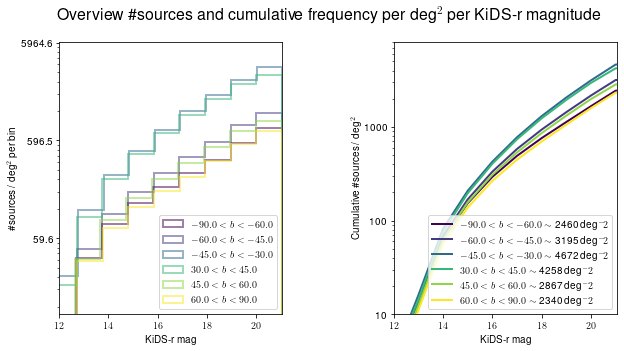

In [47]:
def plot_magGaia_latitude_overview(table = None, filter = 'gmag', optionMC = 'withoutMCs'):
    ''' Plotting histograms and cumulative frequency plots of magnitudes distribution for different latitude ranges,
    in two single overviews. Build-in magnitudes are Gaia-G 'gmag' and KiDS-r 'rmag'. By default magnitude conversion
    is Gaia-G 'gmag'. By setting optionMC to either 'withMCS' or 'withoutMCs', the input table will or will not contain
    the areas contaminated/covered by the Small and Large Magellanic Cloud.

    (1) Retrieving .csv file with Gaia DR2 data (not containing areas covered by the Small and Large Magellanic Cloud
    (2) Retrieving .csv file containing area information, given as output of _use_pandas()
    (3) Calculating the surface of the area using imported ratios as imported in (2)
    (4) Creating histogram for mag per area defined by latitude coordinates as defined by 'slice_options'
    (5) Saving, showing and closing a figure showing source densities as well as their comulative plots

        Parameters
        ----------
        table: pandas.DataFrame [Default = None]
            Data Frame stored in .csv or defined by input attribute 'table'

        filter: str [Default = 'gmag']
            Either 'gmag', or 'rmag', representing Gaia-G and KiDS-r magnitudes respectively

        optionMC: str [Default = 'withoutMCs']
            Either 'withMCs' or 'withoutMCs', to use table with or without the areas covered by the Magellanic Clouds

       Returns
        -------
        None

        {filter}_overviewhist_pm_analysis_norm{optionMC}.pdf:
            Plot showing source density histograms stored as a .pdf file which is stored in the directory "plots"

        {filter}_overviewcum_pm_analysis_norm{optionMC}.pdf:
            Plot showing cumulative frequency plots stored as a .pdf file which is stored in the directory "plots"

    ------------------------------- User example --------------------------------
    ######### Using plot_magGaia_latitude_overview() to plot source distribution #########

        plot_magGaia_latitude_overview(None, filter = 'gmag', optionMC = 'withoutMCs')
        plot_magGaia_latitude_overview(None, filter = 'rmag', optionMC = 'withMCs')

    '''
    # (1) Retrieving table that will or will not contain the areas covered by the Small and Large Magellanic Cloud
    # -------- Load csv to obtain table containing source information ------------
    if table == None and optionMC == 'withMCs':
        EUCLID_table_all = pd.read_csv("../../data/gaia/allpatch/gaia_euclid_allpatch_all.csv", sep=',',
                                       usecols=['pmra', 'pmdec', 'b', 'phot_g_mean_mag','astrometric_gof_al'])
        validAstromSol_filter = EUCLID_table_all['astrometmric_gof_al'] < 3.0  # CREATE MASK FOR UNVALID SOURCES
        table = EUCLID_table_all[validAstromSol_filter]  # FILTER OUT UNVALID SOURCES
    elif table == None and optionMC == 'withoutMCs':
        table = pd.read_csv("../../data/gaia/allpatch/gaia_euclid_allpatch_filtermcs.csv", sep=',',
                                         usecols=['pmra', 'pmdec', 'b', 'phot_g_mean_mag', 'astrometric_gof_al'])
    elif table == 'test':
        table = pd.read_csv("../../data/gaia/area_calc/temp.csv", sep=',',
                                         usecols=['pmra', 'pmdec', 'b', 'phot_g_mean_mag', 'astrometric_gof_al'])
    elif table != None:
        optionMC = str(input("The table is either withMCs/withoutMCs, please give option:  "))
    else:
        print("optionMC should be either withMCs/withoutMCs")
        return

    # (2) Retrieving table contains surface area information
    # ----------- Load csv to obtain table containing area information ------------
    area_table = pd.read_csv('../../data/gaia/area_calc/20200410_095611_areacalc_i100n300.csv')
    area_table_ColNamePerc = ['P_9060', 'P_6045', 'P_4530', 'P_3000', 'P_0030', 'P_3045', 'P_4560', 'P_6090']

    area_hemisphere = (2 / np.pi) * 360 * 90
    area_sky = 2 * area_hemisphere

    # (2) Retrieving table contains surface area information
    # ----------- Load csv to obtain table containing area information ------------
    area_table = pd.read_csv('../../data/gaia/area_calc/20200410_095611_areacalc_i100n300.csv')
    area_table_ColNamePerc = ['P_9060', 'P_6045', 'P_4530', 'P_3000', 'P_0030', 'P_3045', 'P_4560', 'P_6090']

    area_hemisphere = (2 / np.pi) * 360 * 90
    area_sky = 2 * area_hemisphere

    # ------------------ Obtaining data of 'mu' and magnitudes -------------------
    check_column(table)  # CHECK EXISTENCE, OR CREATING 'mu' COLUMN CONTAINING PROPER MOTIONS OF SOURCES

    # --------------------- Settings for creating histogram ----------------------
    a = 0.5; slice_options = [-90.0, -60.0, -45.0, -30.0, 0.0, 30.0, 45.0, 60.0, 90.0]
    colors = ['#440154', '#443983', '#31688e', '#21908d', '#4ac16d', '#35b779', '#8ed645', '#fde725']

    fig, axes = plt.subplots(figsize=(10,5), ncols=2, nrows=1)
    ax = axes[0] # SELECTING NEW AX FOR PLOT
    ax2 = axes[1] # SELECTING NEW AX FOR PLOT

    max = 0

    for idx_area, area_boarders in enumerate(slice_options[:-1]):
        # (3) Calculating the surface of the area using imported ratios as imported in (2)
        # ------------------- Defining properties of the area --------------------

        area_ColNamePerc = area_table_ColNamePerc[idx_area] # OBTAINING CORRECT RATIO/AREA COLUMN NAME
        surface_area = (area_table[area_ColNamePerc][:].mean()) * (area_sky) # CALCULATING SURFACE AREA

        # (4) Creating histograms for mag per area defined by latitude coordinates as defined by 'slice_options'
        tab_mag = table['phot_g_mean_mag'][(table['b'] < slice_options[idx_area + 1]) & (table['b'] > slice_options[idx_area])]
        nr_sources = len(tab_mag) # NUMBER OF SOURCES IN AREA
        density_sources = nr_sources/surface_area # SOURCES PER SQRD DEGREES

        if filter == 'gmag':
            filtername = "Gaia-G"
        elif filter == 'rmag':
            filtername = "KiDS-r"
            tab_mag = tab_mag + 0.05
        else:
            print("filter should be either rmag/gmag")

        # THE EXCLUSION ZONE 0 < |b| < 30 DOES NOT CONTAIN SOURCES (EMPTY): A IF LOOP NEGLECTS EMPTY REGIONS.
        # IF NOT IN EXCLUSION ZONE: PLOT THE GRAPHS SHOWING SOURCE DENSITY [plot1] AND CUMULATIVE FREQUENCY [plot 2]
        if nr_sources == 0:
            pass
        else:
            # -------------------------- Graph 1 -------------------------
            # OVERVIEW DENSITIES OF SOURCES IN SELECTED AREAS BASED ON MAGNITUDES
            magCount, magMean, magStd, magMn, mag25, mag50, mag75, magMx = tab_mag.describe()

            if max < magMx:
                max = magMx
            nr_bins = int(magMx-magMn)
            _, nr_bins, _ = ax.hist(x=tab_mag, bins=nr_bins, alpha=a, rwidth=1, histtype='step', color=colors[idx_area], linewidth=2.0, label= "${} < b < {}$".format( slice_options[idx_area], slice_options[idx_area + 1]))

            # -------------------------- Graph 2 -------------------------
            # OVERVIEW DENSITIES OF SOURCES IN SELECTED AREAS BASED ON MAGNITUDES AS CUMULATIVE PLOT
            pm_xrange = list(np.linspace(0.1, 1.0, num=10, endpoint=False)) # SINCE LOG SCALE, NO START AT 0 BUT AT 0.1
            pm_xrange.extend(list(np.arange(23))[1:]) # EXTEND RANGE UNTIL A MAGNITUDE OF 22
            ax2.plot(pm_xrange, [(len(tab_mag[tab_mag < i]) / nr_sources) * density_sources for i in pm_xrange], color=colors[idx_area], linestyle='-', linewidth=2, label="${} < b < {}$   $\sim$ {:4.0f} deg$^-2$".format(slice_options[idx_area], slice_options[idx_area + 1], density_sources))

    # PLOTTING OF AXES LABELS, CORRECTING SCALES, ADDING LEGENDS & TITLES
    ax.set_xlim(left=12.0, right=magMx)
    ax.set_ylim(bottom=10 * surface_area, top=6000 * surface_area)
    ax.set_yscale('log')
    y_vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.1f}%'.format(x / surface_area) for x in y_vals])
    ax.xaxis.set_label_text(r"{} mag".format(filtername))
    ax.yaxis.set_label_text(r"\#sources / deg$^2$ per bin")            
    
    ax2.set_xlim(left=12.0, right=magMx)
    ax2.set_ylim(bottom=10, top=8000)
    ax2.set_yscale('log')
    y_vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:3.0f}%'.format(x) for x in y_vals])
    ax2.yaxis.set_label_text(r"Cumulative \#sources / deg$^2$")
    ax2.xaxis.set_label_text(r"{} mag".format(filtername))

    ax.legend(loc = 'lower right')
    ax2.legend(loc = 'lower right')

    # (5) Saving, showing and closing a figure showing source densities as well as their comulative plots
    fig.suptitle(r"Overview \#sources and cumulative frequency per deg$^2$ per {} magnitude".format(filtername), fontsize=16)
    fig.subplots_adjust(wspace=0.50)
    filename1 = "./plots/thesis{}_overviewhistandcum_pm_analysis_norm{}.pdf".format(filter, optionMC)

    plt.savefig(filename1, bbox_inches='tight', pad_inches=0)
    plt.show()
    return None


plot_magGaia_latitude_overview(filter = 'rmag', optionMC = 'withoutMCs')

<center><i><b>Figure 16:</b> The Figure shows a comparison of the <font color="#7F7FFF">histograms</font> [left] and <font color="#FD0306">cumulative plots</font> [right] from each single sky patch as shown in Figure 15  </i></center> 

## Conclusions

From this study of the proper motions of Gaia sources in the Euclid Wide Field Survey, we can draw the following conclusions:

* Comparison between the number of sources present in the Northern and Southern sky reveals that the calibrator density will be significantly different when we will be observing different parts of the sky. For the same values of Galactic latitudes, the number of calibrators can differ by up to 60% depending on the particular Galactic latitude and selection of range of proper motions.
* The calibrator density is a strong function of Galactic latitude as it changes by factor 5 to 7 going from |b|=38 $^\circ$ to |b|=75$^\circ$.  
* median/mean total proper motion of Gaia stars is 8/11 mas/yr. Median/mean total proper motions increase by 38%/27% going from Galactic latitude of 38deg to 75deg.
* Towards the galactic poles we find less calibrators. This is especially of importance when looking at the Southern Hemisphere since the LMC and SMC are two big contributors to the number of sources. By selecting their location and the typical proper motion, we are able to largly and roughly filter the sources out of the Gaia data.
* Applying the mask for the magellanic clouds allowed us to scale down the #sources per deg$^2$ in such a way that the average #sources per deg$^2$ for $30.0^{\circ} < |b| < 45.0^{\circ}$ is about similar. An improvement for the mask would filter the sources based on $\mu_{\alpha \ast}$ and $\mu_{\delta}$ instead of only $\mu$.
* Every external survey has its own instuments which come with different pointings as well as field of views, an limiting magnitudes. We have to take all of these components into account when looking for the perfect calibrators.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# KLAD -- Voor Willeke

#### Comments by Gijs first iteration:

<br>
<br>

***

***


* Positions on the sky as barycentric right ascension $\alpha$ and declination $\delta$ at the reference epoch in degrees.
* Absolute stellar parallaxes $\varpi$ in mas. Uncertainties are up to 0.04 mas for G < 15 mag sources, $\sim0.1$ mas for G = 17 mag faint end sources, and $\sim0.7$ mas for G = 20 mag sources.
* Propermotions the components of the proper motion in right ascension $\mu_{\alpha*}$ and in declination $\mu_{\delta}$ at the reference epoch. Uncertainties are up to 0.06 mas yr$^{-1}$ for G < mag 15 sources, 0.2 mas yr$^{-1}$ for G = 17 mag faint end sources, and 1.2 mas yr$^{-1}$ for G = 20 mag sources.

The parallaxes and proper motions in Gaia DR2 may be affected by systematic errors. These would be limited to $\pm 0.1$ mas for parallaxes and $\pm 0.1$ mas yr$^{-1}$ for proper motions. 


<font color="#440154"> <b>purple</b></font>
<font color="#443983"> <b>blue_purple</b></font>
<font color="#31688e"> <b>blue</b></font>
<font color="#21908d"> <b>green_blue</b></font>
<font color="#35b779"> <b>green</b></font>
<font color="#8ed645"> <b>yellow_green</b></font>
<font color="#fde725"> <b>yellow</b></font>


In [ ]:
A = ['ax1', 'ax2', 'ax3', 'ax4']
B = ['Ax1', 'Ax2', 'Ax3', 'Ax4']

axes = [A, B]

for idx_row, row in enumerate(axes):
    for idx_ax, ax in enumerate(row[:-1]):
        print(idx_ax, ax)

for idx_row, row in enumerate(axes):
    for idx_ax, ax in enumerate(row[3:]):            
        print(idx_ax, ax)



Blue boxes (alert-info)
<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes.</div>
Yellow boxes (alert-warning)
<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not inside code cells, or use for mathematical formulas if needed. Typically also used to display warning messages.
</div>
Green boxes (alert-success)
<div class="alert alert-block alert-success">
<b>Success:</b> This alert box indicates a successful or positive action.
</div>
Red boxes (alert-danger)
<div class="alert alert-block alert-danger">
<b>Danger:</b> This alert box indicates a dangerous or potentially negative action.
</div>


<div class="boxed">
  This text is enclosed in a box.
</div>